In [1]:
import os, sys
import numpy as np

import matplotlib.pyplot as plt
sys.path.append('../readmaroc')
#%matplotlib notebook
from maroc_data_new_tboard import MarocData
from functools import partial
from scipy.stats import norm
input_dat = '../data/Run000133072.dat'
marocdata = MarocData(input_dat)

In [2]:
y_offset = [12000, 10000, 8000, 4000, 2000]

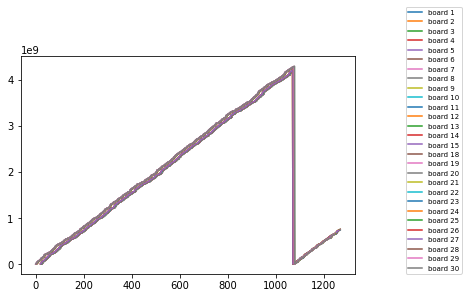

In [3]:
plt.figure()
for b in marocdata.active_boards:
    ts = list(marocdata.get_board(b).timestamps.values())
    ids = list(marocdata.get_board(b).timestamps.keys())
    plt.plot(ids, ts, label='board {}'.format(b))
    plt.legend(loc=(1.15,0), fontsize='x-small' )
plt.show()

In [34]:
def overflow_idx(ts):
        indices = []
        for i, (t, tp1) in enumerate(zip(ts, ts[1:])):
            if tp1 < t:
                indices.append(i + 1)
        indices.append(len(ts))
        return indices

In [42]:
ts_map_8 = {evt.TS: eid for eid, evt in list(marocdata.get_board(8).events.items())}

ts = list(ts_map_8.keys())
ts_64 = np.asarray(ts, dtype=np.uint64)

start, stop = overflow_idx(ts_64)

print("start: {}, stop: {}".format(start, stop))
print("ts[0]: {}, before restart: {},  after restart: {}".format(ts_64[0], ts_64[start-1], ts_64[start]))
print("first 10 values: {}".format(ts_64[:10]))
print("corrected before restart: {} ".format(ts_64[:start]-ts_64[0]))
print("corrected after restart: {} ".format(ts_64[start:]-ts_64[start]))


start: 1048, stop: 1243
ts[0]: 96776127, before restart: 4293209796,  after restart: 2101921
first 10 values: [ 96776127 106434559 107928649 115860026 118490553 125931734 139697430
 146602867 147672710 150798832]
corrected before restart: [         0    9658432   11152522 ... 4189165250 4195792386 4196433669] 
corrected after restart: [        0   3522772   4994537  11781321  17893784  21451299  24389948
  26393122  28624420  29227131  34164748  41760886  43172652  43401438
  44176914  47546710  53827966  58794644  59692359  68588314  72283146
  75370324  76299378  79329024  80078295  83138373  84222794  90211706
  93388233  93398409  98035780 103630945 114453312 115969988 115981582
 117089404 119508727 121457843 124737455 125959241 126852239 130422343
 137710280 161861461 162206372 168073362 168200462 169703092 187386910
 196083933 197974702 203633516 213120227 214411452 215797762 222583435
 223318682 224071112 227234872 227717177 228227624 235808630 236704332
 238633771 246022318 249

In [43]:
ts_map = {evt.TS: eid for eid, evt in list(marocdata.get_board(9).events.items())}

ts = list(ts_map.keys())

ts_64 = np.asarray(ts, dtype=np.uint64)

start, stop = overflow_idx(ts_64)

print("start: {}, stop: {}".format(start, stop))
print("ts[0]: {}, before restart: {},  after restart: {}".format(ts_64[0], ts_64[start-1], ts_64[start]))
print("first 10 values: {}".format(ts_64[:10]))
print("corrected before restart: {} ".format(ts_64[:start]-ts_64[0]))
print("corrected after restart: {} ".format(ts_64[start:]-ts_64[start]))

start: 1049, stop: 1244
ts[0]: 95306282, before restart: 4291739952,  after restart: 632077
first 10 values: [ 95306282 104964715 106458805 114390182 117020709 124461889 138227586
 145133023 146202866 149328987]
corrected before restart: [         0    9658433   11152523 ... 4189165251 4195792387 4196433670] 
corrected after restart: [        0   3522772   4994537  11781320  17893784  21451298  24389948
  26393122  28624419  29227131  34164747  41760885  43172652  43401438
  44176914  47546710  53827966  58794644  59692359  68588314  72283146
  75370323  76299377  79329023  80078295  83138372  84222793  90211705
  93388233  93398409  98035779 103630944 114453311 115969987 115981581
 117089403 119508727 121457843 124737454 125959241 126852238 130422343
 137710280 161861460 162206371 168073362 168200462 169703092 187386910
 196083932 197974701 203633516 213120226 214411452 215797761 222583435
 223318682 224071112 227234872 227717177 228227623 235808630 236704332
 238633771 246022318 2496

In [4]:
marocdata.fix_p1()

[LOG]: FIX 1074 in 3; from 641284.0 to 641283
[LOG]: FIX 1074 in 5; from 641284.0 to 641283
[LOG]: FIX 1074 in 10; from 1471766.0 to 1471765
[LOG]: FIX 1080 in 28; from 4647547.0 to 4647546
[LOG]: FIX 1075 in 10; from 8258549.0 to 8258548
[LOG]: FIX 2 in 29; from 9658433.0 to 9658432
[LOG]: FIX 2 in 30; from 9658433.0 to 9658432
[LOG]: FIX 4 in 25; from 9658433.0 to 9658432
[LOG]: FIX 27 in 1; from 9658433.0 to 9658432
[LOG]: FIX 27 in 2; from 9658433.0 to 9658432
[LOG]: FIX 27 in 3; from 9658433.0 to 9658432
[LOG]: FIX 27 in 4; from 9658433.0 to 9658432
[LOG]: FIX 27 in 5; from 9658433.0 to 9658432
[LOG]: FIX 24 in 9; from 9658433.0 to 9658432
[LOG]: FIX 24 in 10; from 9658433.0 to 9658432
[LOG]: FIX 26 in 7; from 9658433.0 to 9658432
[LOG]: FIX 24 in 11; from 9658433.0 to 9658432
[LOG]: FIX 22 in 13; from 9658433.0 to 9658432
[LOG]: FIX 21 in 14; from 9658433.0 to 9658432
[LOG]: FIX 21 in 15; from 9658433.0 to 9658432
[LOG]: FIX 22 in 12; from 9658433.0 to 9658432
[LOG]: FIX 6 in 20;

[LOG]: FIX 1183 in 3; from 429772119.0 to 429772118
[LOG]: FIX 1183 in 5; from 429772119.0 to 429772118
[LOG]: FIX 1184 in 3; from 430463980.0 to 430463979
[LOG]: FIX 1184 in 5; from 430463980.0 to 430463979
[LOG]: FIX 1188 in 25; from 430633767.0 to 430633766
[LOG]: FIX 1187 in 8; from 431152135.0 to 431152134
[LOG]: FIX 1187 in 7; from 431152135.0 to 431152134
[LOG]: FIX 94 in 29; from 431159590.0 to 431159589
[LOG]: FIX 94 in 30; from 431159590.0 to 431159589
[LOG]: FIX 96 in 25; from 431159590.0 to 431159589
[LOG]: FIX 119 in 1; from 431159590.0 to 431159589
[LOG]: FIX 119 in 2; from 431159590.0 to 431159589
[LOG]: FIX 119 in 3; from 431159590.0 to 431159589
[LOG]: FIX 119 in 4; from 431159590.0 to 431159589
[LOG]: FIX 119 in 5; from 431159590.0 to 431159589
[LOG]: FIX 116 in 9; from 431159590.0 to 431159589
[LOG]: FIX 116 in 10; from 431159590.0 to 431159589
[LOG]: FIX 118 in 7; from 431159590.0 to 431159589
[LOG]: FIX 116 in 11; from 431159590.0 to 431159589
[LOG]: FIX 114 in 13;

[LOG]: FIX 173 in 14; from 619452691.0 to 619452690
[LOG]: FIX 173 in 15; from 619452691.0 to 619452690
[LOG]: FIX 174 in 12; from 619452691.0 to 619452690
[LOG]: FIX 158 in 20; from 619452691.0 to 619452690
[LOG]: FIX 158 in 18; from 619452691.0 to 619452690
[LOG]: FIX 158 in 19; from 619452691.0 to 619452690
[LOG]: FIX 158 in 21; from 619452691.0 to 619452690
[LOG]: FIX 156 in 22; from 619452691.0 to 619452690
[LOG]: FIX 156 in 23; from 619452691.0 to 619452690
[LOG]: FIX 155 in 26; from 619452691.0 to 619452690
[LOG]: FIX 156 in 24; from 619452691.0 to 619452690
[LOG]: FIX 154 in 28; from 619452691.0 to 619452690
[LOG]: FIX 154 in 27; from 619452691.0 to 619452690
[LOG]: FIX 1233 in 8; from 619662585.0 to 619662584
[LOG]: FIX 1233 in 7; from 619662585.0 to 619662584
[LOG]: FIX 1234 in 7; from 619823209.0 to 619823208
[LOG]: FIX 155 in 29; from 620263967.0 to 620263966
[LOG]: FIX 155 in 30; from 620263967.0 to 620263966
[LOG]: FIX 157 in 25; from 620263967.0 to 620263966
[LOG]: FIX 1

[LOG]: FIX 256 in 23; from 1011122358.0 to 1011122357
[LOG]: FIX 255 in 26; from 1011122358.0 to 1011122357
[LOG]: FIX 256 in 24; from 1011122358.0 to 1011122357
[LOG]: FIX 254 in 27; from 1011122358.0 to 1011122357
[LOG]: FIX 255 in 29; from 1011728228.0 to 1011728227
[LOG]: FIX 255 in 30; from 1011728228.0 to 1011728227
[LOG]: FIX 257 in 25; from 1011728228.0 to 1011728227
[LOG]: FIX 280 in 1; from 1011728228.0 to 1011728227
[LOG]: FIX 280 in 2; from 1011728228.0 to 1011728227
[LOG]: FIX 280 in 4; from 1011728228.0 to 1011728227
[LOG]: FIX 277 in 9; from 1011728228.0 to 1011728227
[LOG]: FIX 277 in 10; from 1011728228.0 to 1011728227
[LOG]: FIX 277 in 11; from 1011728228.0 to 1011728227
[LOG]: FIX 275 in 12; from 1011728228.0 to 1011728227
[LOG]: FIX 259 in 18; from 1011728228.0 to 1011728227
[LOG]: FIX 256 in 26; from 1011728228.0 to 1011728227
[LOG]: FIX 255 in 27; from 1011728228.0 to 1011728227
[LOG]: FIX 256 in 29; from 1015012849.0 to 1015012848
[LOG]: FIX 256 in 30; from 10150

[LOG]: FIX 377 in 27; from 1528761655.0 to 1528761654
[LOG]: FIX 378 in 29; from 1534271870.0 to 1534271869
[LOG]: FIX 378 in 30; from 1534271870.0 to 1534271869
[LOG]: FIX 380 in 25; from 1534271870.0 to 1534271869
[LOG]: FIX 403 in 1; from 1534271870.0 to 1534271869
[LOG]: FIX 403 in 2; from 1534271870.0 to 1534271869
[LOG]: FIX 403 in 3; from 1534271870.0 to 1534271869
[LOG]: FIX 403 in 4; from 1534271870.0 to 1534271869
[LOG]: FIX 403 in 5; from 1534271870.0 to 1534271869
[LOG]: FIX 400 in 9; from 1534271870.0 to 1534271869
[LOG]: FIX 400 in 10; from 1534271870.0 to 1534271869
[LOG]: FIX 402 in 7; from 1534271870.0 to 1534271869
[LOG]: FIX 400 in 11; from 1534271870.0 to 1534271869
[LOG]: FIX 398 in 13; from 1534271870.0 to 1534271869
[LOG]: FIX 397 in 14; from 1534271870.0 to 1534271869
[LOG]: FIX 397 in 15; from 1534271870.0 to 1534271869
[LOG]: FIX 398 in 12; from 1534271870.0 to 1534271869
[LOG]: FIX 382 in 20; from 1534271870.0 to 1534271869
[LOG]: FIX 382 in 18; from 15342718

[LOG]: FIX 509 in 24; from 2036621246.0 to 2036621245
[LOG]: FIX 507 in 28; from 2036621246.0 to 2036621245
[LOG]: FIX 507 in 27; from 2036621246.0 to 2036621245
[LOG]: FIX 508 in 29; from 2036858277.0 to 2036858276
[LOG]: FIX 508 in 30; from 2036858277.0 to 2036858276
[LOG]: FIX 510 in 25; from 2036858277.0 to 2036858276
[LOG]: FIX 533 in 1; from 2036858277.0 to 2036858276
[LOG]: FIX 533 in 2; from 2036858277.0 to 2036858276
[LOG]: FIX 533 in 4; from 2036858277.0 to 2036858276
[LOG]: FIX 530 in 9; from 2036858277.0 to 2036858276
[LOG]: FIX 530 in 10; from 2036858277.0 to 2036858276
[LOG]: FIX 530 in 11; from 2036858277.0 to 2036858276
[LOG]: FIX 528 in 12; from 2036858277.0 to 2036858276
[LOG]: FIX 512 in 18; from 2036858277.0 to 2036858276
[LOG]: FIX 509 in 26; from 2036858277.0 to 2036858276
[LOG]: FIX 508 in 27; from 2036858277.0 to 2036858276
[LOG]: FIX 509 in 29; from 2037979742.0 to 2037979741
[LOG]: FIX 509 in 30; from 2037979742.0 to 2037979741
[LOG]: FIX 511 in 25; from 20379

[LOG]: FIX 622 in 26; from 2506569459.0 to 2506569458
[LOG]: FIX 623 in 24; from 2506569459.0 to 2506569458
[LOG]: FIX 621 in 28; from 2506569459.0 to 2506569458
[LOG]: FIX 621 in 27; from 2506569459.0 to 2506569458
[LOG]: FIX 622 in 29; from 2510685981.0 to 2510685980
[LOG]: FIX 622 in 30; from 2510685981.0 to 2510685980
[LOG]: FIX 624 in 25; from 2510685981.0 to 2510685980
[LOG]: FIX 647 in 2; from 2510685981.0 to 2510685980
[LOG]: FIX 647 in 4; from 2510685981.0 to 2510685980
[LOG]: FIX 644 in 11; from 2510685981.0 to 2510685980
[LOG]: FIX 626 in 18; from 2510685981.0 to 2510685980
[LOG]: FIX 623 in 29; from 2511321694.0 to 2511321693
[LOG]: FIX 623 in 30; from 2511321694.0 to 2511321693
[LOG]: FIX 625 in 25; from 2511321694.0 to 2511321693
[LOG]: FIX 648 in 1; from 2511321694.0 to 2511321693
[LOG]: FIX 648 in 2; from 2511321694.0 to 2511321693
[LOG]: FIX 648 in 3; from 2511321694.0 to 2511321693
[LOG]: FIX 648 in 4; from 2511321694.0 to 2511321693
[LOG]: FIX 648 in 5; from 25113216

[LOG]: FIX 787 in 1; from 3066407375.0 to 3066407374
[LOG]: FIX 787 in 2; from 3066407375.0 to 3066407374
[LOG]: FIX 787 in 4; from 3066407375.0 to 3066407374
[LOG]: FIX 784 in 9; from 3066407375.0 to 3066407374
[LOG]: FIX 784 in 10; from 3066407375.0 to 3066407374
[LOG]: FIX 784 in 11; from 3066407375.0 to 3066407374
[LOG]: FIX 782 in 12; from 3066407375.0 to 3066407374
[LOG]: FIX 766 in 18; from 3066407375.0 to 3066407374
[LOG]: FIX 763 in 26; from 3066407375.0 to 3066407374
[LOG]: FIX 762 in 27; from 3066407375.0 to 3066407374
[LOG]: FIX 763 in 29; from 3070013456.0 to 3070013455
[LOG]: FIX 763 in 30; from 3070013456.0 to 3070013455
[LOG]: FIX 765 in 25; from 3070013456.0 to 3070013455
[LOG]: FIX 788 in 1; from 3070013456.0 to 3070013455
[LOG]: FIX 788 in 2; from 3070013456.0 to 3070013455
[LOG]: FIX 788 in 4; from 3070013456.0 to 3070013455
[LOG]: FIX 785 in 9; from 3070013456.0 to 3070013455
[LOG]: FIX 785 in 10; from 3070013456.0 to 3070013455
[LOG]: FIX 785 in 11; from 307001345

[LOG]: FIX 928 in 2; from 3585988989.0 to 3585988988
[LOG]: FIX 928 in 4; from 3585988989.0 to 3585988988
[LOG]: FIX 925 in 9; from 3585988989.0 to 3585988988
[LOG]: FIX 925 in 10; from 3585988989.0 to 3585988988
[LOG]: FIX 925 in 11; from 3585988989.0 to 3585988988
[LOG]: FIX 923 in 12; from 3585988989.0 to 3585988988
[LOG]: FIX 907 in 18; from 3585988989.0 to 3585988988
[LOG]: FIX 904 in 26; from 3585988989.0 to 3585988988
[LOG]: FIX 903 in 27; from 3585988989.0 to 3585988988
[LOG]: FIX 904 in 29; from 3589927402.0 to 3589927401
[LOG]: FIX 904 in 30; from 3589927402.0 to 3589927401
[LOG]: FIX 906 in 25; from 3589927402.0 to 3589927401
[LOG]: FIX 929 in 1; from 3589927402.0 to 3589927401
[LOG]: FIX 929 in 2; from 3589927402.0 to 3589927401
[LOG]: FIX 929 in 3; from 3589927402.0 to 3589927401
[LOG]: FIX 929 in 4; from 3589927402.0 to 3589927401
[LOG]: FIX 929 in 5; from 3589927402.0 to 3589927401
[LOG]: FIX 926 in 9; from 3589927402.0 to 3589927401
[LOG]: FIX 926 in 10; from 3589927402

[LOG]: FIX 1041 in 30; from 4167268406.0 to 4167268405
[LOG]: FIX 1043 in 25; from 4167268406.0 to 4167268405
[LOG]: FIX 1066 in 1; from 4167268406.0 to 4167268405
[LOG]: FIX 1066 in 2; from 4167268406.0 to 4167268405
[LOG]: FIX 1066 in 4; from 4167268406.0 to 4167268405
[LOG]: FIX 1063 in 9; from 4167268406.0 to 4167268405
[LOG]: FIX 1063 in 10; from 4167268406.0 to 4167268405
[LOG]: FIX 1063 in 11; from 4167268406.0 to 4167268405
[LOG]: FIX 1061 in 12; from 4167268406.0 to 4167268405
[LOG]: FIX 1045 in 18; from 4167268406.0 to 4167268405
[LOG]: FIX 1042 in 26; from 4167268406.0 to 4167268405
[LOG]: FIX 1041 in 27; from 4167268406.0 to 4167268405
[LOG]: FIX 1042 in 29; from 4171387112.0 to 4171387111
[LOG]: FIX 1042 in 30; from 4171387112.0 to 4171387111
[LOG]: FIX 1044 in 25; from 4171387112.0 to 4171387111
[LOG]: FIX 1067 in 1; from 4171387112.0 to 4171387111
[LOG]: FIX 1067 in 2; from 4171387112.0 to 4171387111
[LOG]: FIX 1067 in 4; from 4171387112.0 to 4171387111
[LOG]: FIX 1064 i

In [4]:
def invert_dict(dic):
    return {ts: eid for eid, ts in dic.items()}

In [5]:
clean_ts_tot = []
for board in marocdata.active_boards:
    clean_ts = list(marocdata.get_board(board).timestamps.values())
    clean_ts_tot.append(clean_ts)
clean_ts_tot = np.unique(np.hstack(clean_ts_tot))

In [5]:
def board_plot(ax, ts, board_id, board_idx, triplet_idx, c='blue'):
    if board_id in marocdata.active_boards:
        board = marocdata.get_board(board_id)
        if ts in board.clean_timestamps.keys(): 
            evt = board.clean_timestamps[ts]   
            if evt in board:
                signal = board.get_event(evt).signal
                if np.max(signal)>2000:
                    signal = signal*0.45
                ax.plot(np.arange(0+(board_idx*320), 320+320*board_idx), 
                                 (signal)+y_offset[triplet_idx], color=c, linewidth=1)
                ax.text((320+320*board_idx-0+(board_idx*320))/2 -150, 
                             y_offset[triplet_idx]-250, 'b: {}, TS: {} '.format(board_id, np.uint32(ts)), size='small')
                ax.axvline(320*(board_idx+1), linestyle='--', linewidth=.75, color='grey', alpha=.5)
    return ax

In [17]:
def plot_event_ts_new(ts, marocdata):
    print(ts)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8), sharey=True, sharex=True)
    evt = None
    for i, (triplet_y, triplet_x) in enumerate(zip(np.arange(1, 16).reshape(5, 3), 
                                                   np.arange(16,31).reshape(5,3))):
        for j, (board_y, board_x) in enumerate(zip(triplet_y, triplet_x)):
            if board_y in marocdata.active_boards:
                yboard = marocdata.get_board(board_y)
                ax1 = board_plot(ax1, ts, board_y, j, i)
            if board_x in marocdata.active_boards:
                xboard = marocdata.get_board(board_x)
                ax2 = board_plot(ax2, ts, board_x, j, i, c='red')       
#    if (evt is None):
#        return None # skip
    ax1.set_title('y layers', size='x-large')
    ax2.set_title('x layers', size='x-large')
    plt.yticks(y_offset, ['layer 0','layer 1', 'layer 2', 'layer 3', 'layer 4'], size='x-large')
    plt.xticks([0, 320, 640, 960])
    fig.text(.5, .05, 'strips', size='large')
    #fig.text(.5, .95, 'Evt {}'.format(evt), size='large')
    plt.ylim(1000, 13000)
    plt.xlim(-10,970)
    return fig, ax1, ax2

In [7]:
thresholds = {b: 200+(mu+5*std) for b, (mu, std) in marocdata.noise_tot.items()}

In [8]:
pedestals = marocdata.pedestals_tot

```python
all_ts_stack = list()
boards_timestamps = dict()
for bid in self.boards:
    board_ts = self.boards[bid].clean_timestamp
    bpards_timestamps[bid] = board_ts
    all_ts_stack.extend(list(board_ts.keys()))
    
all_ts_stack = sorted(set(all_ts_stack))
ts_to_fix = [ts for ts, ts_1 in zip(all_ts_stack, all_ts_stack[1:]) if (ts_1==ts+1)]

for ts in ts_to_fix:
    for bid, board_ts in boards_timestamps.items():
        if (ts+1 in board_ts):
            evt_id = board_ts[ts+1]
            self.boards[bid].set_tsnorm(evt_id, ts)

```

In [9]:
over_threshold_per_board = {}
for bid in marocdata.active_boards:
    timestamps = []
    board = marocdata.get_board(bid)
    for eid, signal in board.signals.items():
        if np.any(signal-pedestals[bid]>thresholds[bid]):
            event = board.get_event(eid)
            timestamps.append(event.TS_norm)
    over_threshold_per_board[bid] = timestamps

In [10]:
over_threshold_per_board

{1: [],
 2: [9658432, 845801320, 1941581041, 2343160629, 653870825],
 3: [],
 4: [714558890, 3111535161, 3303077858, 3466474618],
 5: [969048628, 1947476352, 3032987531, 4006758934],
 6: [],
 7: [237542330,
  237583738,
  320459206,
  328591240,
  413937844,
  594645541,
  609681034,
  1270401310,
  1343636971,
  1935905988,
  1939210837,
  2136757327,
  2188962031,
  2439535213,
  2848867505,
  3148075166,
  3362617269,
  3552195119,
  378889536,
  558007404],
 8: [980457019, 3366607438],
 9: [],
 10: [1336194169, 1456682851],
 11: [],
 12: [2061617093],
 13: [530039469, 3111535161, 3276299234, 3522203119, 3985802898],
 14: [221603231],
 15: [211326086, 3522203119, 3947597615],
 18: [],
 19: [2406027549, 2663194573, 350761828, 545148711],
 20: [819859175],
 21: [],
 22: [208707991,
  363731554,
  432971870,
  460420754,
  865133375,
  890796888,
  980457019,
  1040062334,
  1127083677,
  1210056740,
  1600792074,
  1608124842,
  2202324899,
  2643918615,
  2783002878,
  2995654335,
  

In [11]:
from operator import add
from functools import reduce

all_ts = reduce(add, over_threshold_per_board.values())

In [12]:
all_ts

[9658432,
 845801320,
 1941581041,
 2343160629,
 653870825,
 714558890,
 3111535161,
 3303077858,
 3466474618,
 969048628,
 1947476352,
 3032987531,
 4006758934,
 237542330,
 237583738,
 320459206,
 328591240,
 413937844,
 594645541,
 609681034,
 1270401310,
 1343636971,
 1935905988,
 1939210837,
 2136757327,
 2188962031,
 2439535213,
 2848867505,
 3148075166,
 3362617269,
 3552195119,
 378889536,
 558007404,
 980457019,
 3366607438,
 1336194169,
 1456682851,
 2061617093,
 530039469,
 3111535161,
 3276299234,
 3522203119,
 3985802898,
 221603231,
 211326086,
 3522203119,
 3947597615,
 2406027549,
 2663194573,
 350761828,
 545148711,
 819859175,
 208707991,
 363731554,
 432971870,
 460420754,
 865133375,
 890796888,
 980457019,
 1040062334,
 1127083677,
 1210056740,
 1600792074,
 1608124842,
 2202324899,
 2643918615,
 2783002878,
 2995654335,
 3024078577,
 3301447996,
 3362617269,
 3451954369,
 3463613785,
 3515600824,
 3623759803,
 3639774381,
 4085674095,
 144096500,
 295751164,
 3306

In [13]:
from collections import Counter

In [14]:
ts_to_plot = [ts for ts, occ in Counter(all_ts).items() if occ > 1]

In [15]:
ts_to_plot

[3111535161,
 3362617269,
 980457019,
 2061617093,
 3522203119,
 221603231,
 3853568005]

3111535161


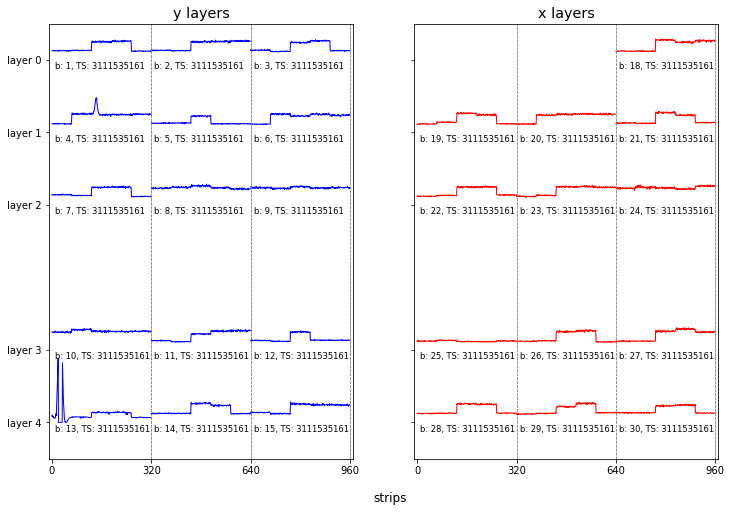

3362617269


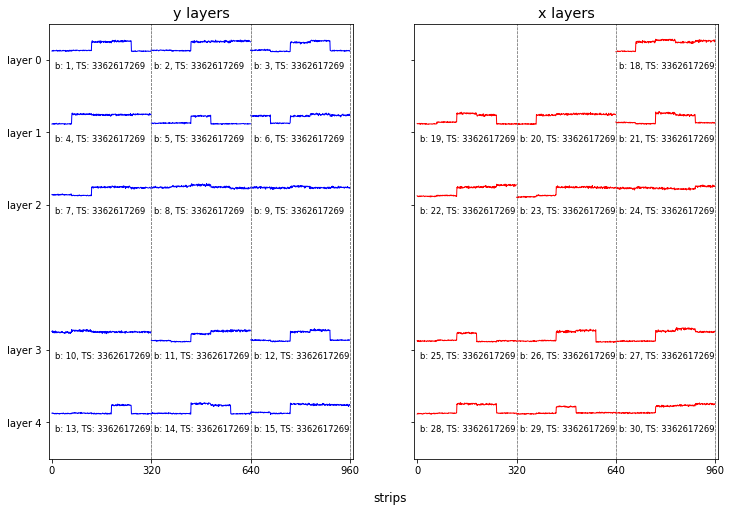

980457019


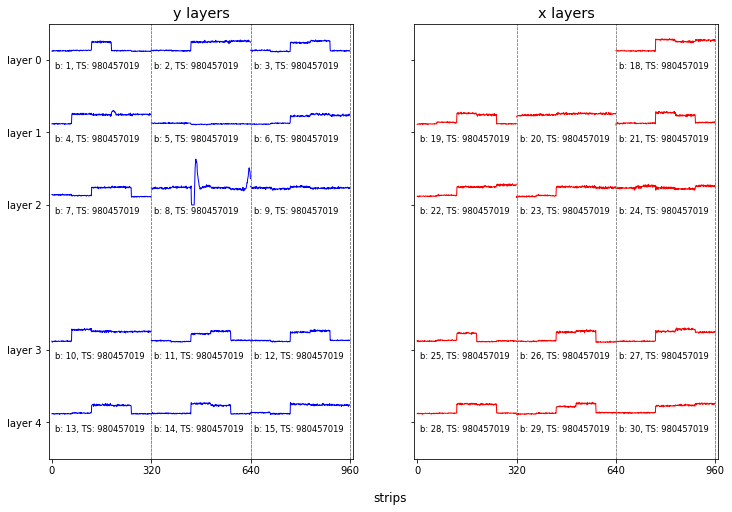

2061617093


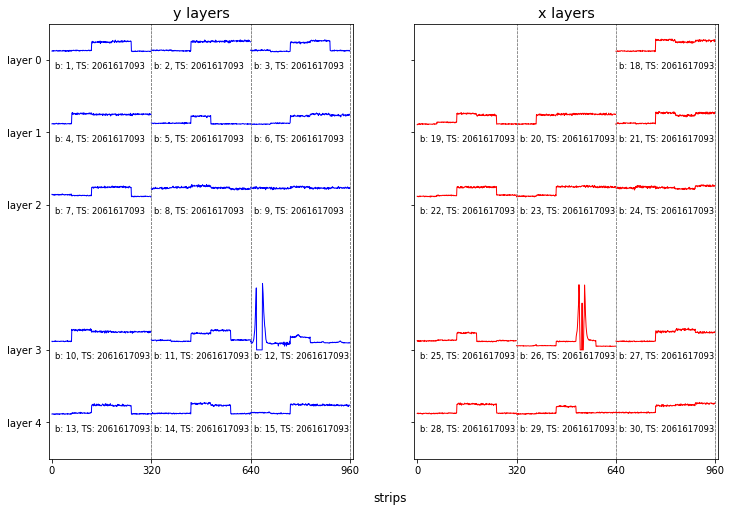

3522203119


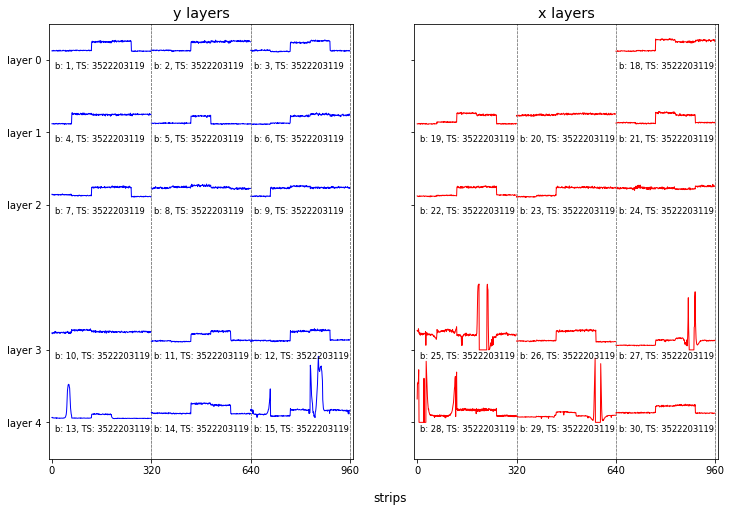

221603231


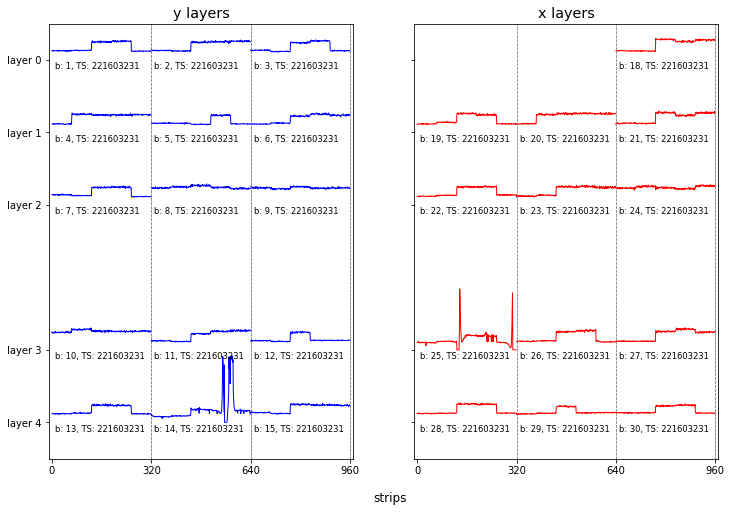

3853568005


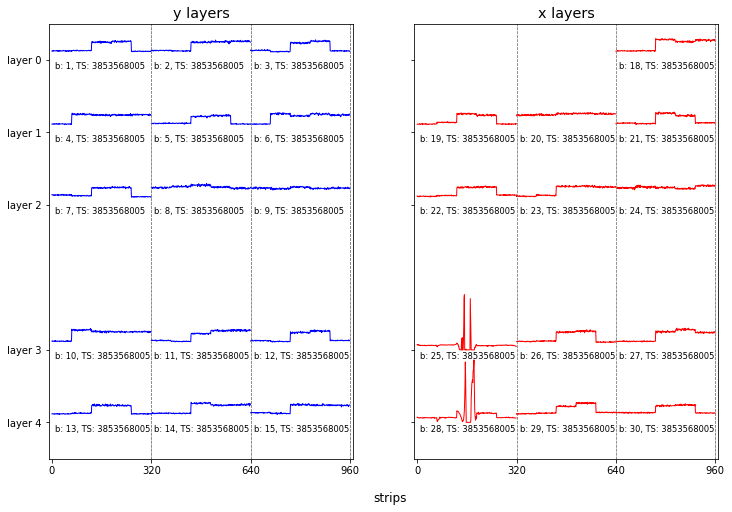

In [18]:
for ts in ts_to_plot:
    plot_event_ts_new(ts, marocdata)
    plt.show()

104308528


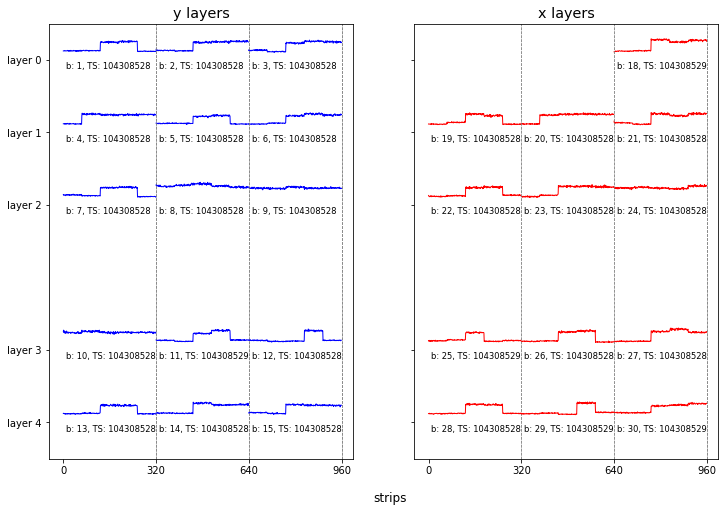

117515543


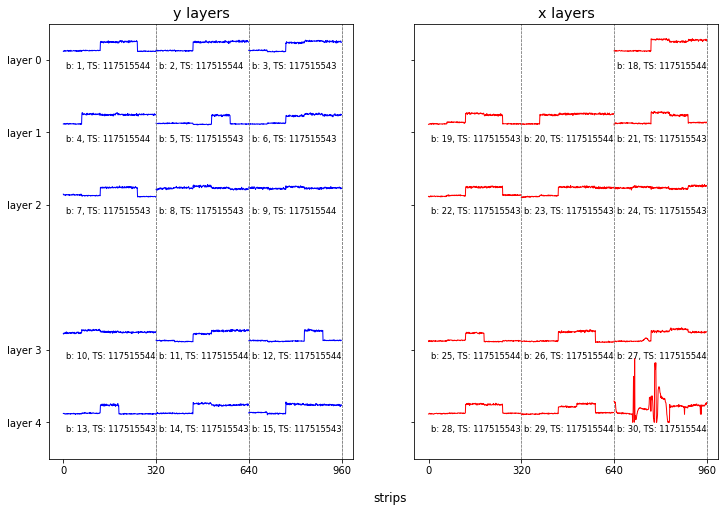

221603231


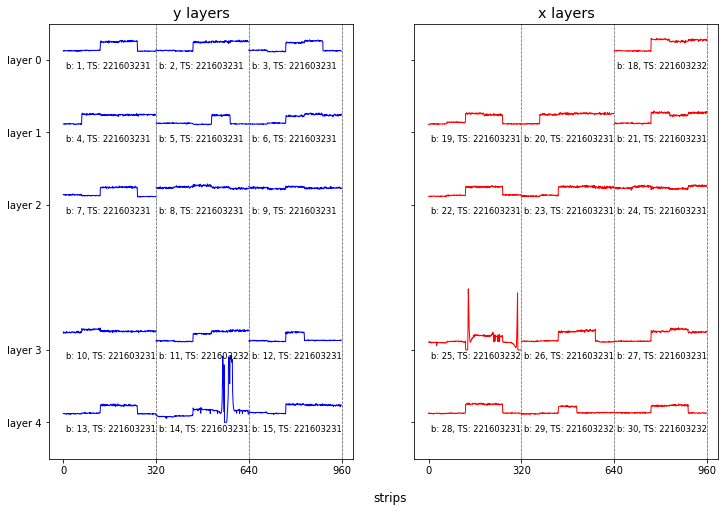

237542330


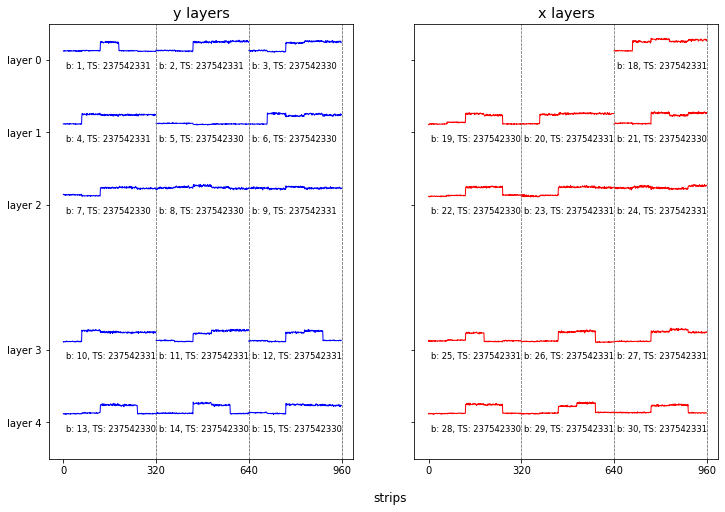

594645541


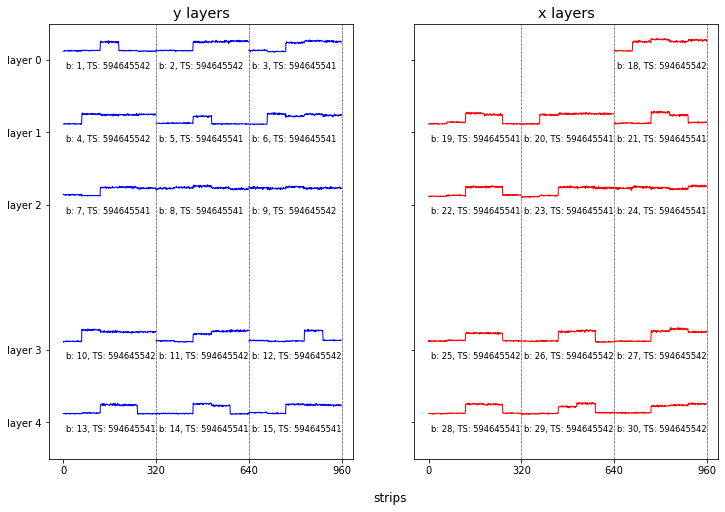

980457019


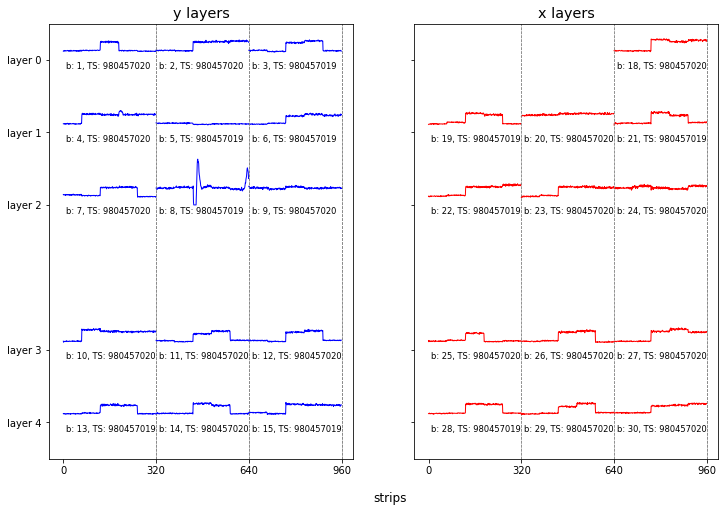

2061617093


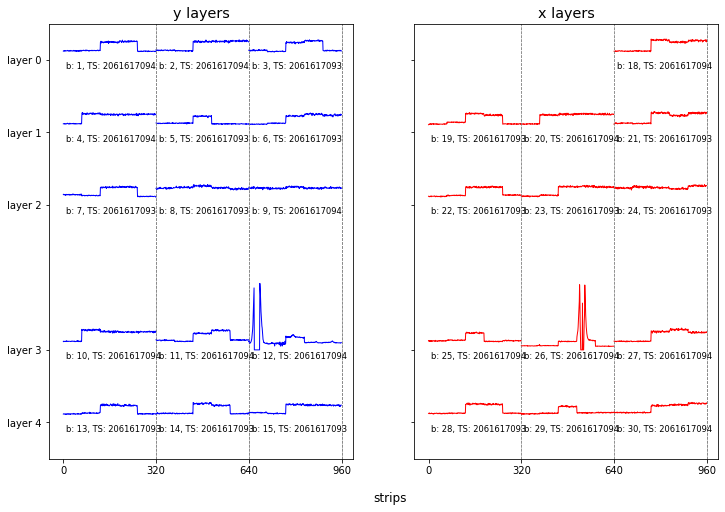

3301447996


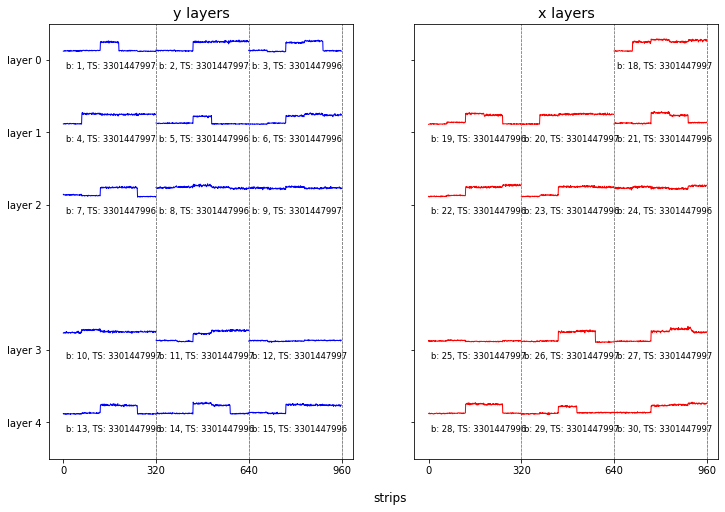

3362617269


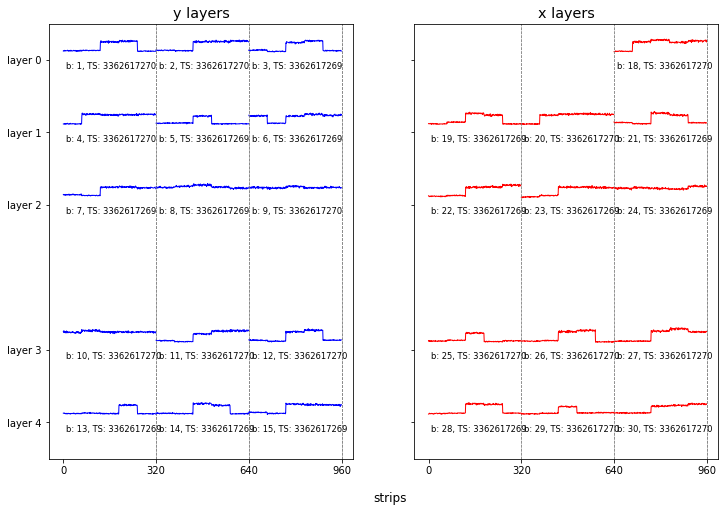

3522203119


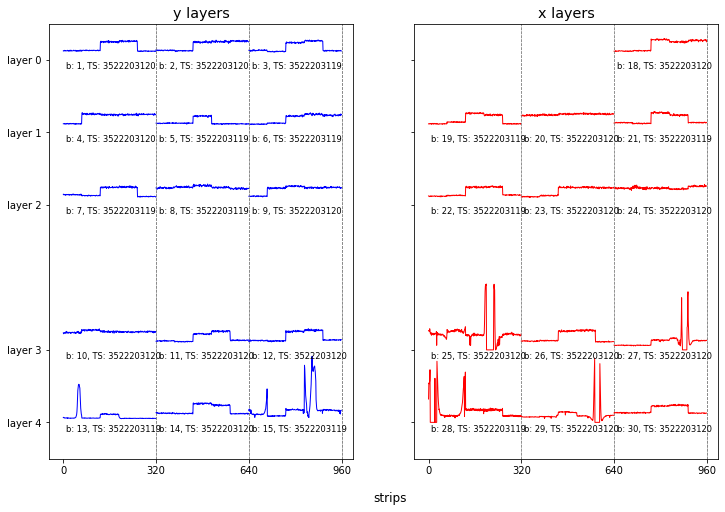

In [13]:
for ts, count in timestamps_to_plot.items():
    if count>2:
        plot_event_ts_new(ts, marocdata)
        plt.show()

TS  0 DONE
TS  10176 TS  641283 DONE
SKIPPING 641284
TS  749272 TS  929054 TS  1084421 TS  1471765 DONE
SKIPPING 1471766
TS  3029646 TS  3060078 TS  3176528 TS  3186704 TS  3522772 DONE
TS  3778917 TS  3809349 TS  4144499 TS  4500704 DONE
TS  4647546 TS  4647547 TS  4707971 TS  4893770 TS  4994537 

<ipython-input-78-0f150b5f8956>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8), sharey=True, sharex=True)


DONE
TS  5595166 TS  5988912 TS  6112463 DONE
TS  6627136 DONE
TS  6786783 DONE
TS  6838995 TS  7073333 TS  7268419 DONE
TS  7768049 TS  7824074 TS  7923416 TS  8023476 DONE
TS  8258548 DONE
SKIPPING 8258549
TS  8852470 TS  9165439 TS  9175616 TS  9495241 DONE
TS  9658432 DONE
SKIPPING 9658433
TS  9669978 DONE
TS  10133411 TS  10242712 TS  10249860 TS  10260036 TS  10260037 TS  10882682 TS  11127840 DONE
TS  11152522 DONE
SKIPPING 11152523
TS  11781320 DONE
SKIPPING 11781321
TS  12608627 DONE
SKIPPING 12608628
TS  12899247 DONE
TS  13309938 TS  13320114 TS  13419239 TS  13419240 TS  13812986 TS  13912328 TS  14059209 TS  14069386 TS  14371012 DONE
SKIPPING 14371013
TS  14611801 DONE
SKIPPING 14611802
TS  14650612 DONE
TS  14841382 TS  14897407 TS  16122377 DONE
TS  16282024 DONE
SKIPPING 16282025
TS  16417533 TS  16456761 DONE
TS  16843099 DONE
TS  17088855 TS  17099031 TS  17445810 DONE
TS  17893784 DONE
TS  17928526 DONE
SKIPPING 17928527
TS  17934209 TS  17945803 TS  17957485 TS  18

KeyboardInterrupt: 

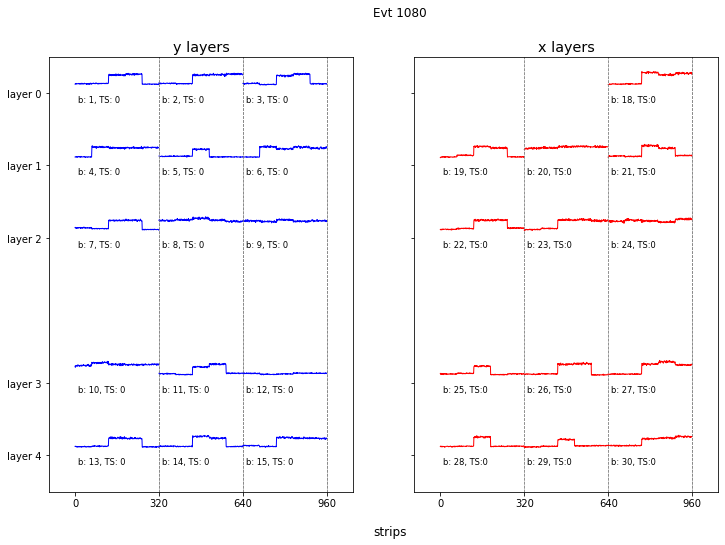

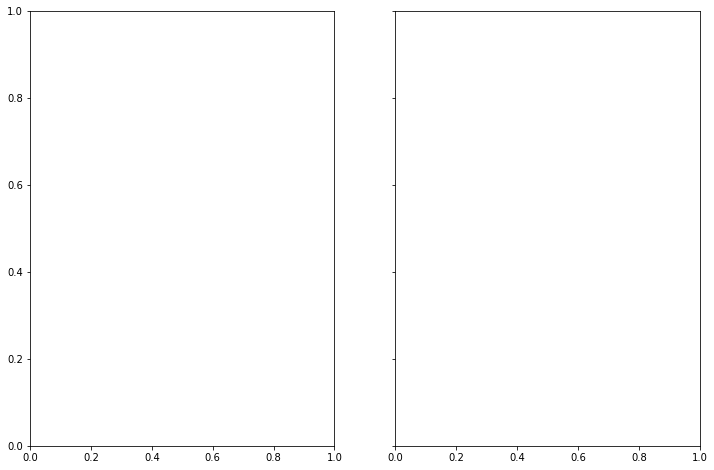

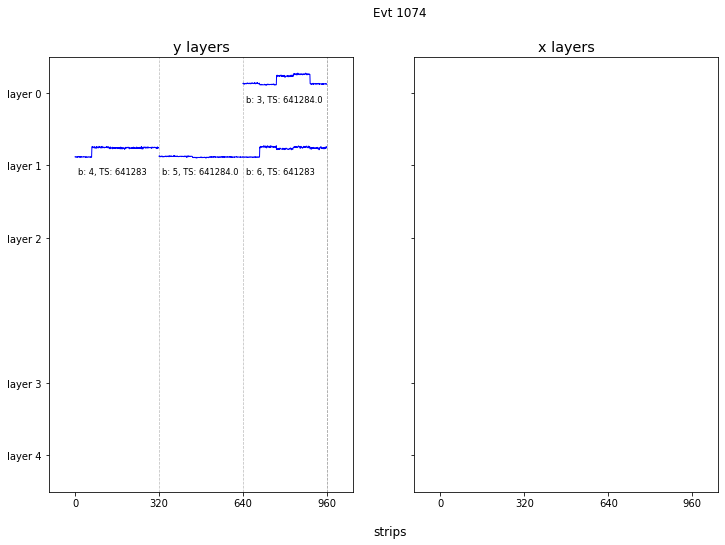

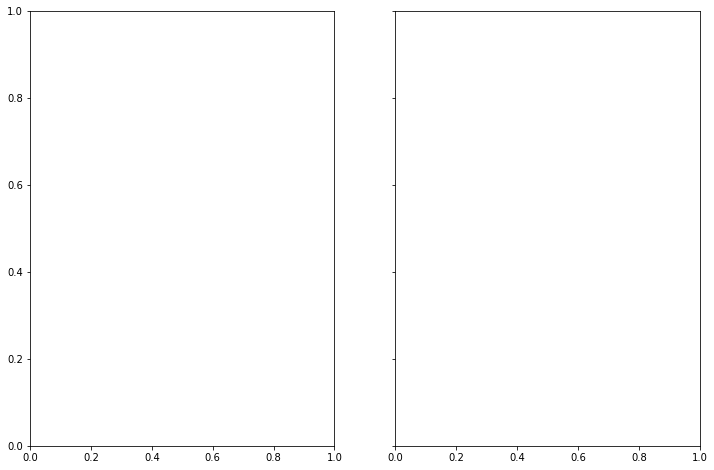

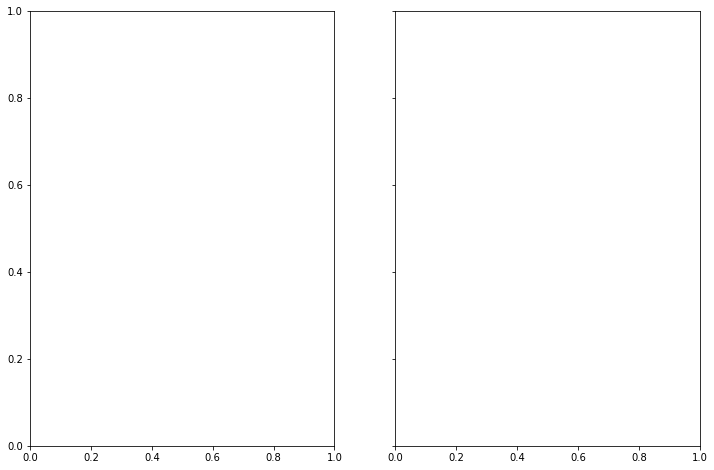

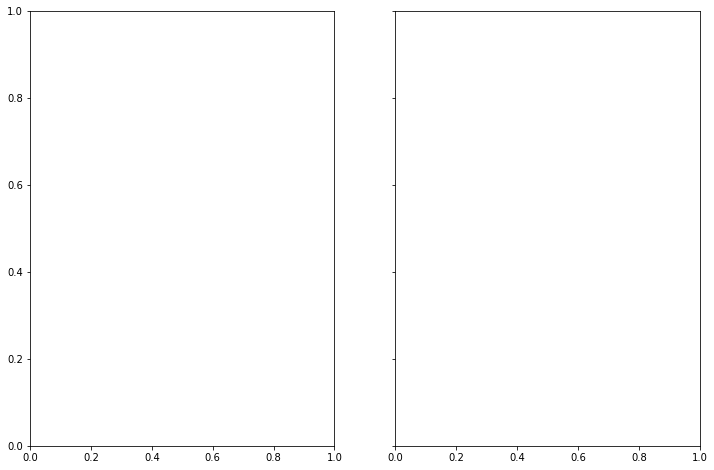

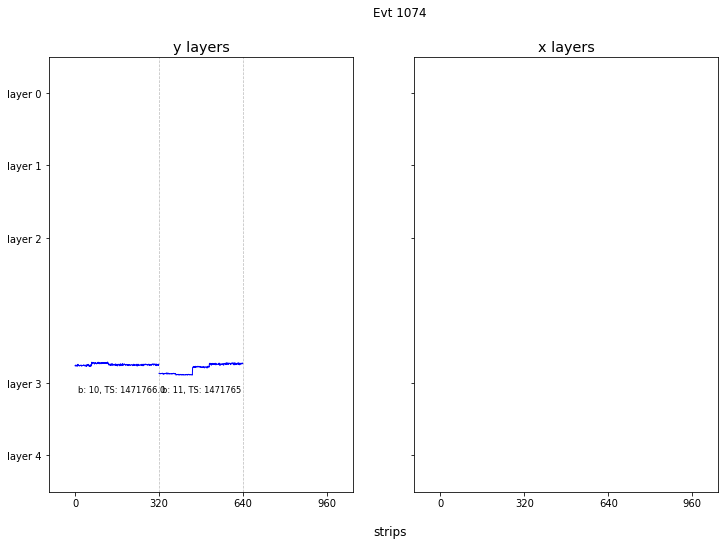

Error in callback <function flush_figures at 0x15720fe50> (for post_execute):


KeyboardInterrupt: 

In [81]:
last_ts = None
for i, ts in enumerate(np.unique(clean_ts_tot)):
    if (i == 500):
        break
    if (last_ts is not None and last_ts+1 == ts):
        print("SKIPPING {}".format(ts))
        continue
    print("TS ", ts, end=" ")
    plot_comps = plot_event_ts(ts, marocdata)
    if (plot_comps is None):    
        continue
    fig, ax1, ax2 = plot_comps
    print("DONE")
    #plt.show()
    last_ts = ts

TS  0 DONE
TS  10176 TS  641283 DONE
SKIPPING 641284
TS  749272 TS  929054 TS  1084421 TS  1471765 DONE
SKIPPING 1471766
TS  3029646 TS  3060078 TS  3176528 TS  3186704 TS  3522772 DONE
TS  3778917 TS  3809349 TS  4144499 TS  4500704 DONE
TS  4647546 TS  4647547 TS  4707971 TS  4893770 TS  4994537 DONE
TS  5595166 TS  5988912 TS  6112463 DONE
TS  6627136 DONE
TS  6786783 DONE
TS  6838995 TS  7073333 TS  7268419 DONE
TS  7768049 TS  7824074 TS  7923416 TS  8023476 

<ipython-input-78-0f150b5f8956>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8), sharey=True, sharex=True)


DONE
TS  8258548 DONE
SKIPPING 8258549
TS  8852470 TS  9165439 TS  9175616 TS  9495241 DONE
TS  9658432 DONE
SKIPPING 9658433
TS  9669978 DONE
TS  10133411 TS  10242712 TS  10249860 TS  10260036 TS  10260037 TS  10882682 TS  11127840 DONE
TS  11152522 DONE
SKIPPING 11152523
TS  11781320 DONE
SKIPPING 11781321
TS  12608627 DONE
SKIPPING 12608628
TS  12899247 DONE
TS  13309938 TS  13320114 TS  13419239 TS  13419240 TS  13812986 TS  13912328 TS  14059209 TS  14069386 TS  14371012 DONE
SKIPPING 14371013
TS  14611801 DONE
SKIPPING 14611802
TS  14650612 DONE
TS  14841382 TS  14897407 TS  16122377 DONE
TS  16282024 DONE
SKIPPING 16282025
TS  16417533 TS  16456761 DONE
TS  16843099 DONE
TS  17088855 TS  17099031 TS  17445810 DONE
TS  17893784 DONE
TS  17928526 DONE
SKIPPING 17928527
TS  17934209 TS  17945803 TS  17957485 TS  18017909 TS  18028085 TS  18706756 TS  19053624 TS  19083899 DONE
SKIPPING 19083900
TS  19395411 DONE
TS  19408151 TS  20492572 TS  20867176 DONE
SKIPPING 20867177
TS  210

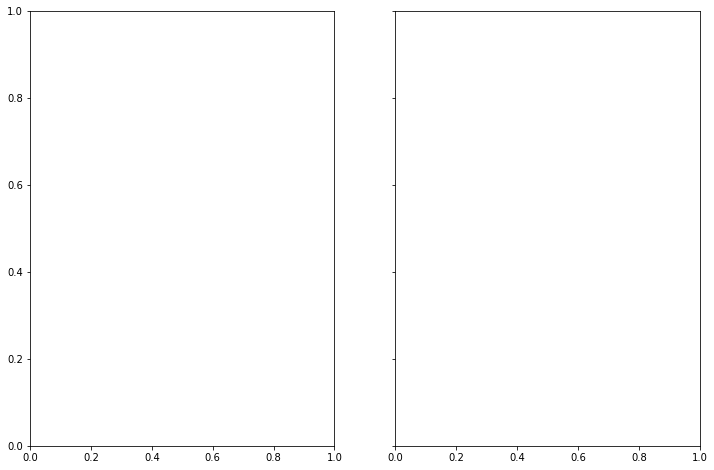

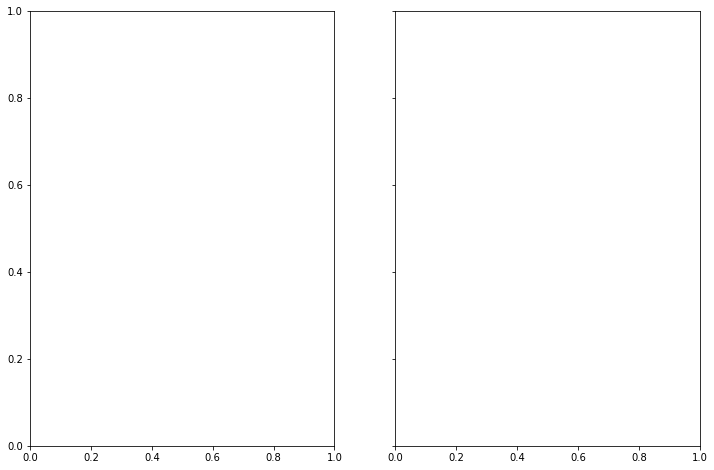

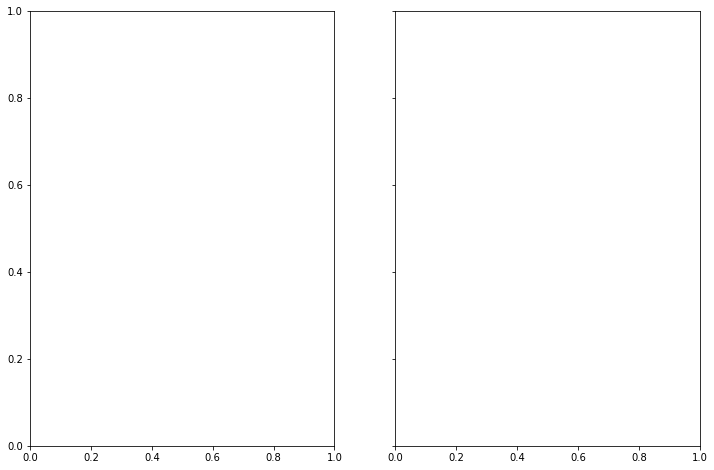

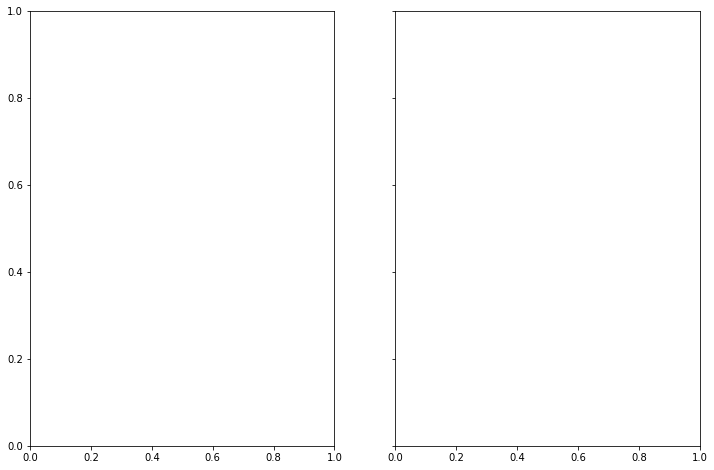

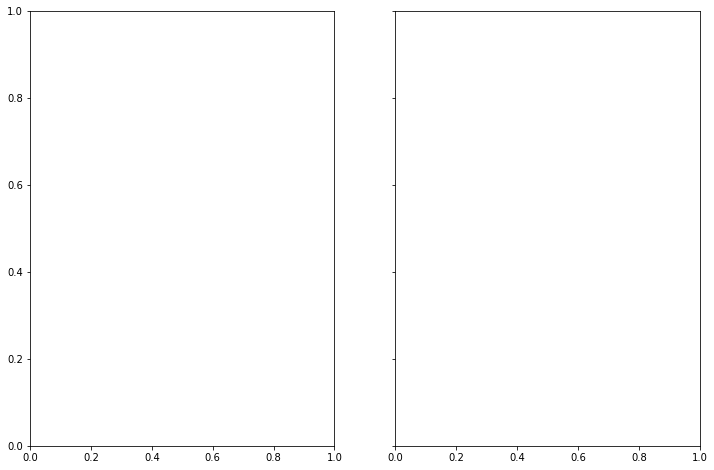

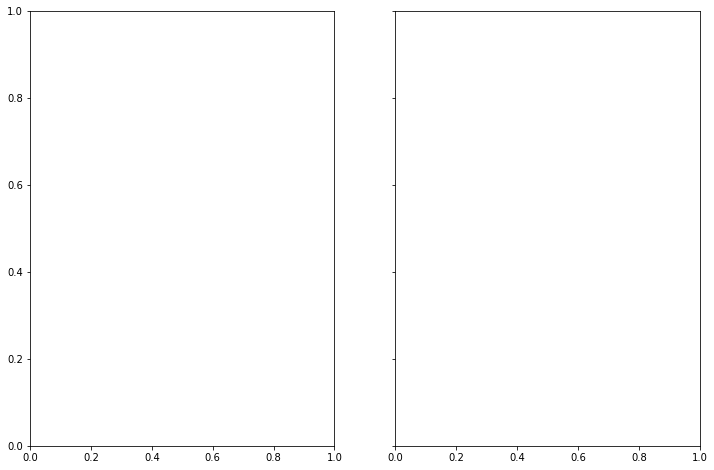

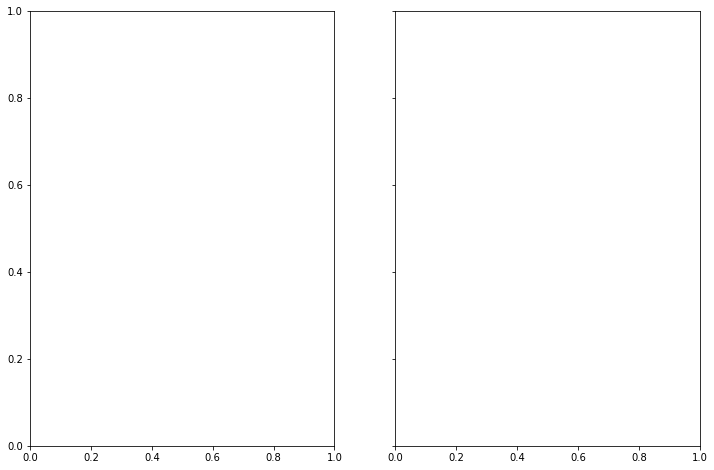

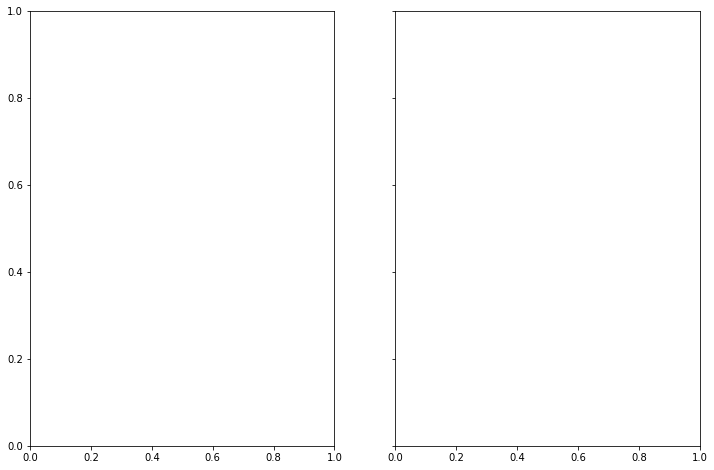

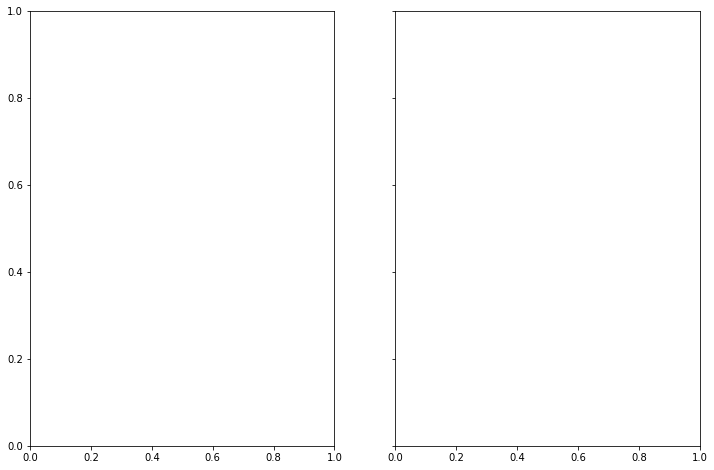

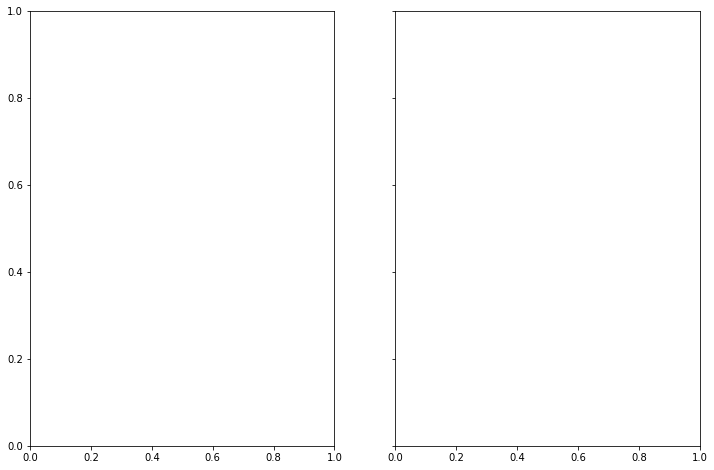

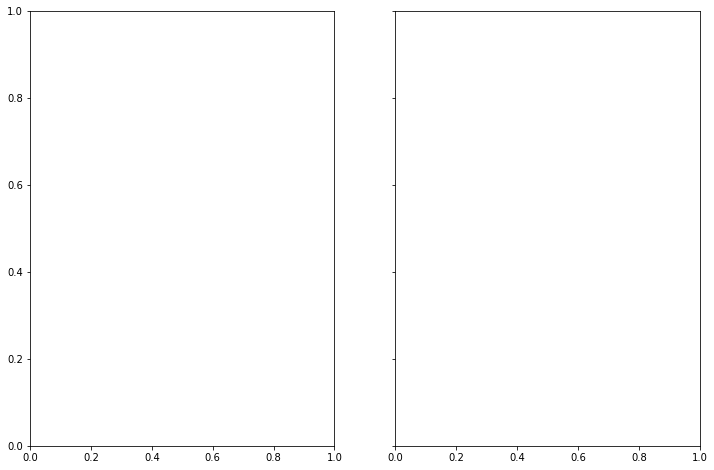

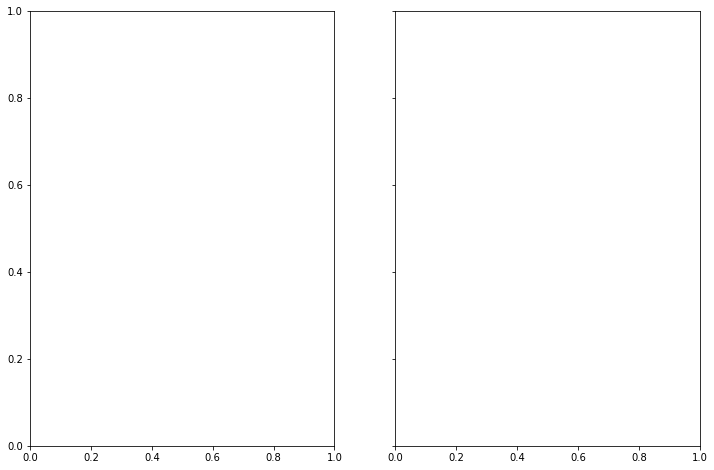

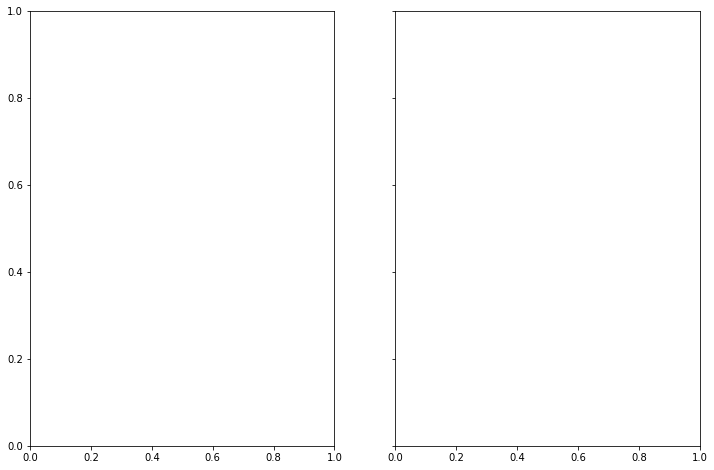

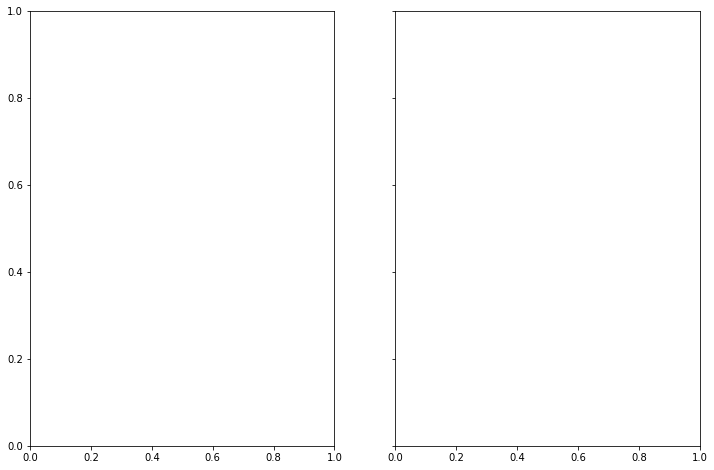

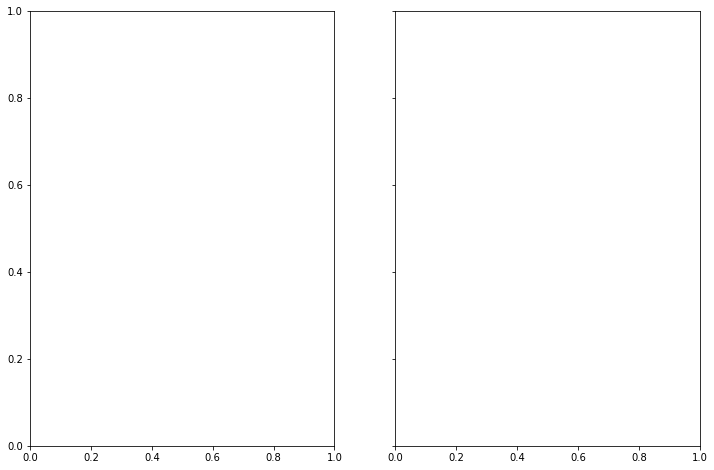

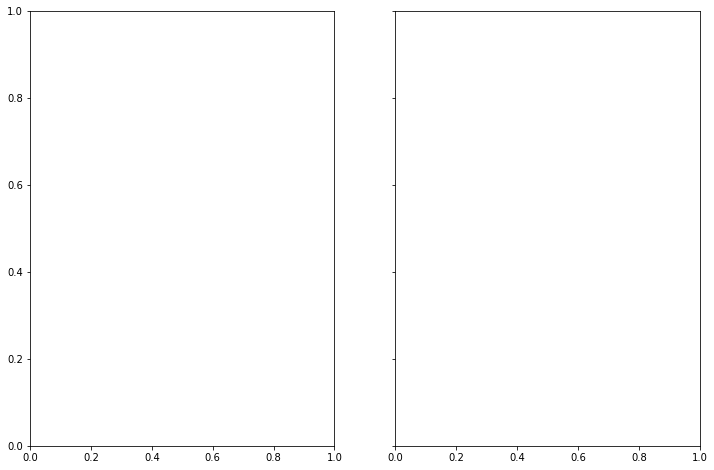

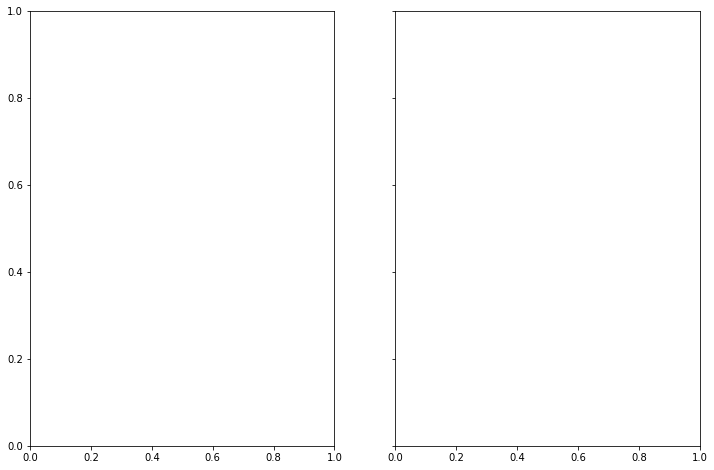

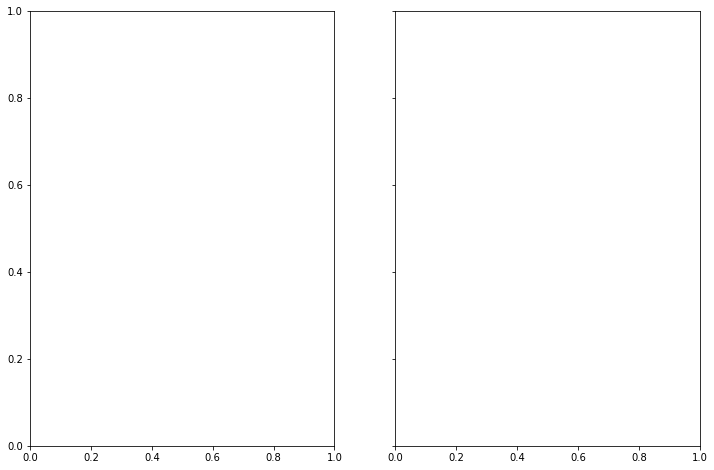

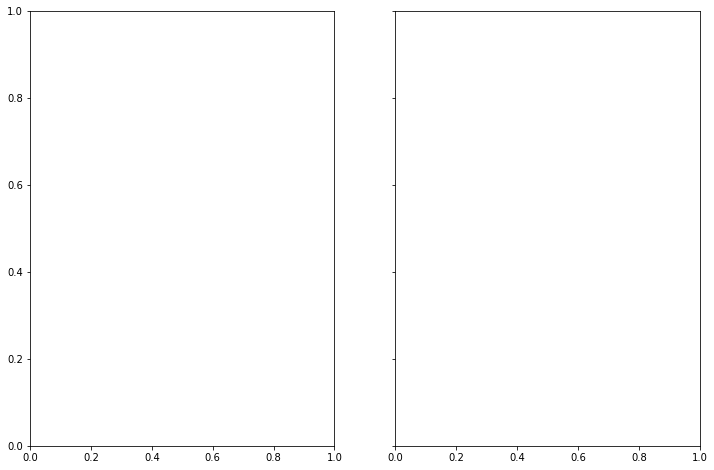

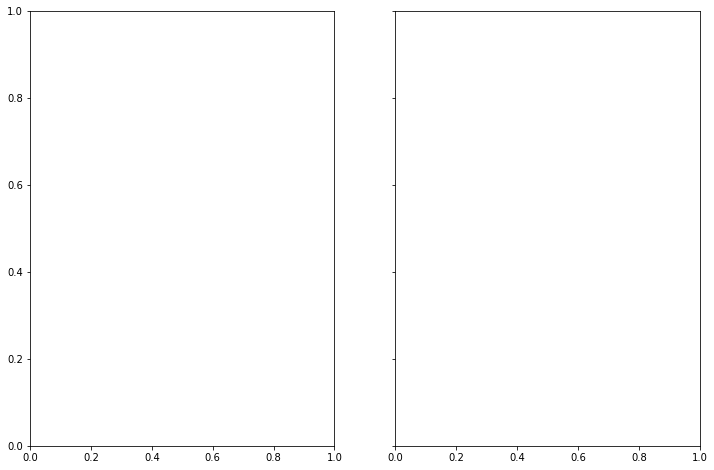

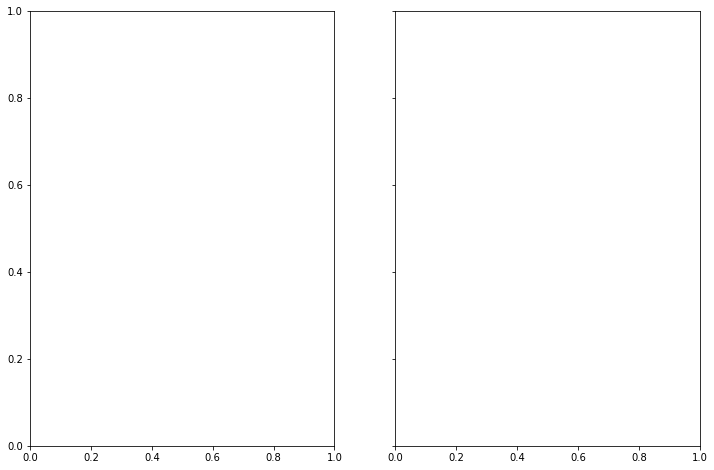

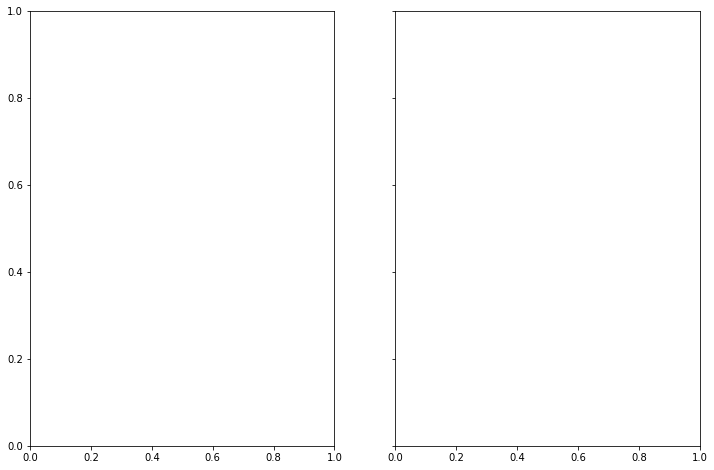

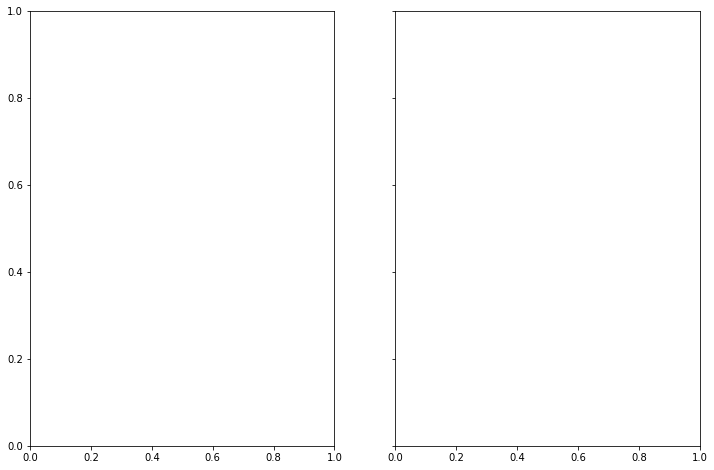

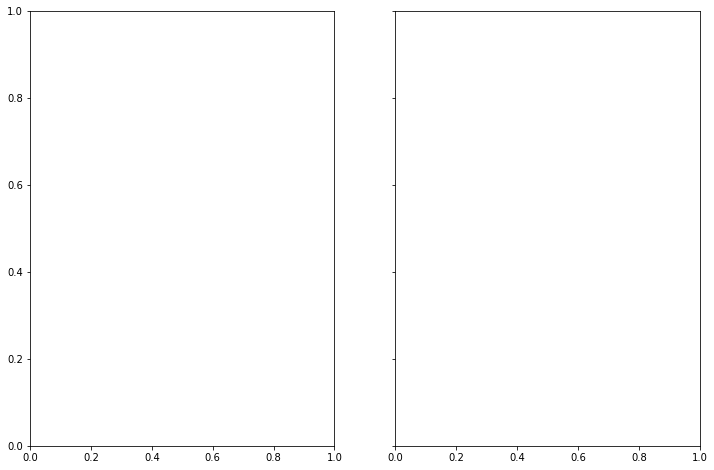

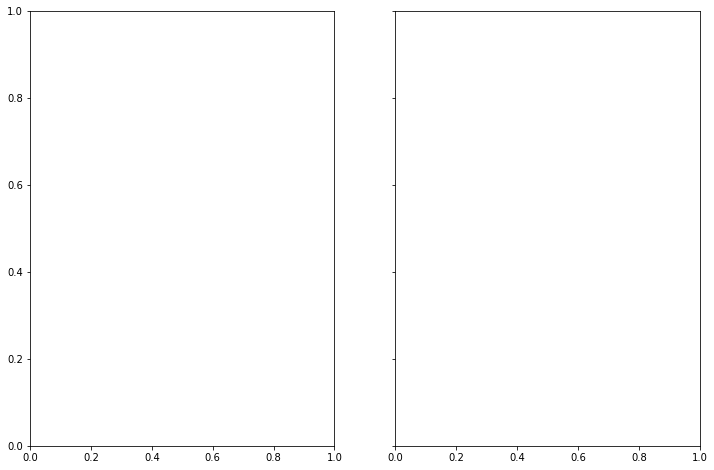

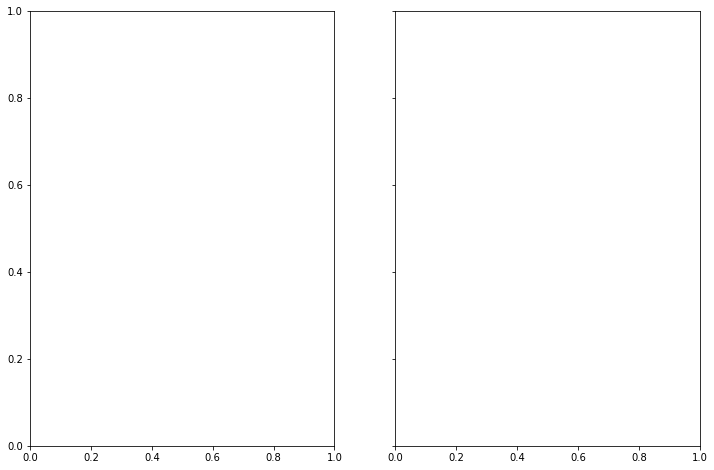

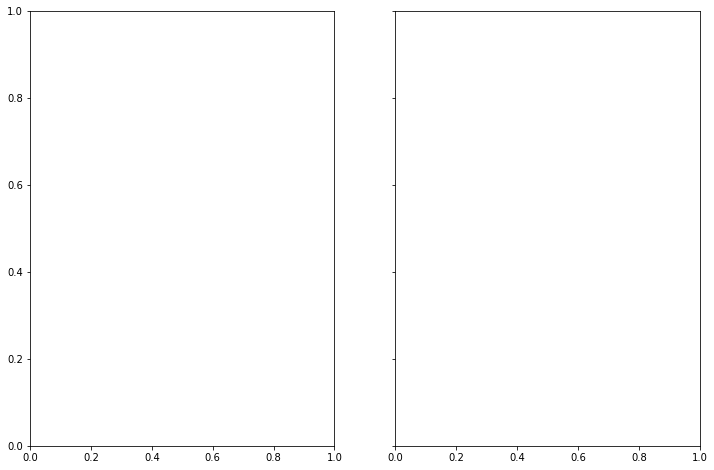

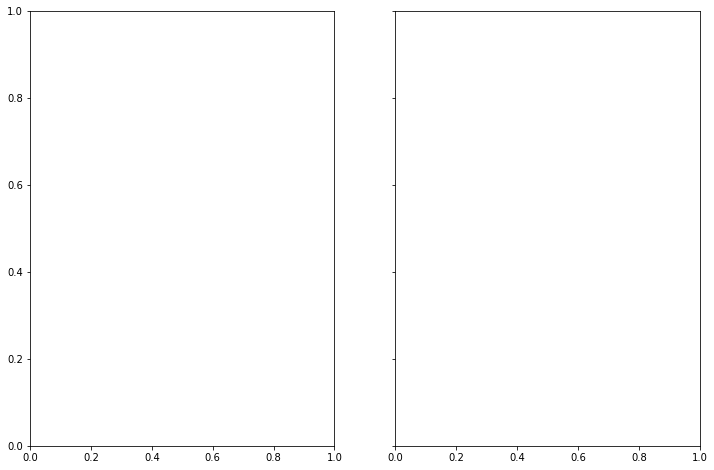

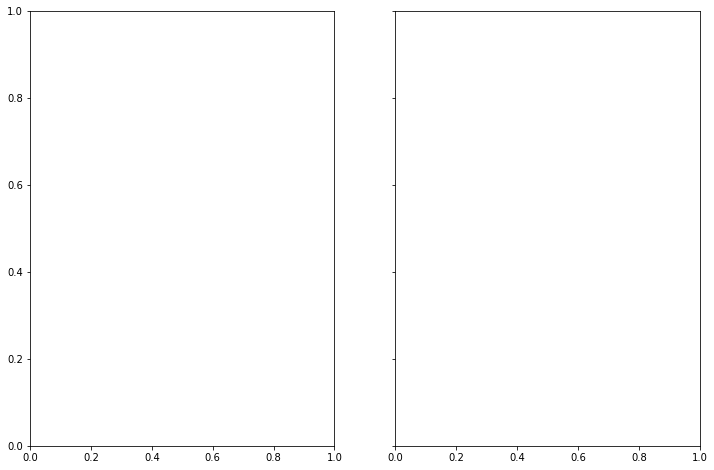

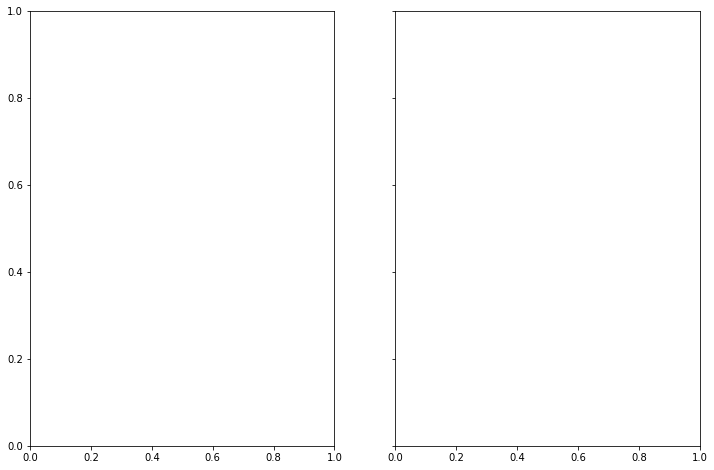

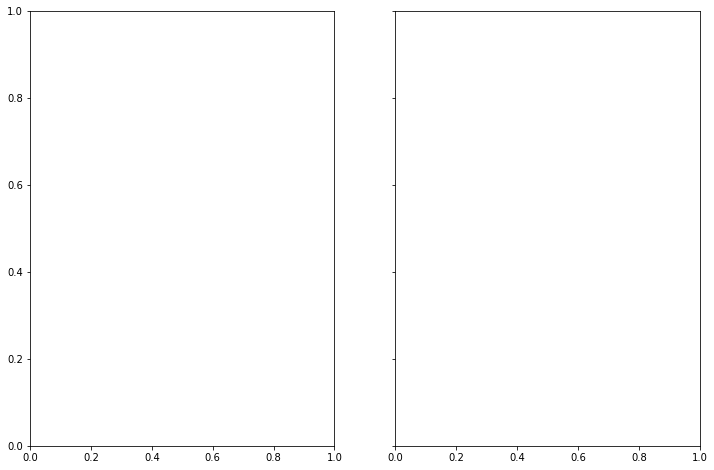

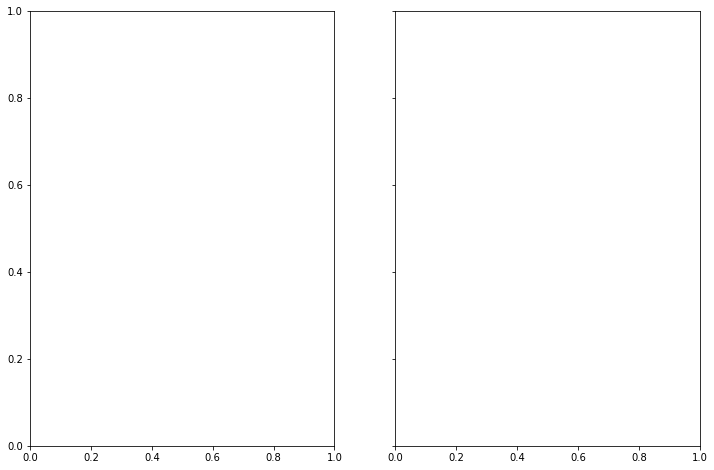

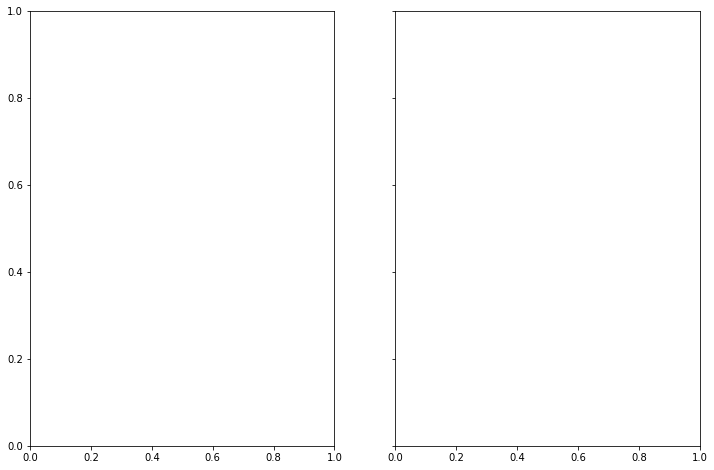

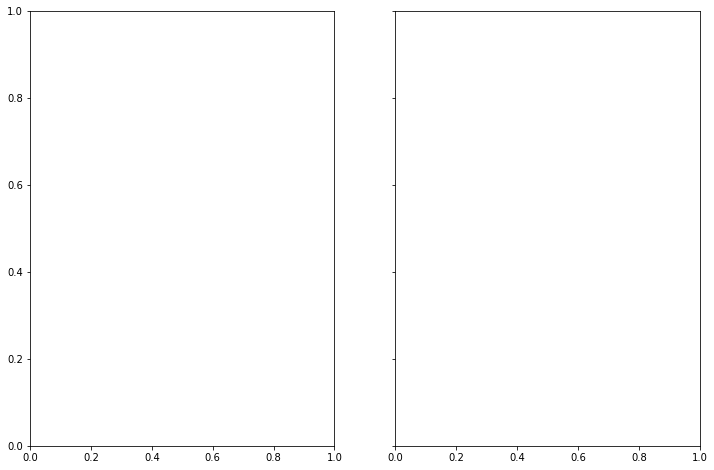

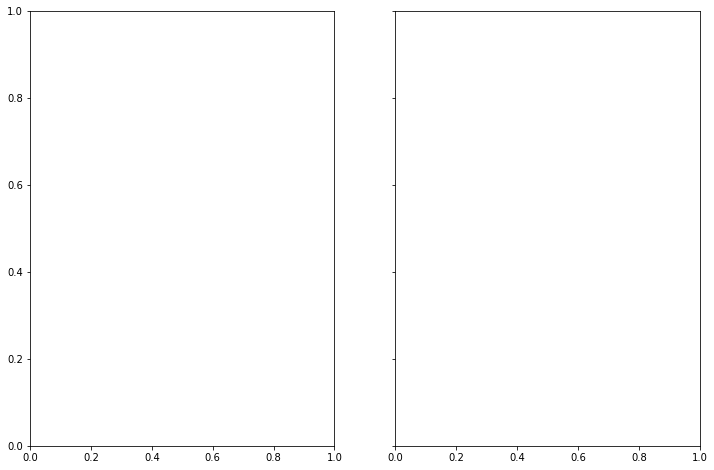

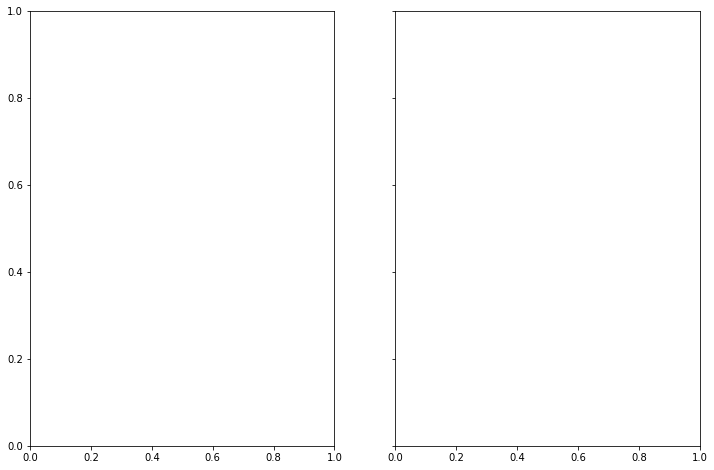

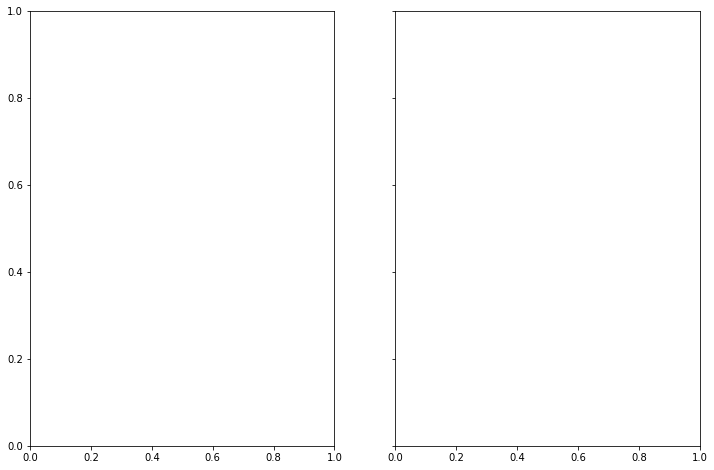

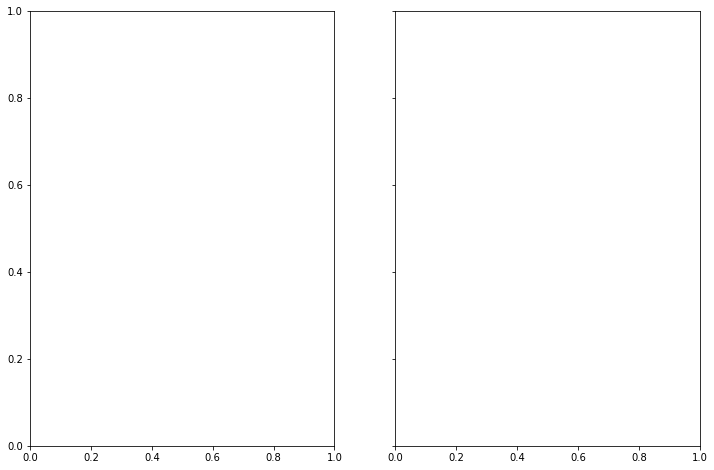

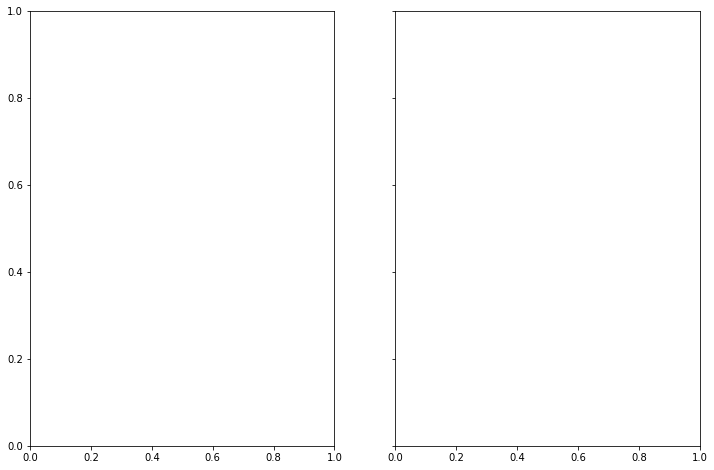

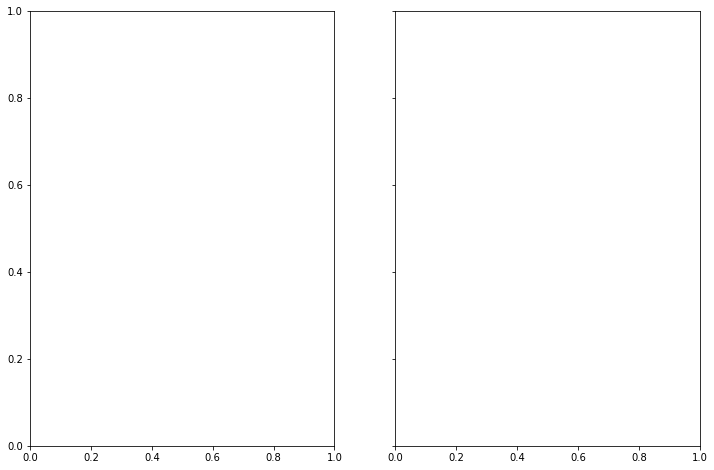

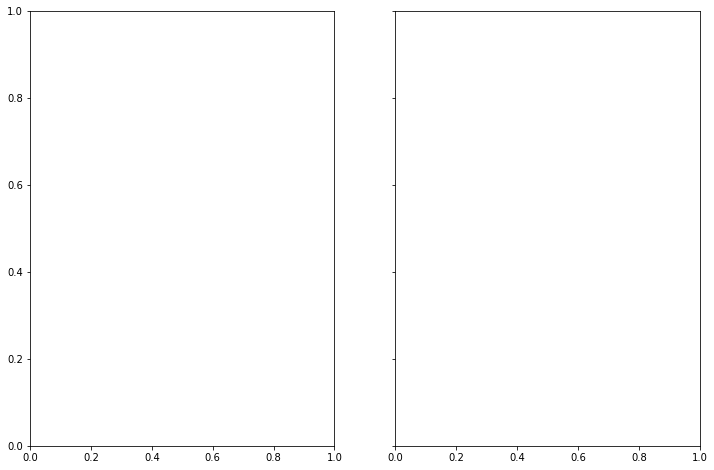

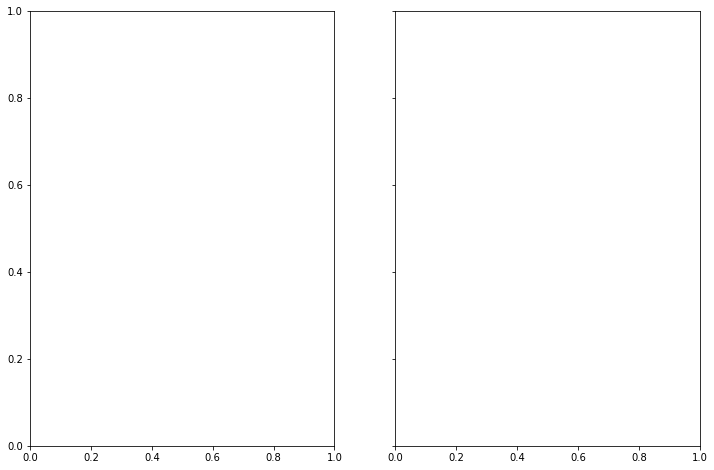

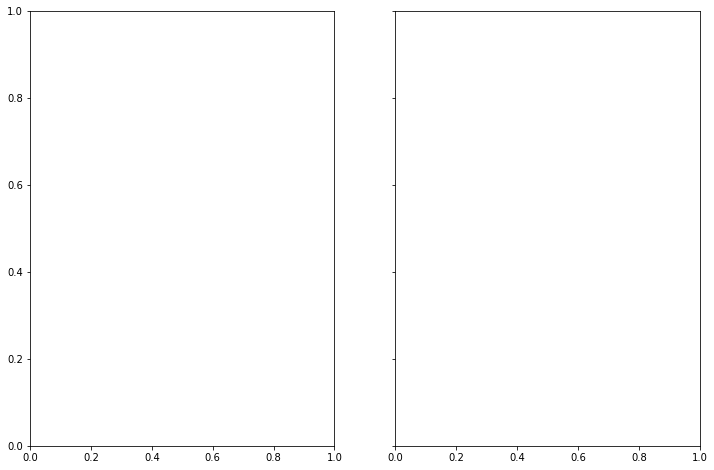

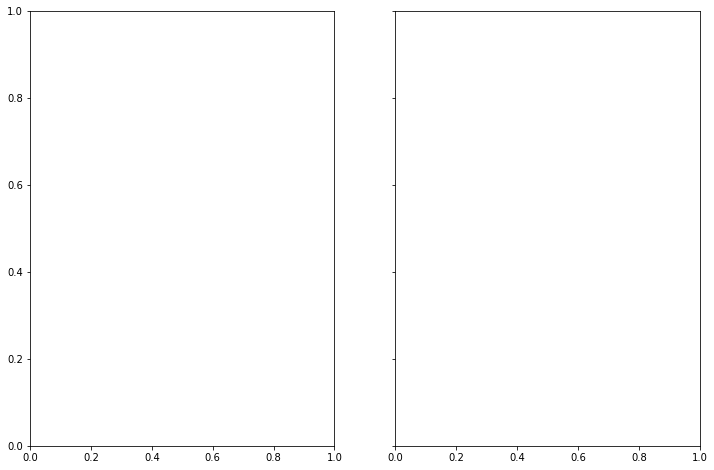

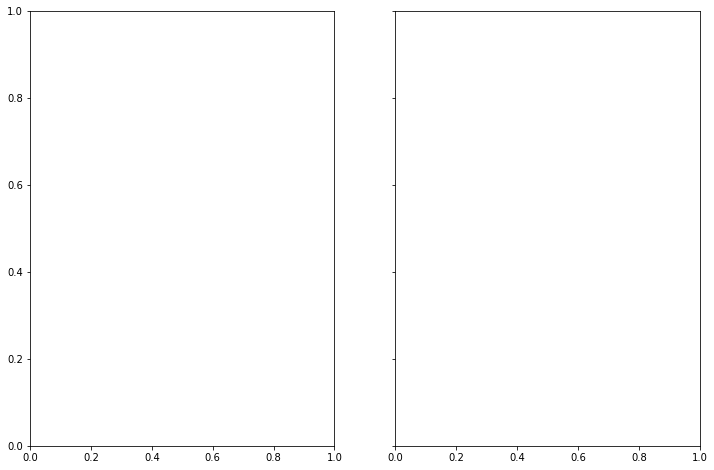

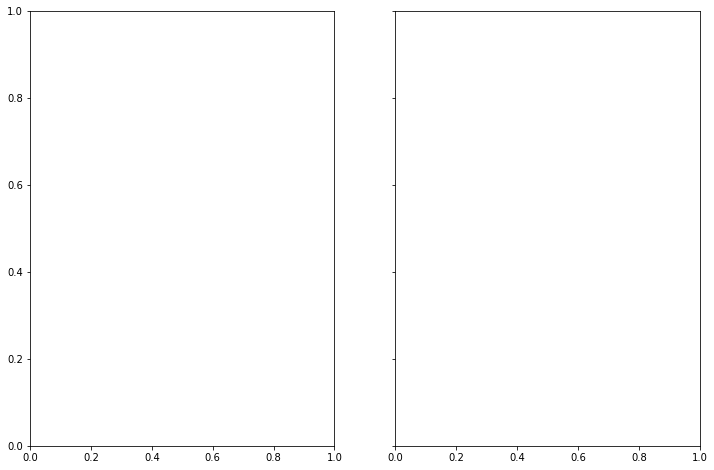

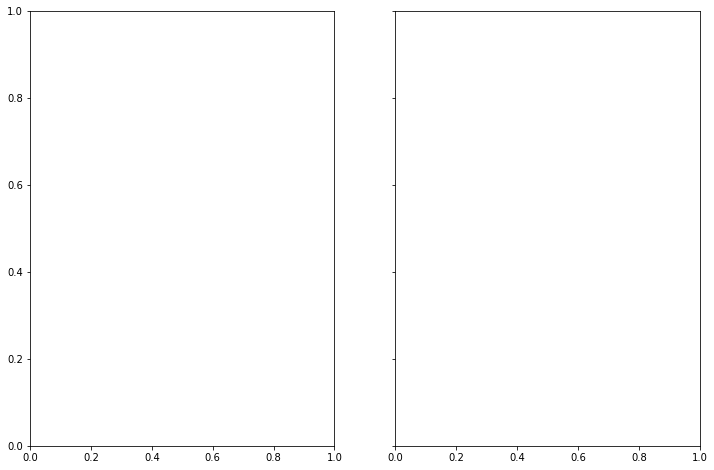

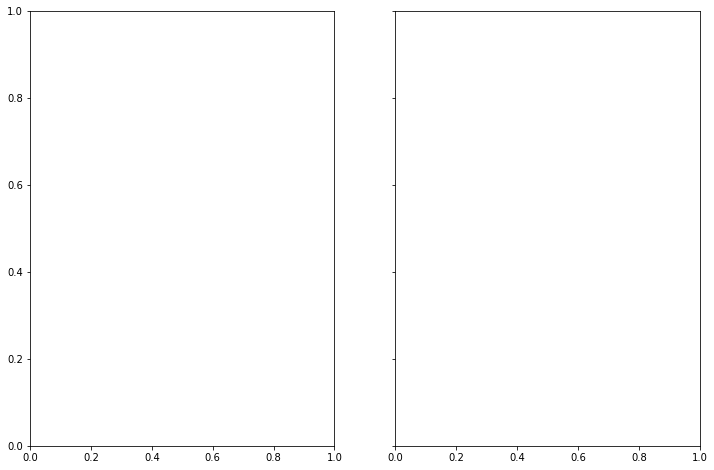

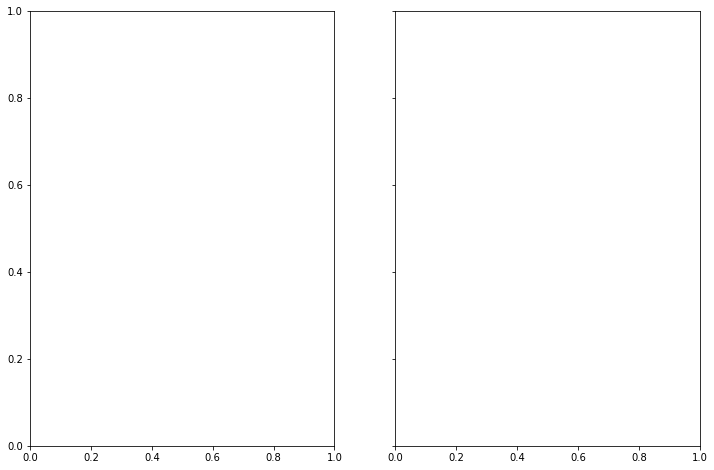

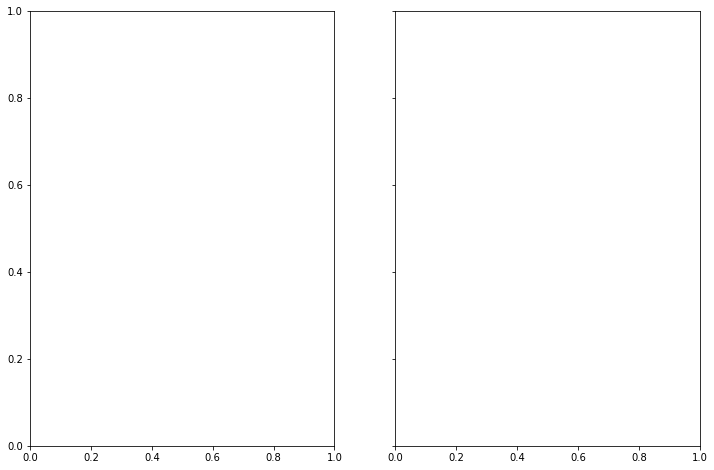

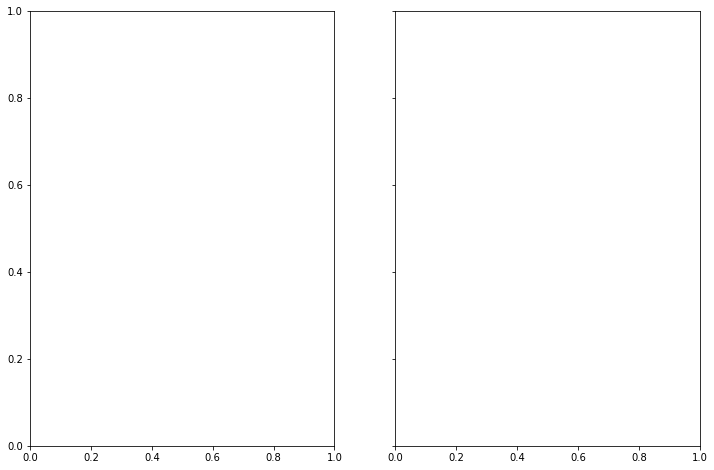

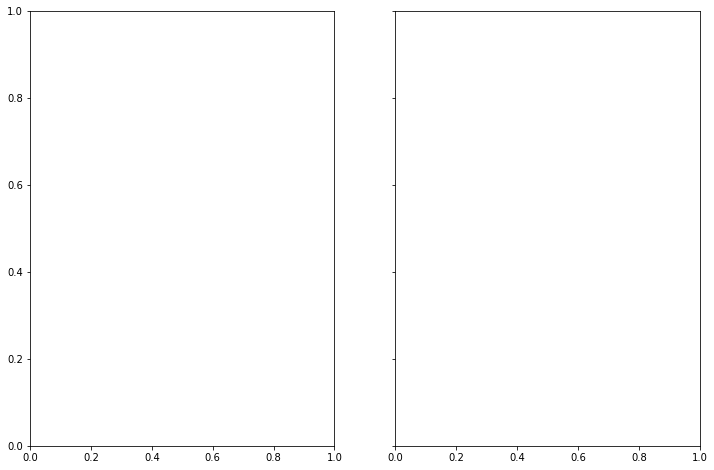

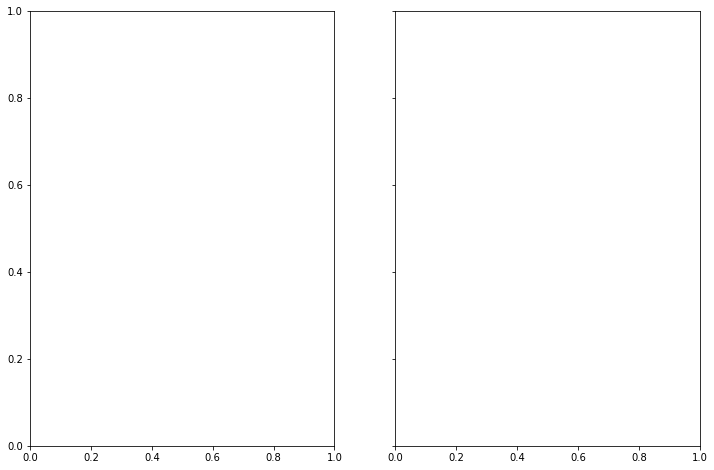

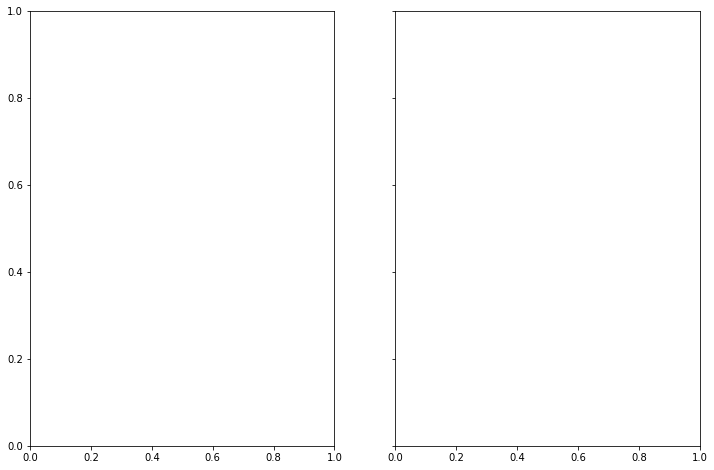

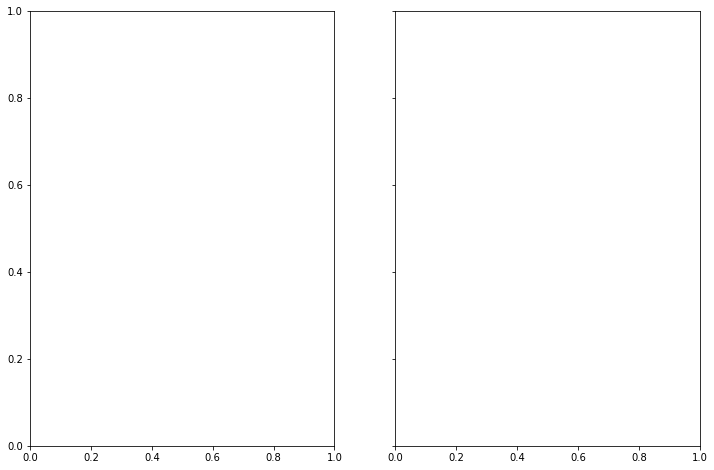

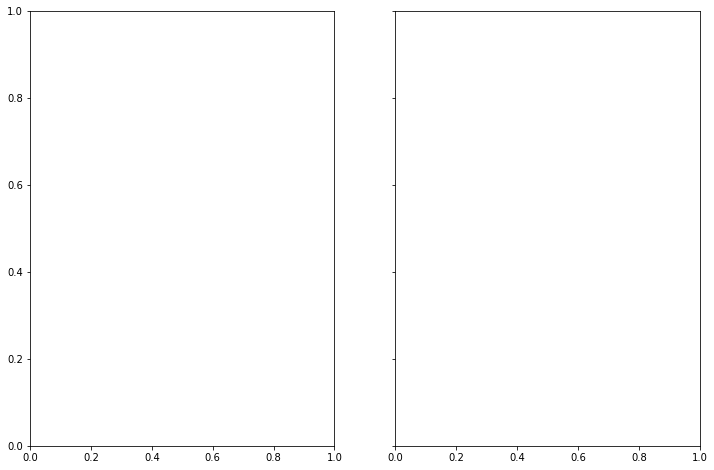

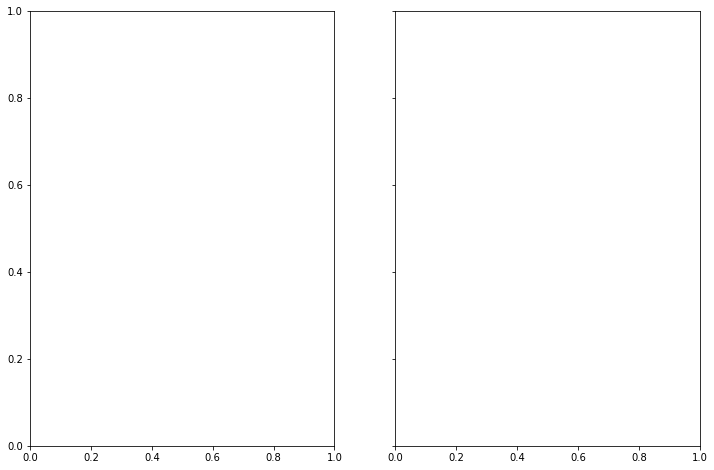

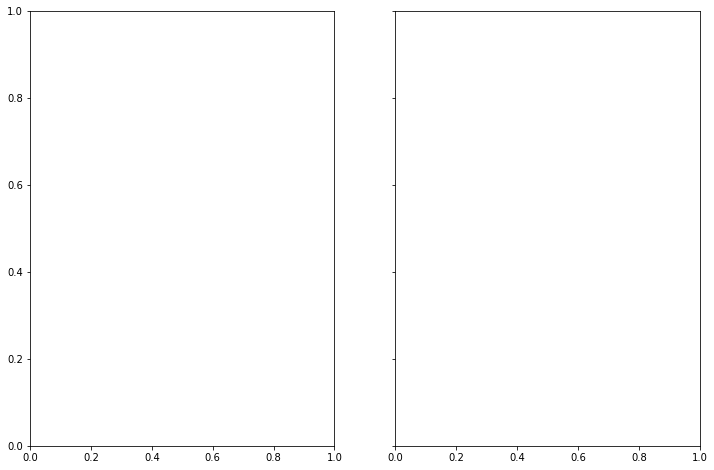

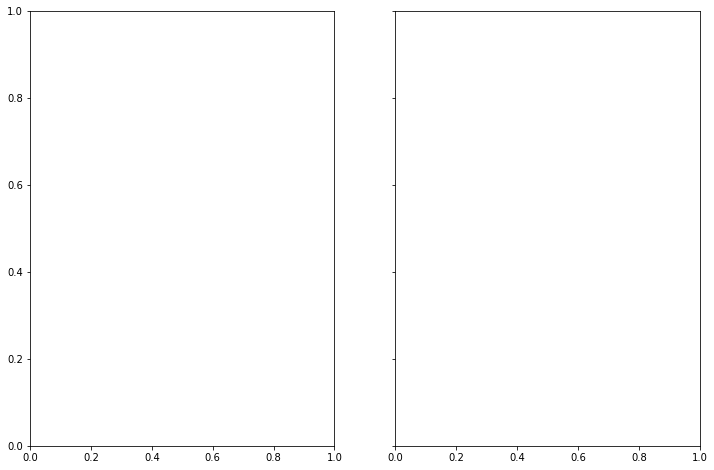

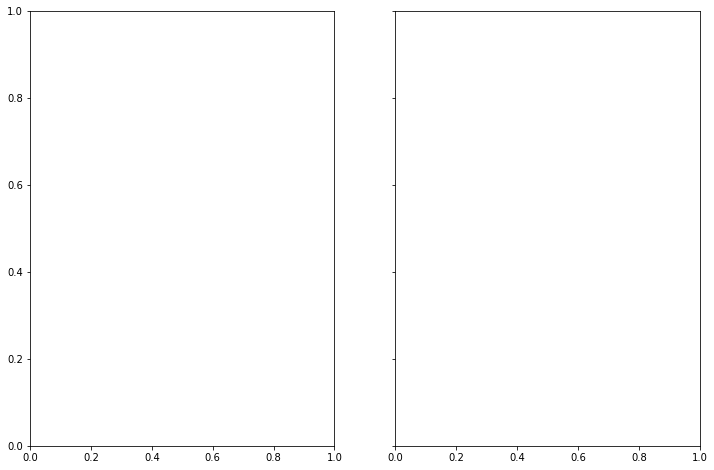

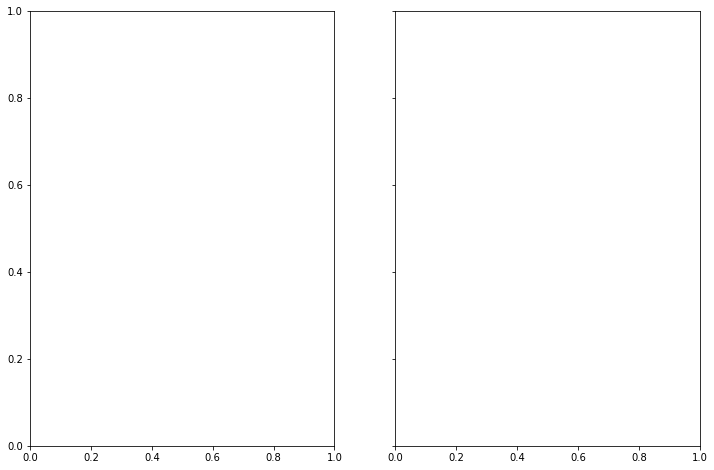

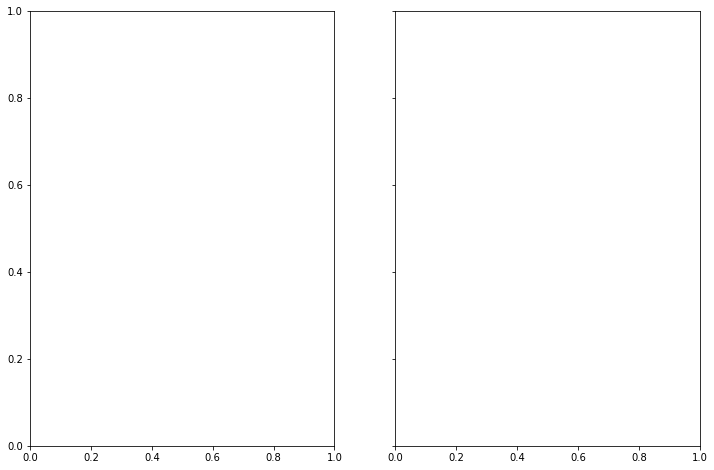

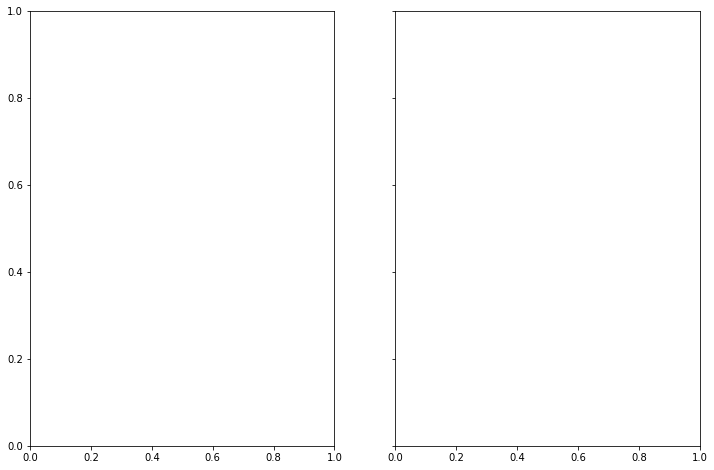

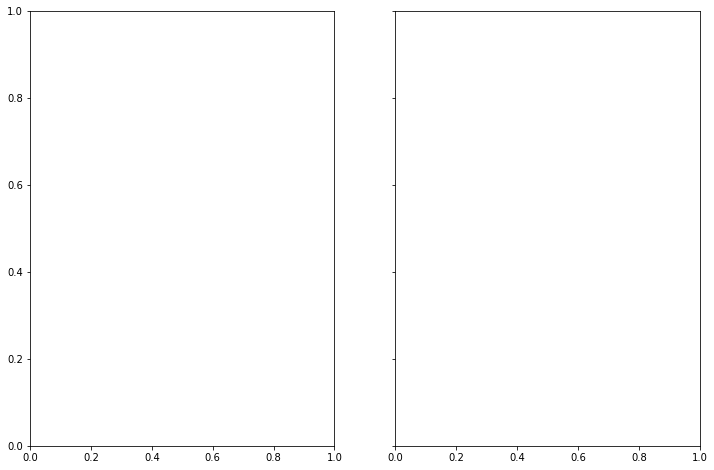

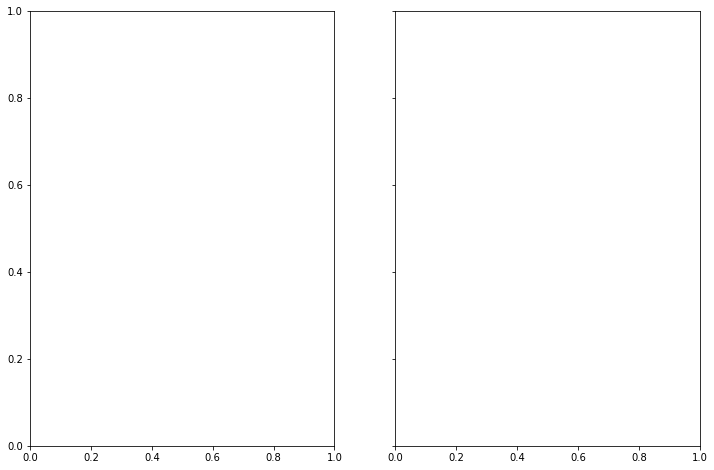

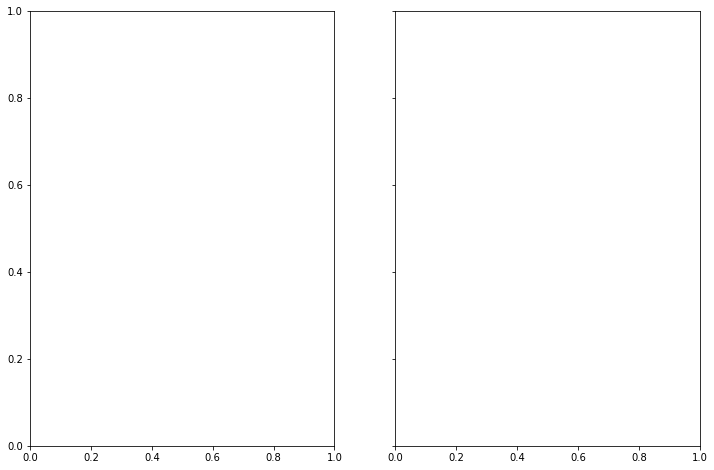

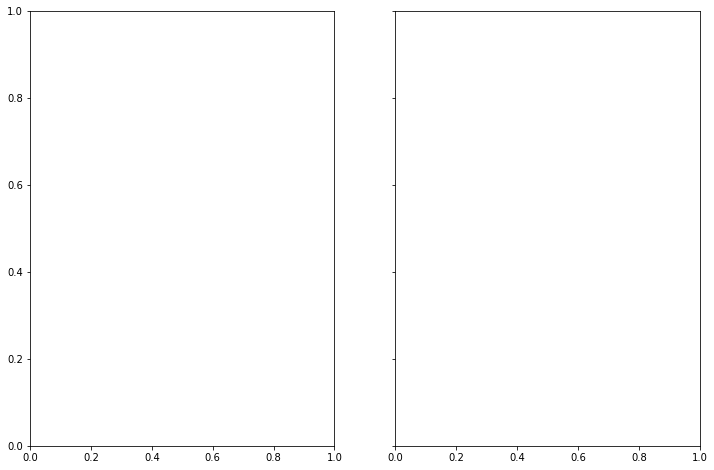

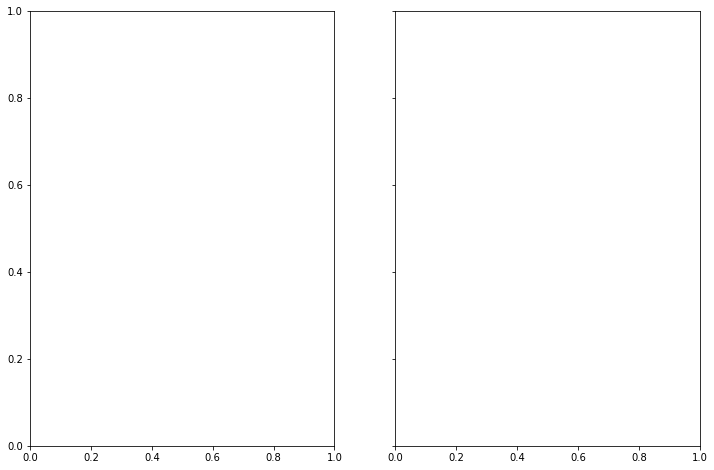

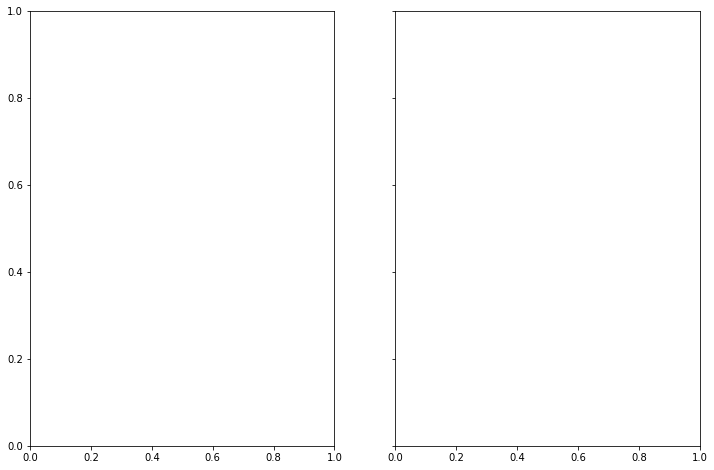

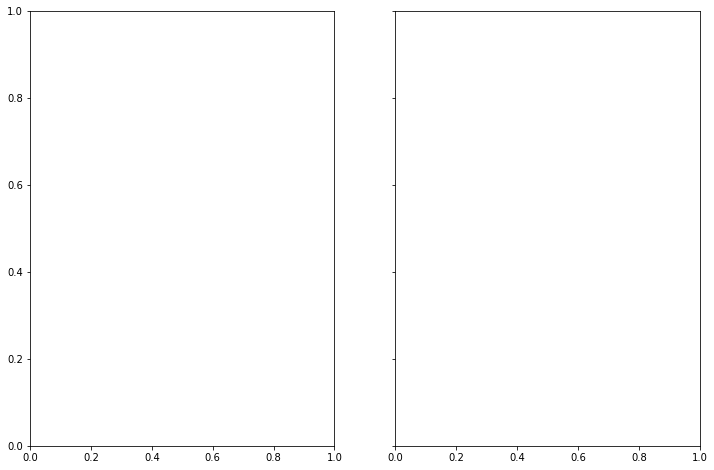

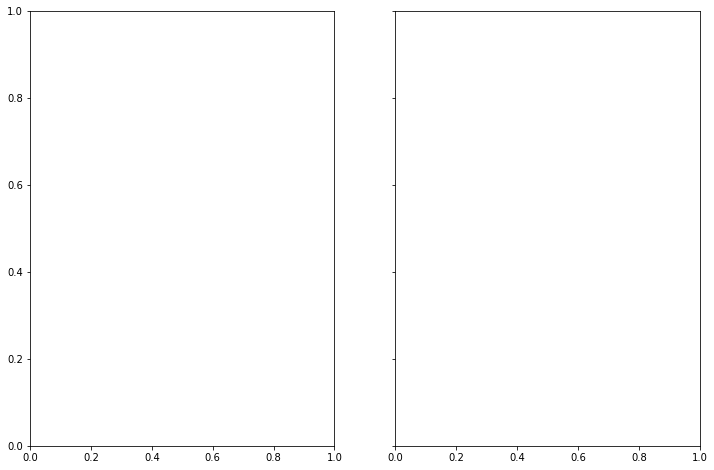

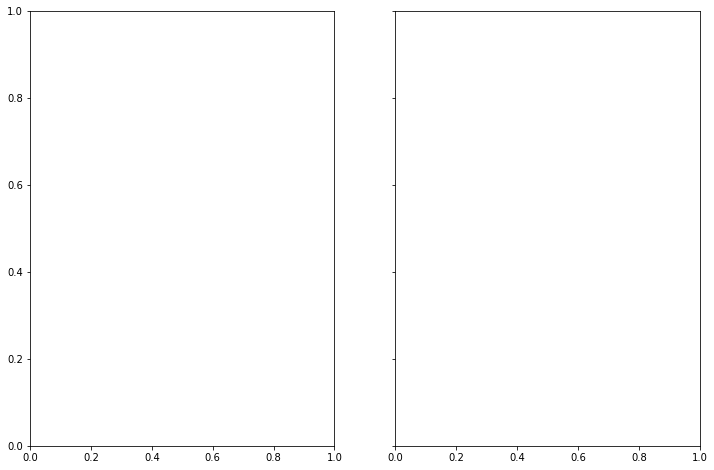

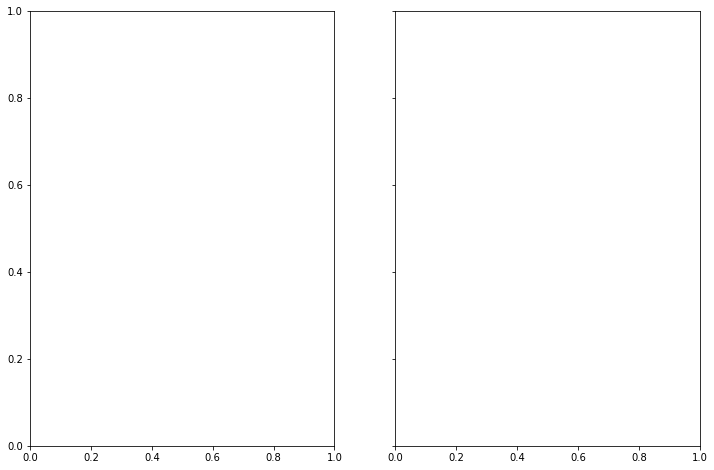

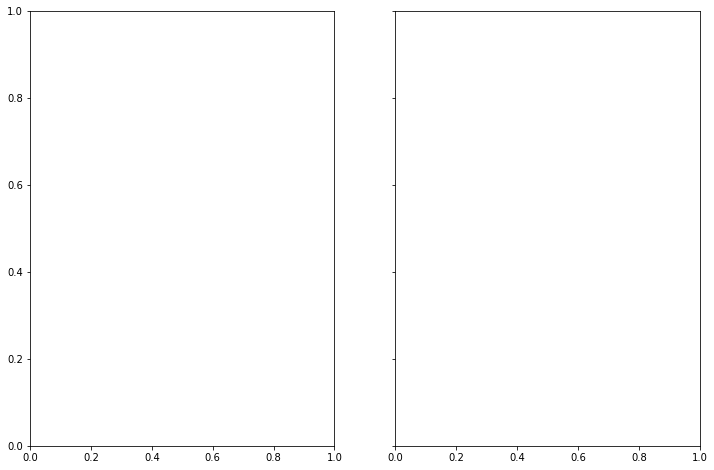

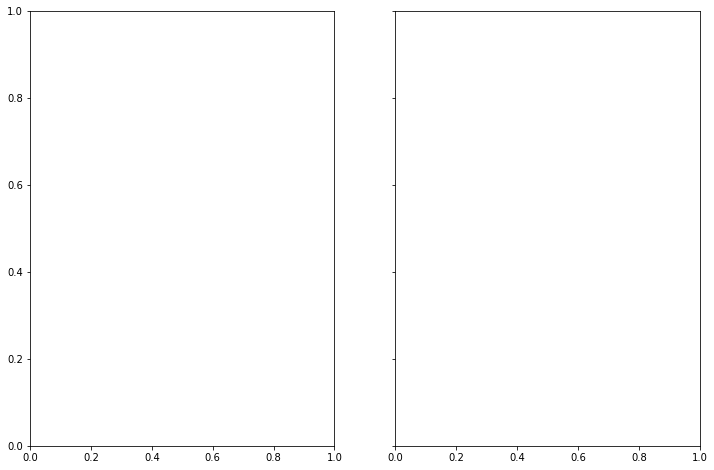

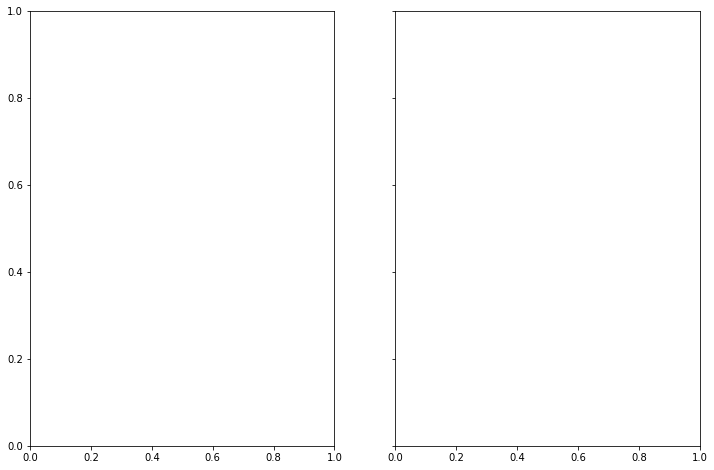

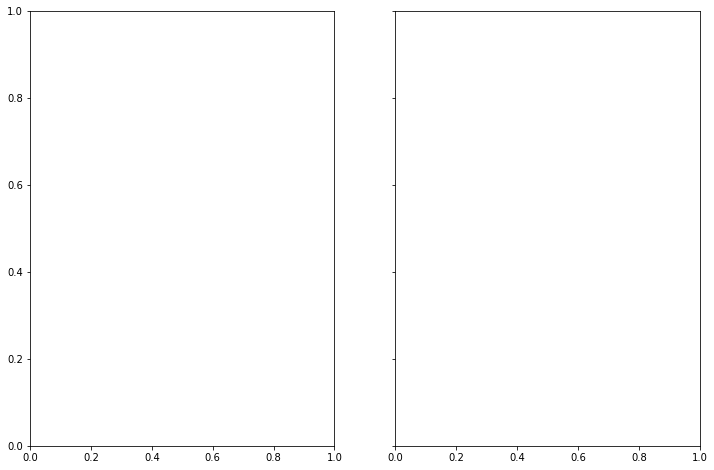

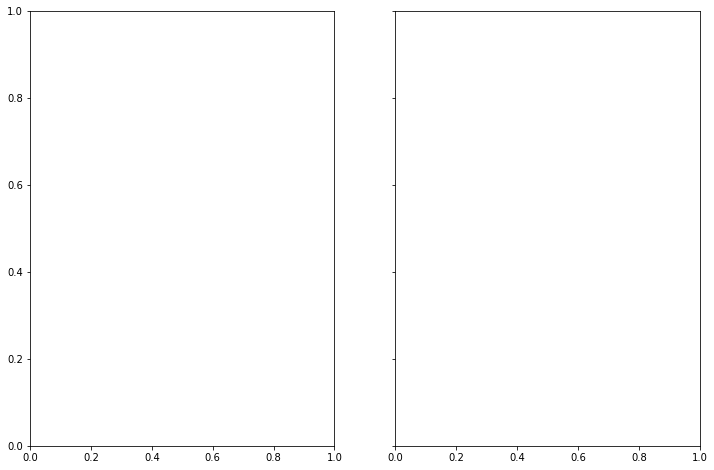

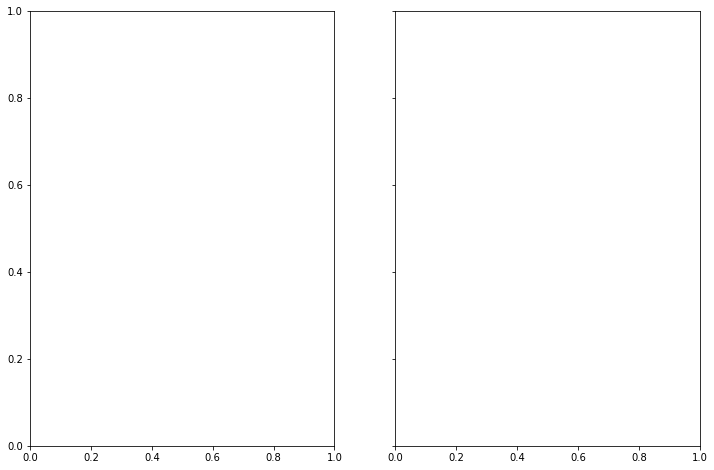

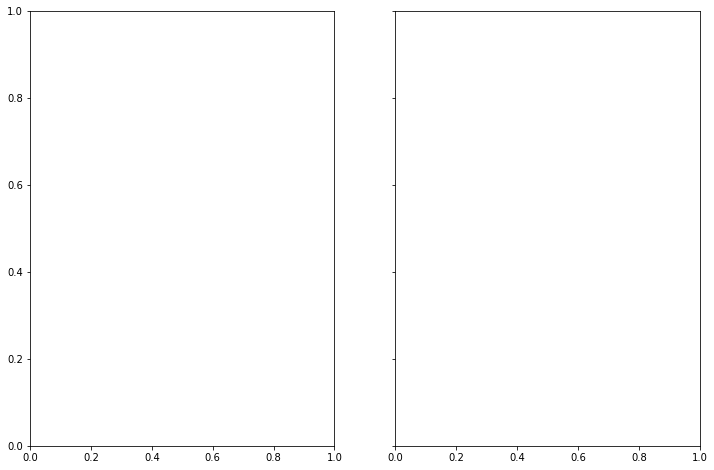

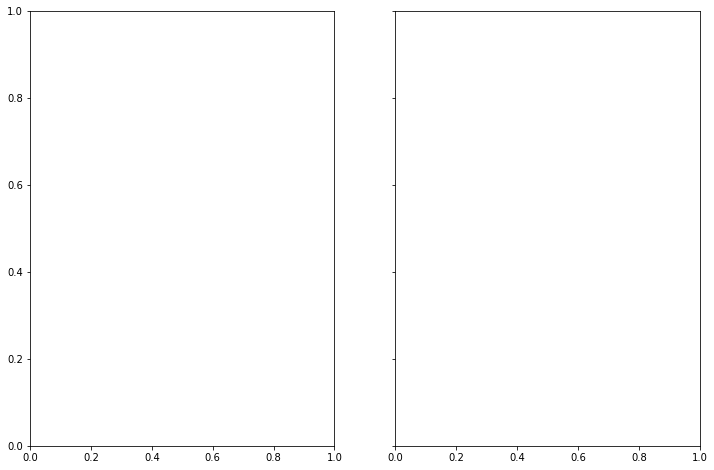

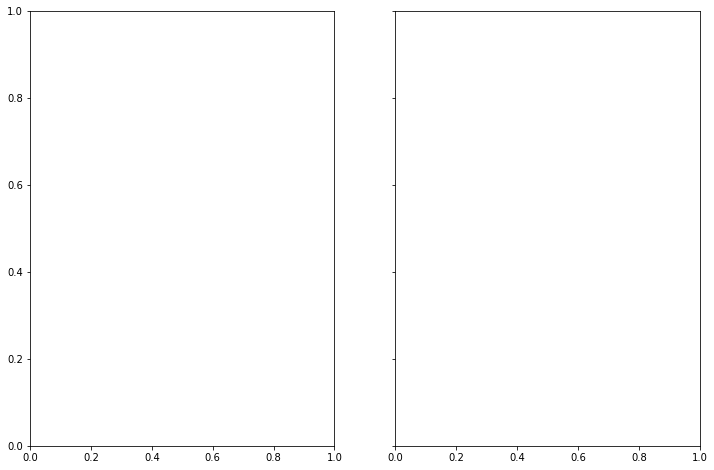

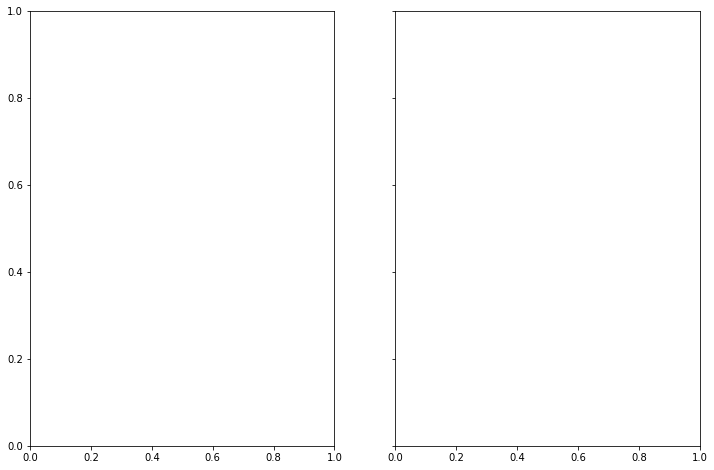

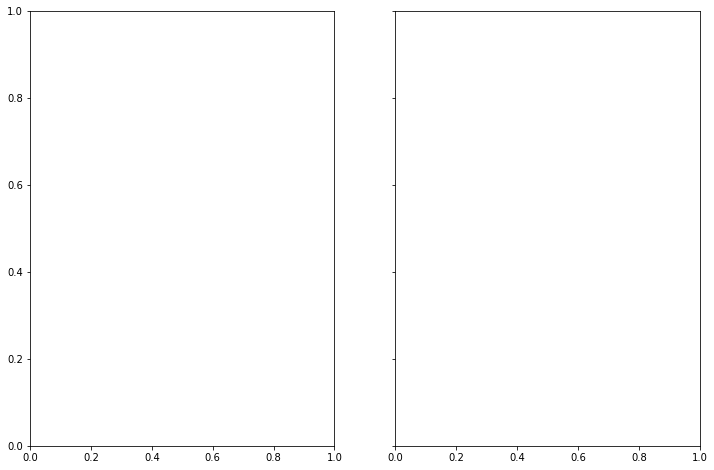

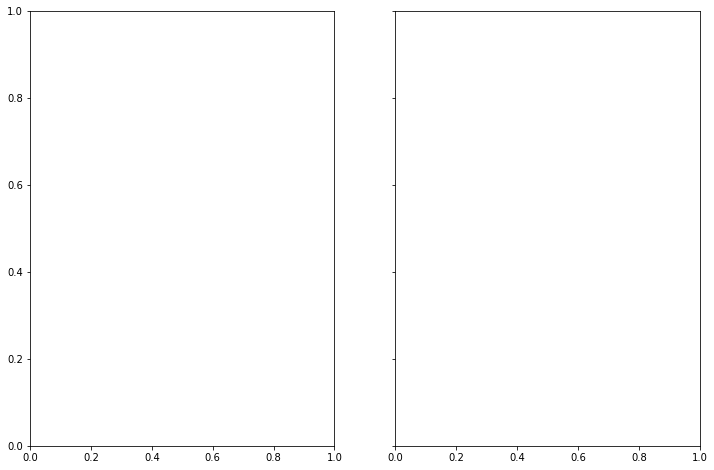

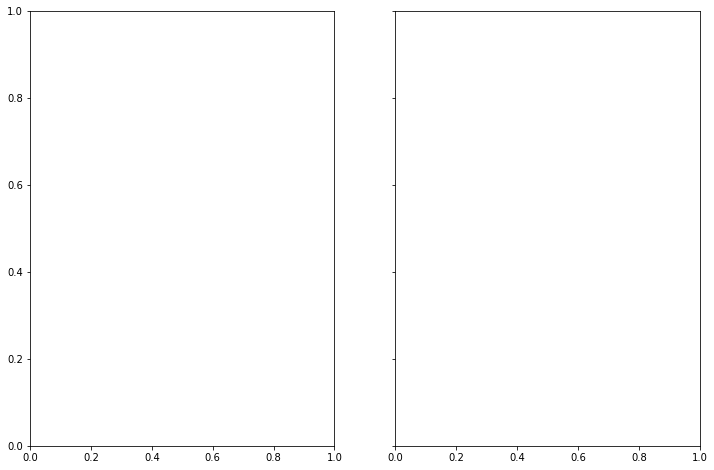

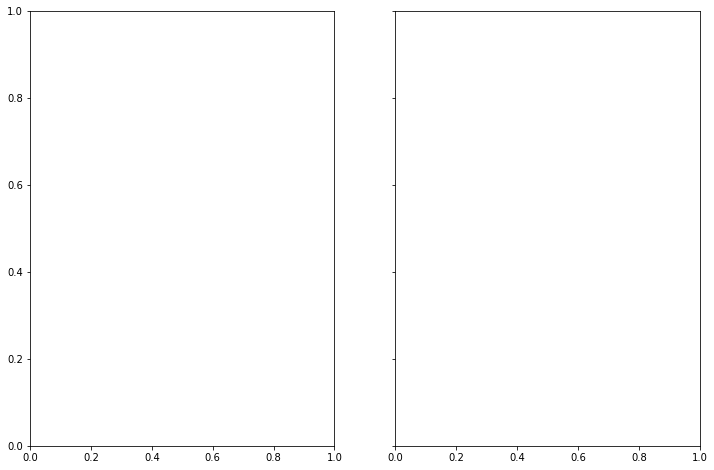

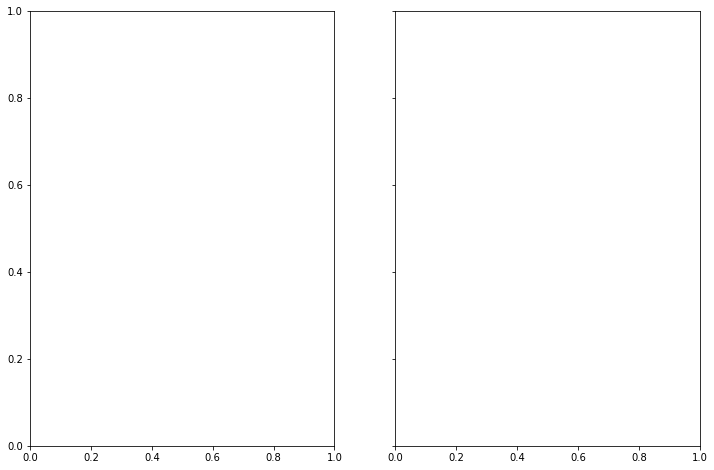

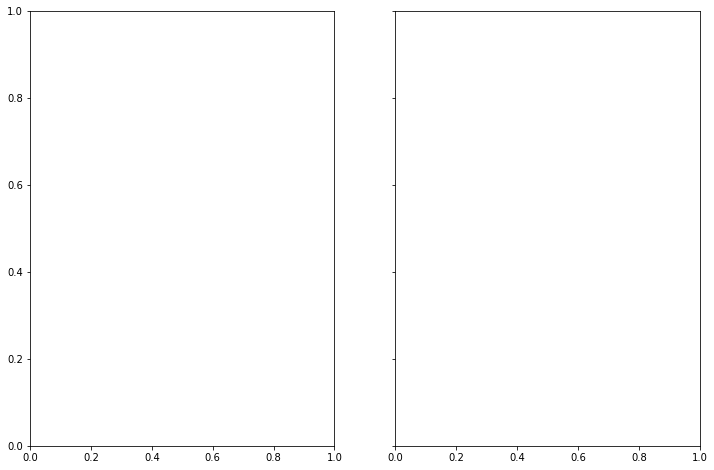

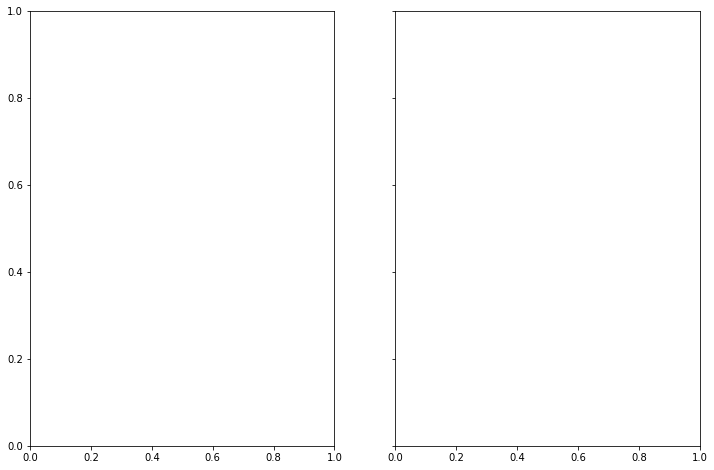

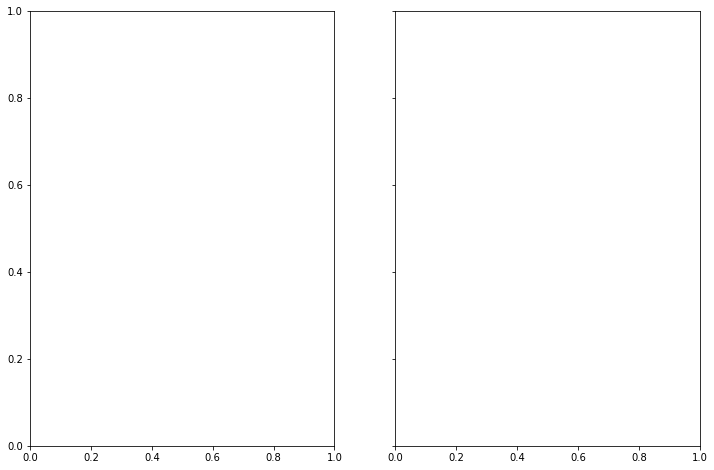

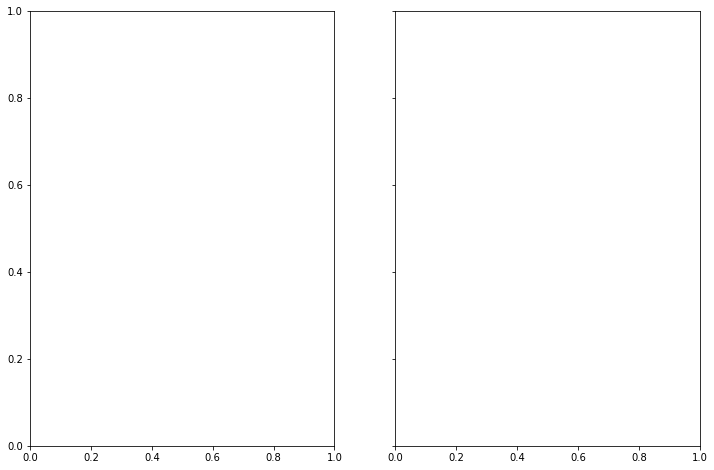

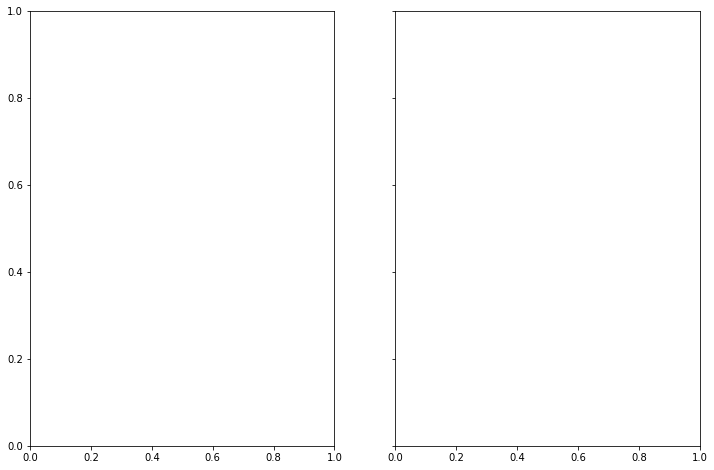

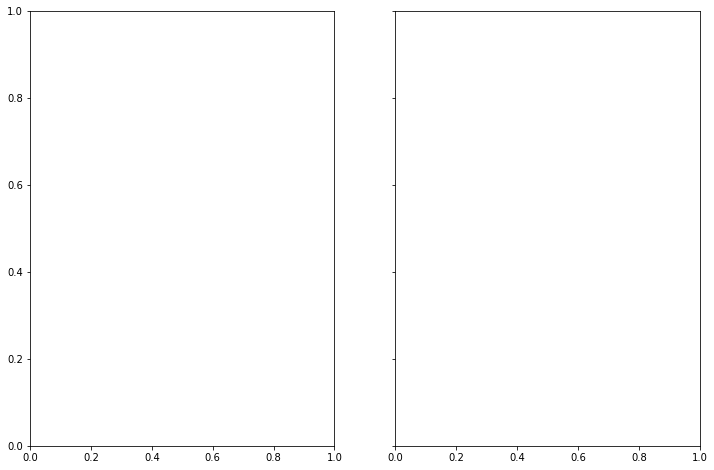

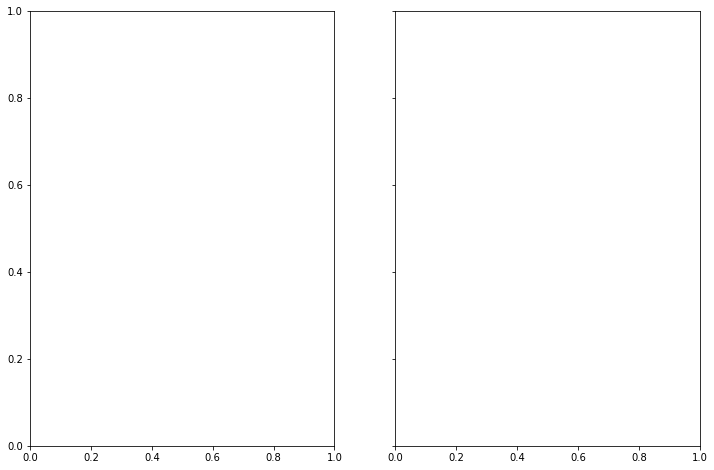

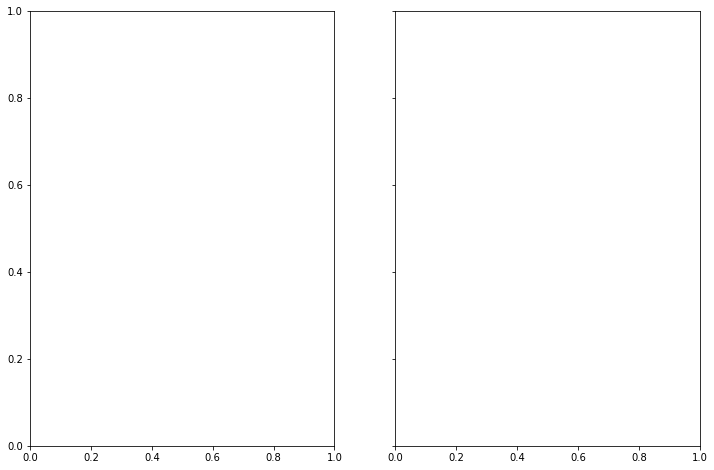

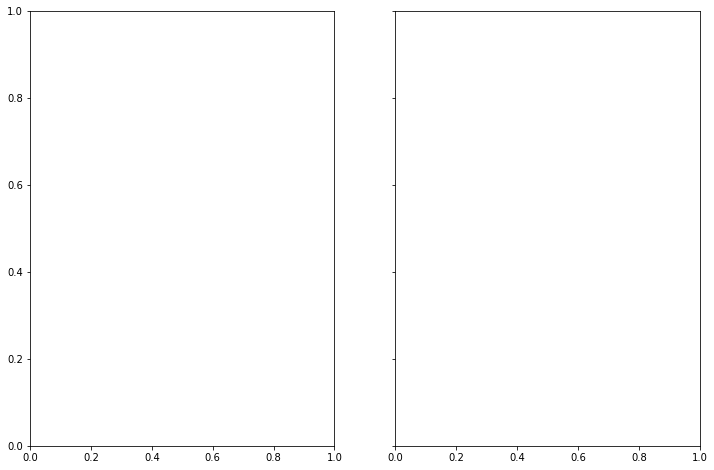

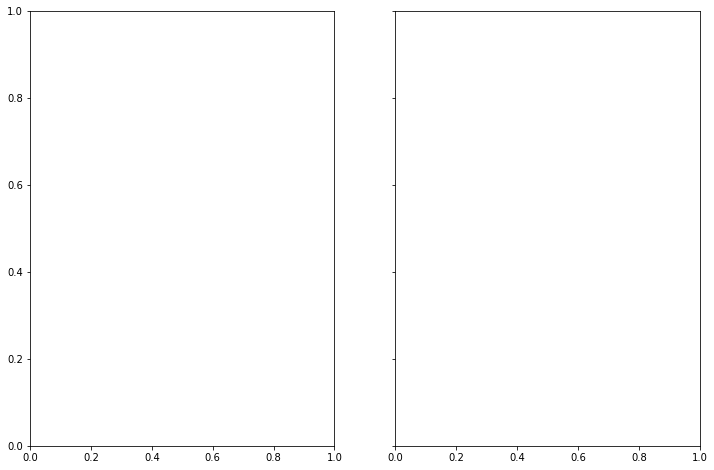

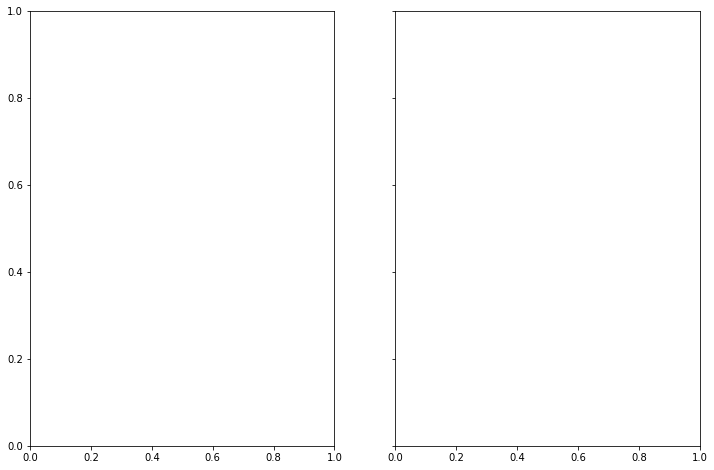

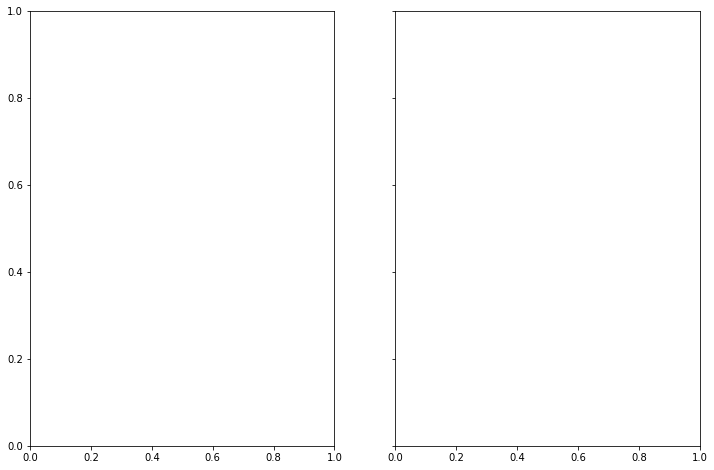

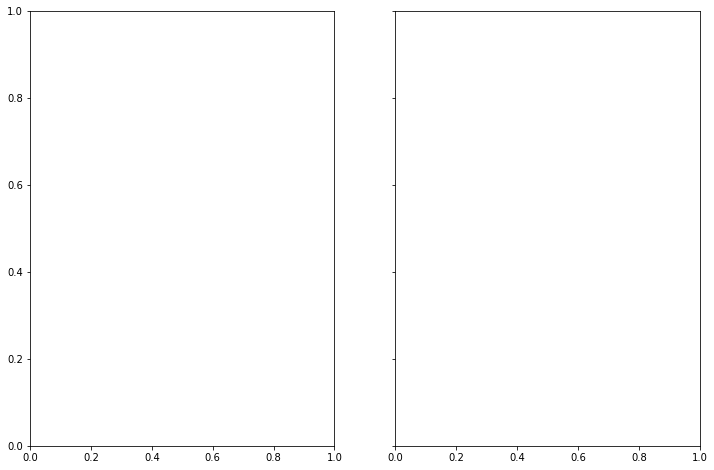

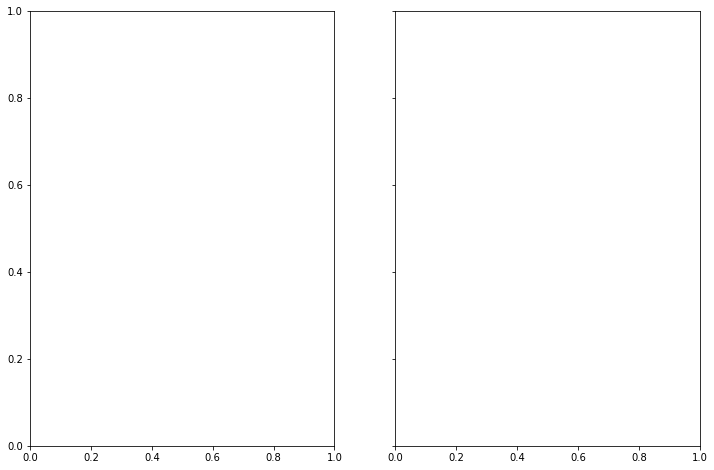

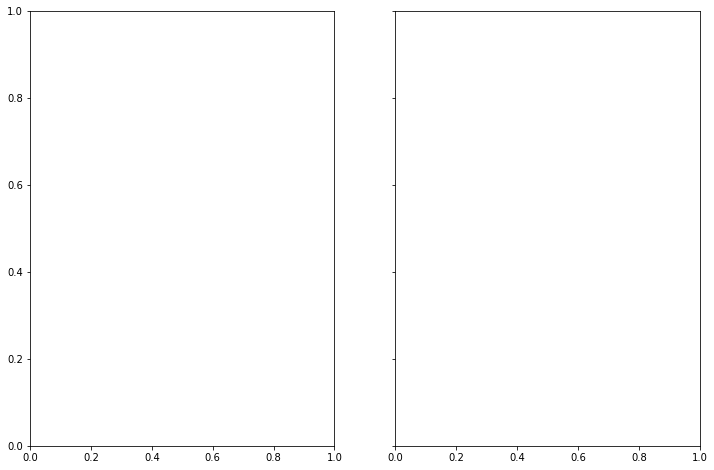

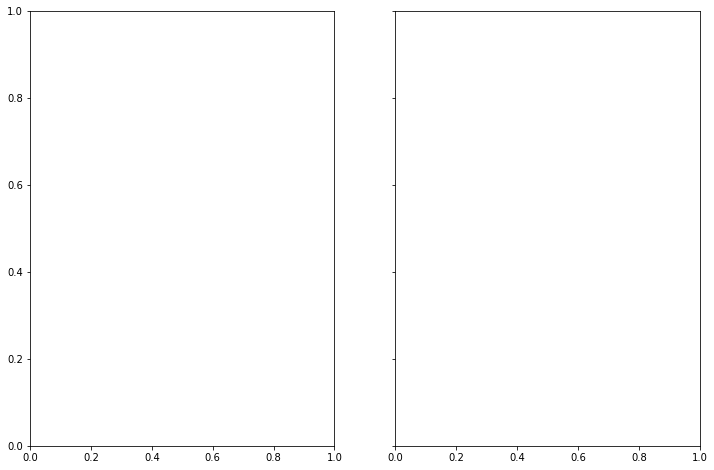

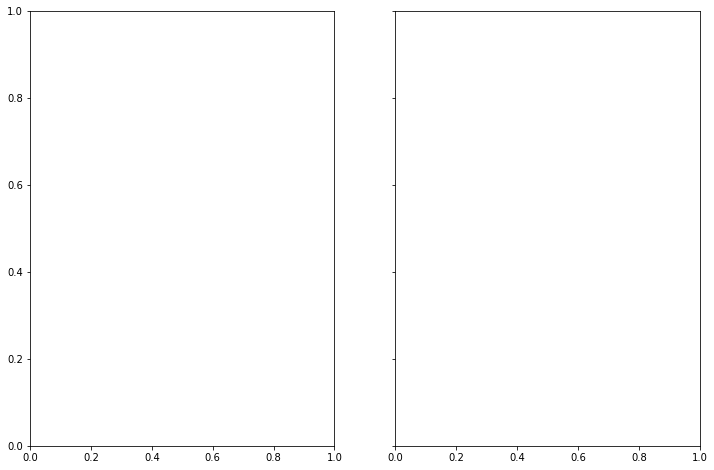

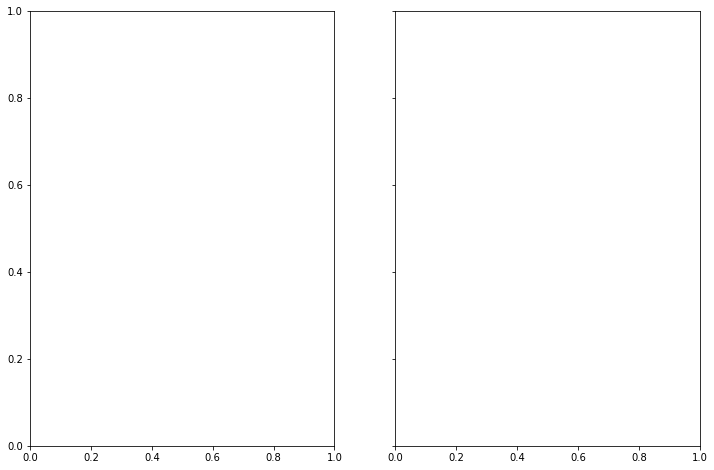

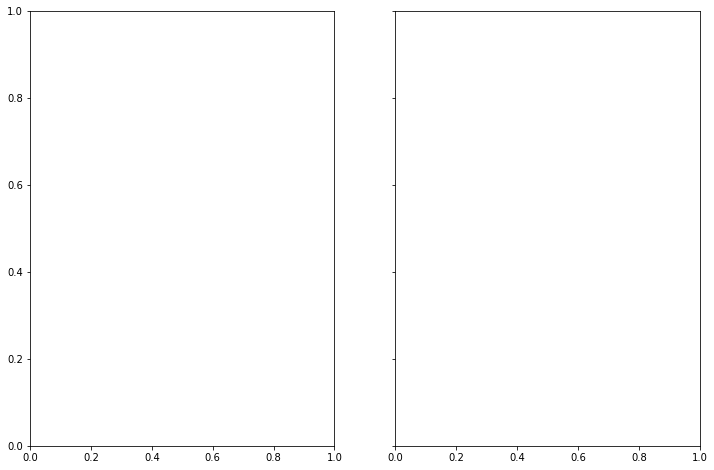

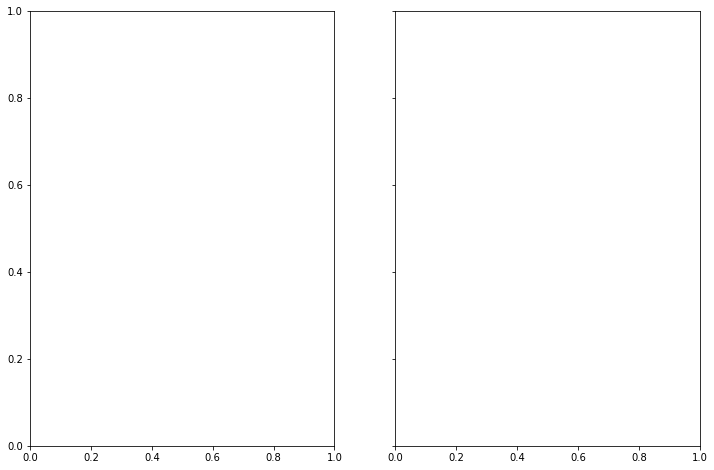

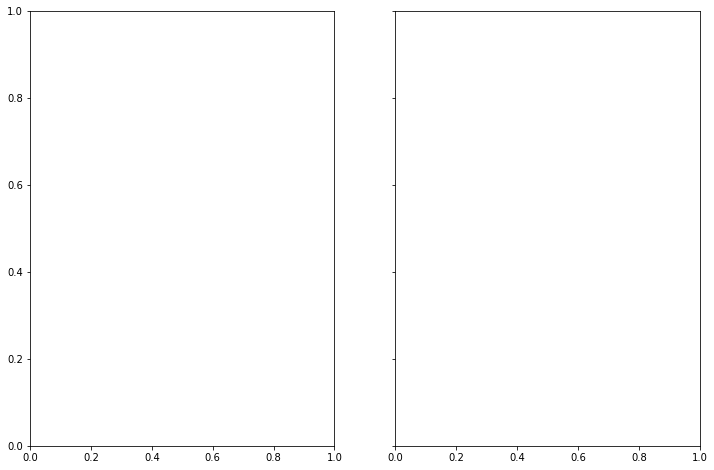

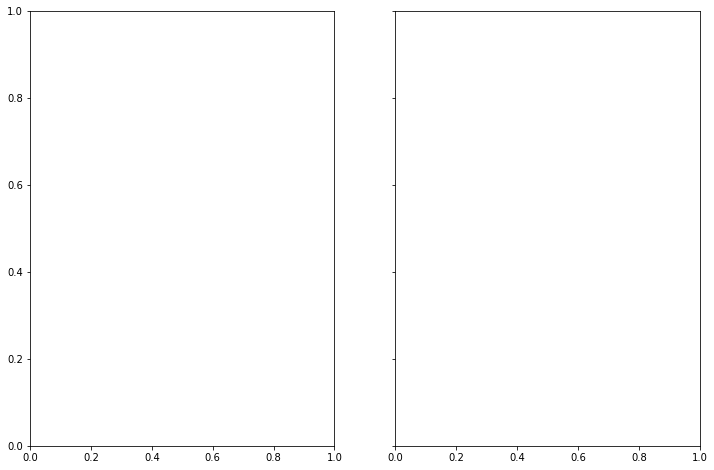

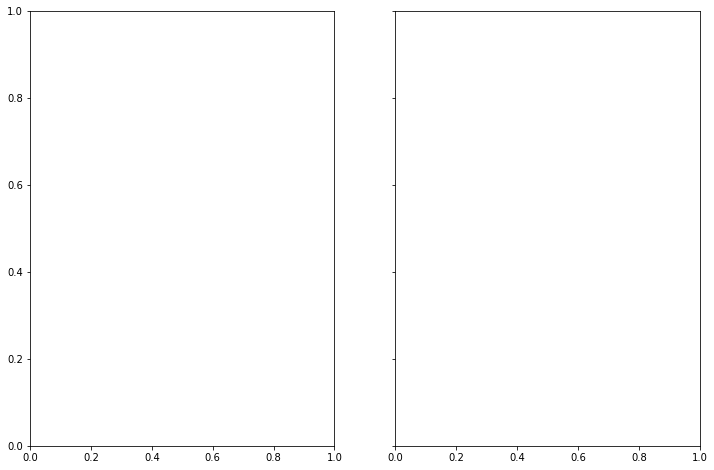

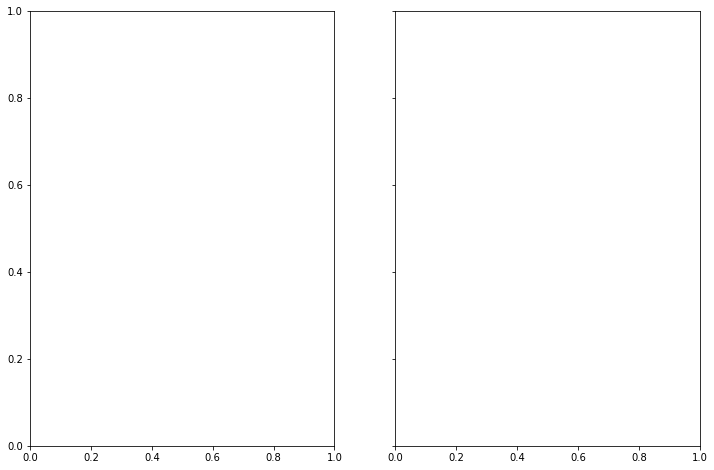

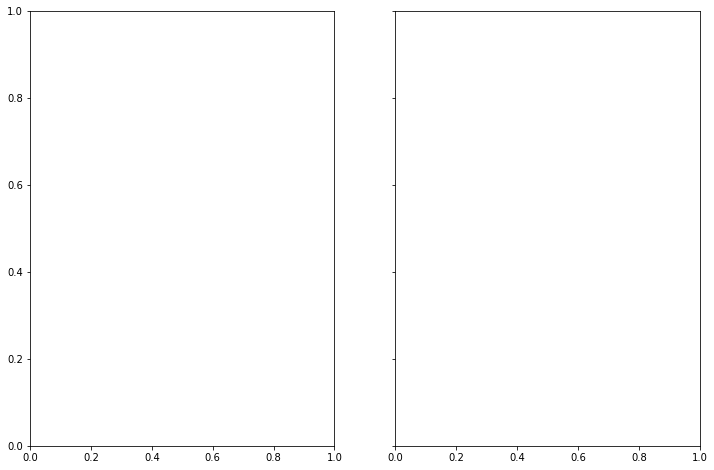

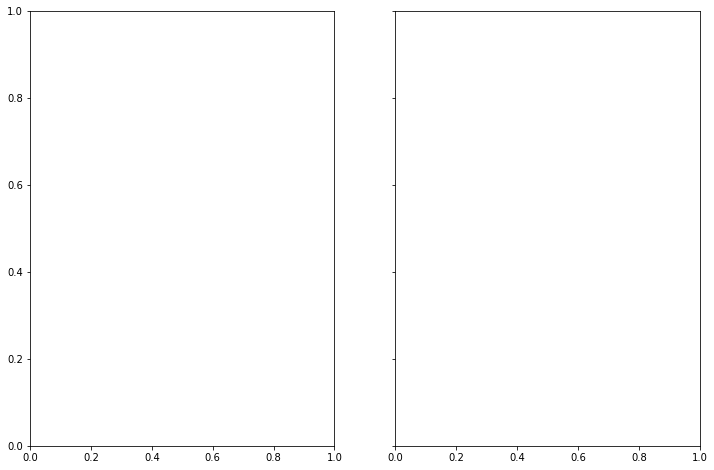

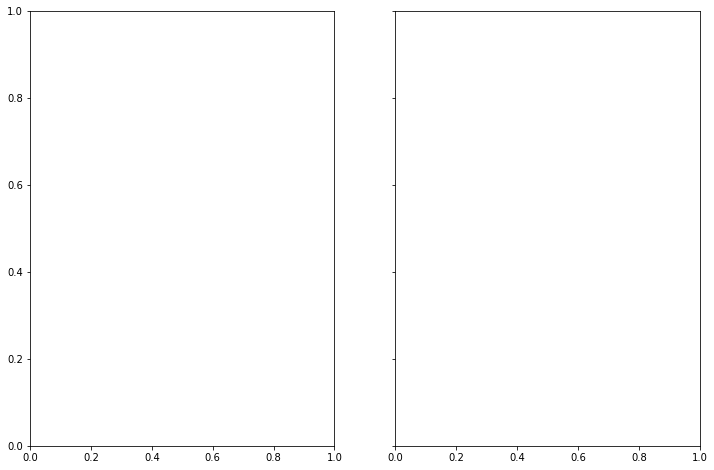

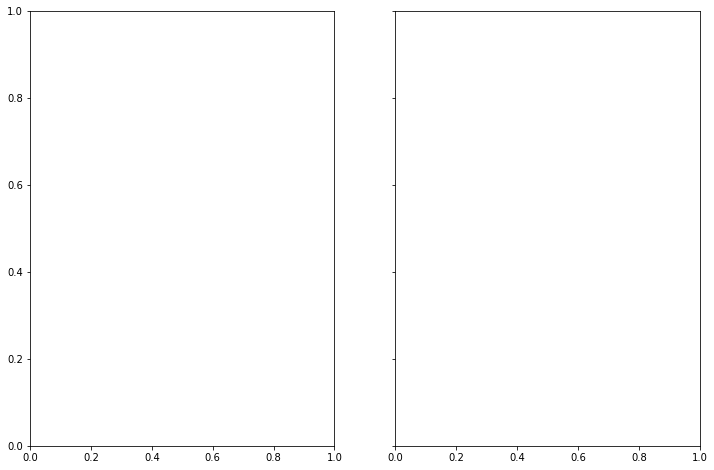

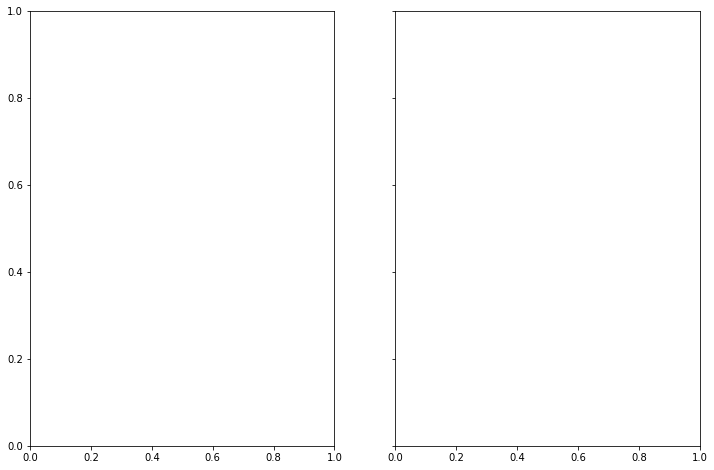

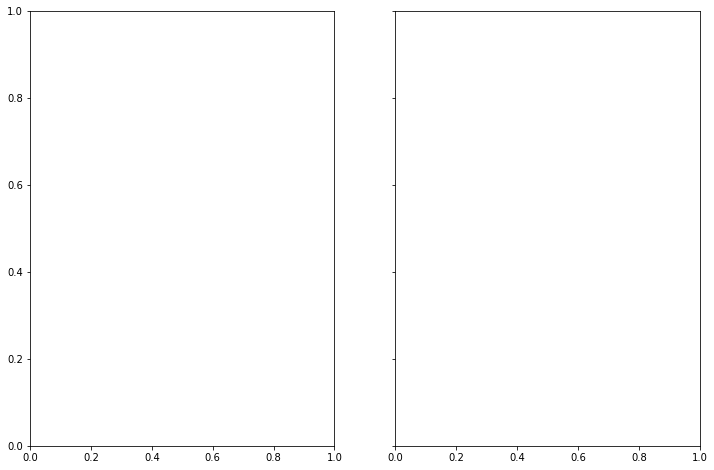

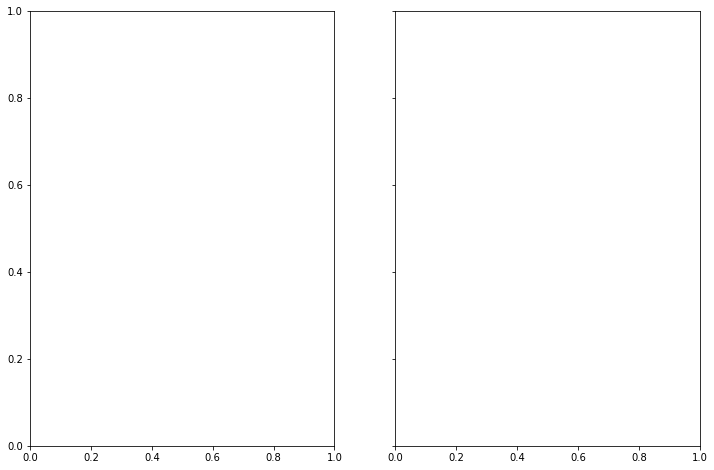

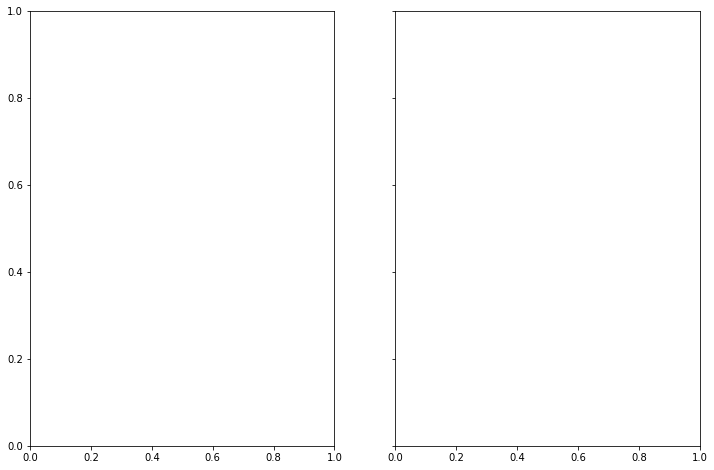

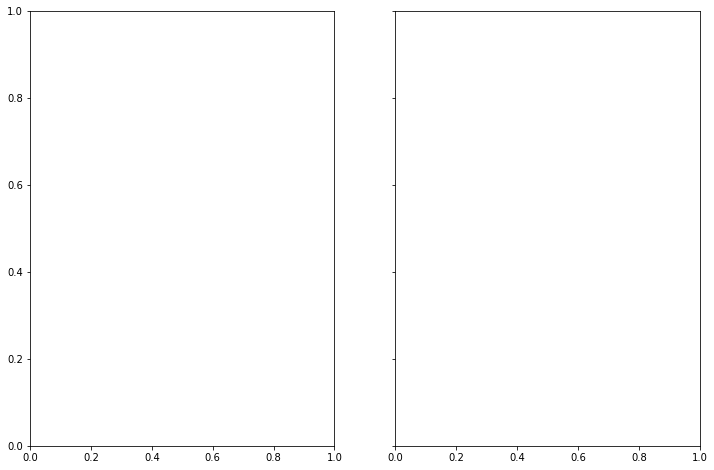

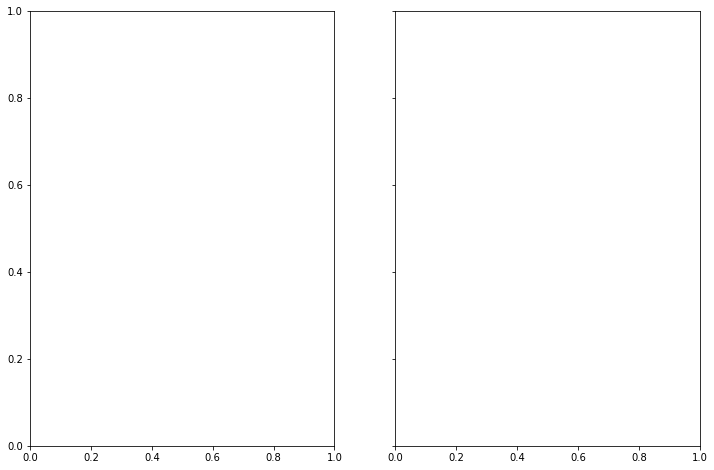

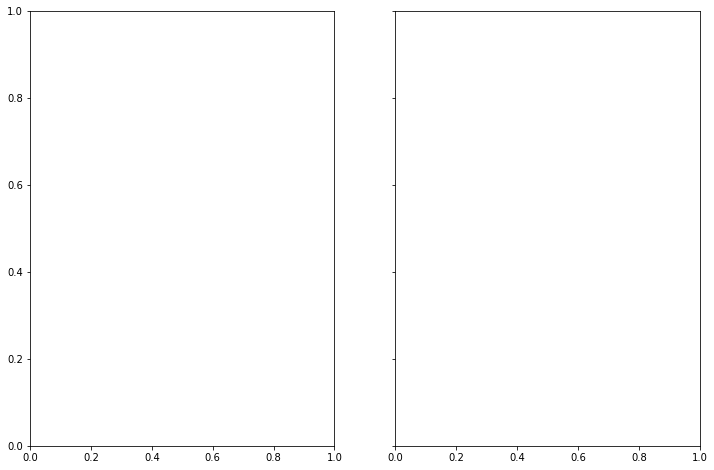

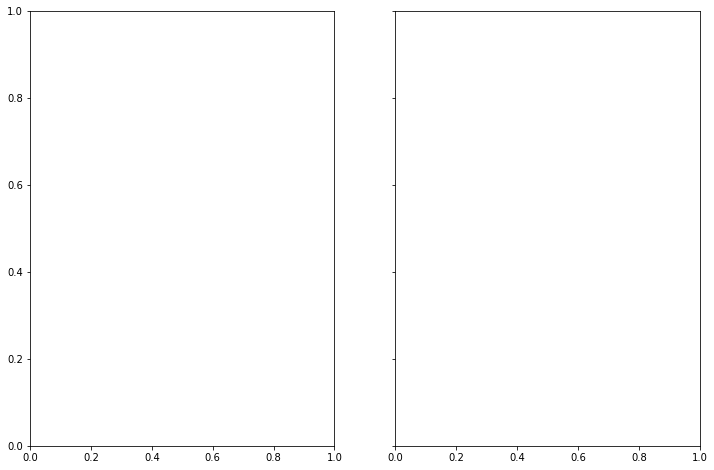

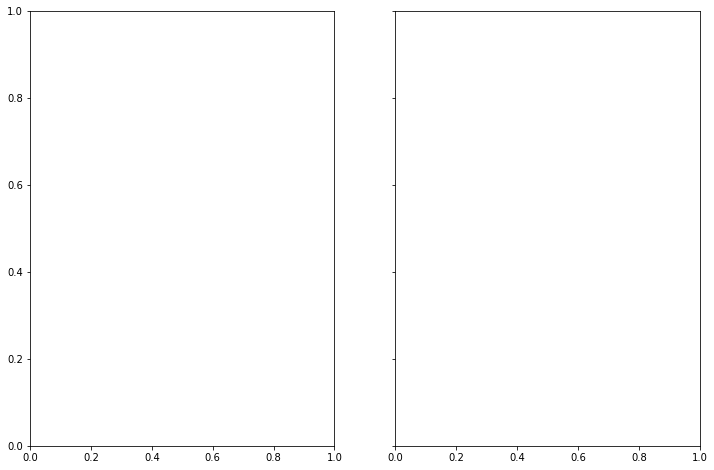

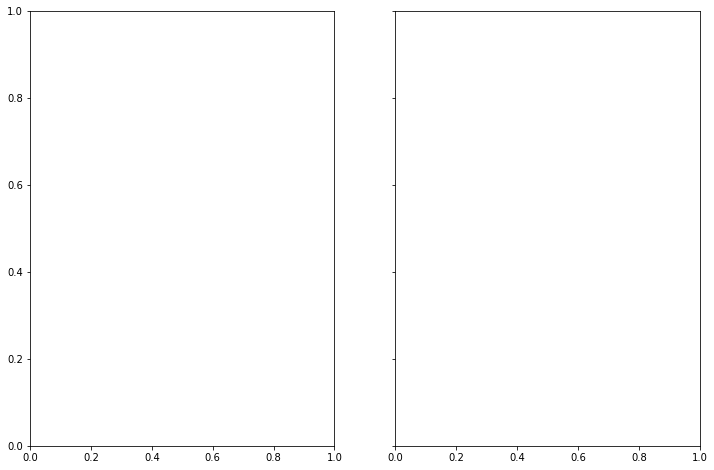

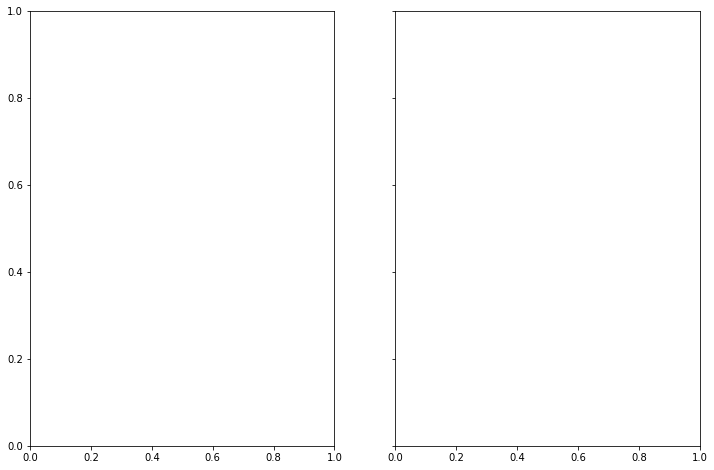

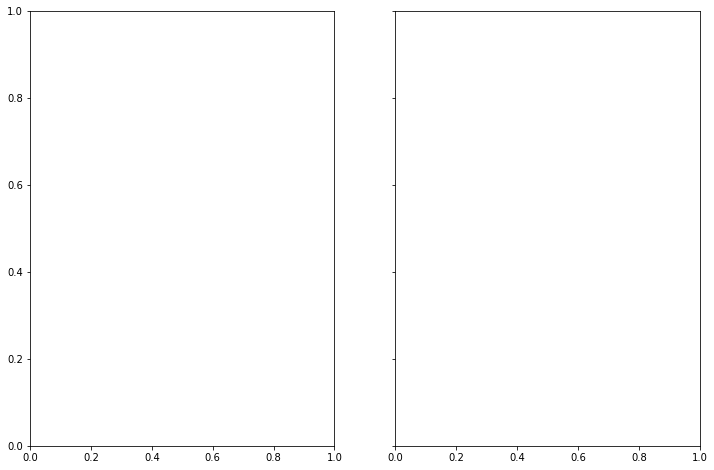

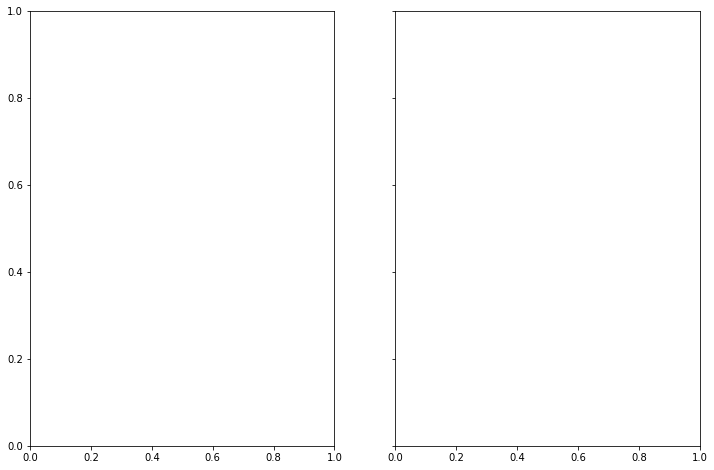

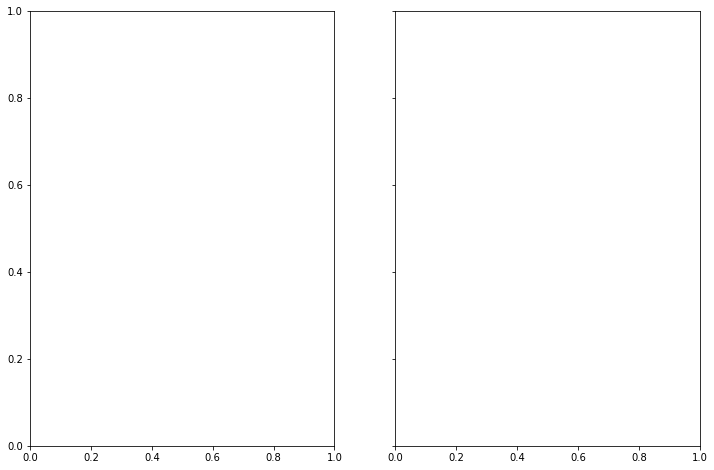

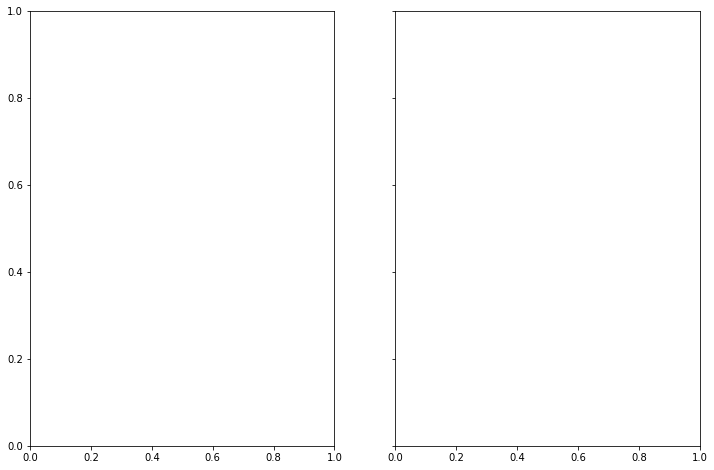

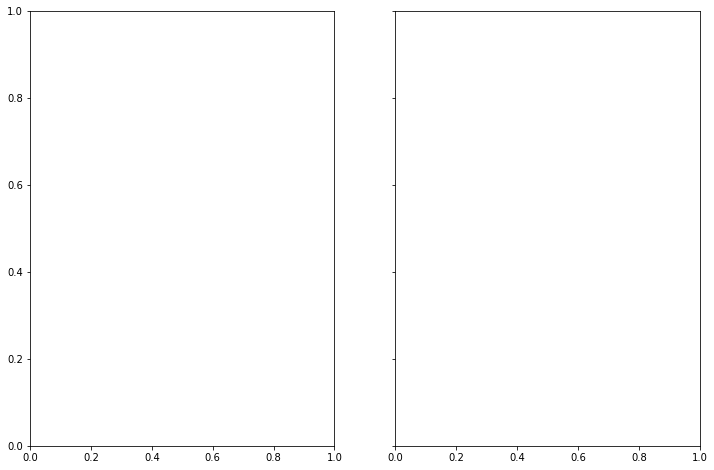

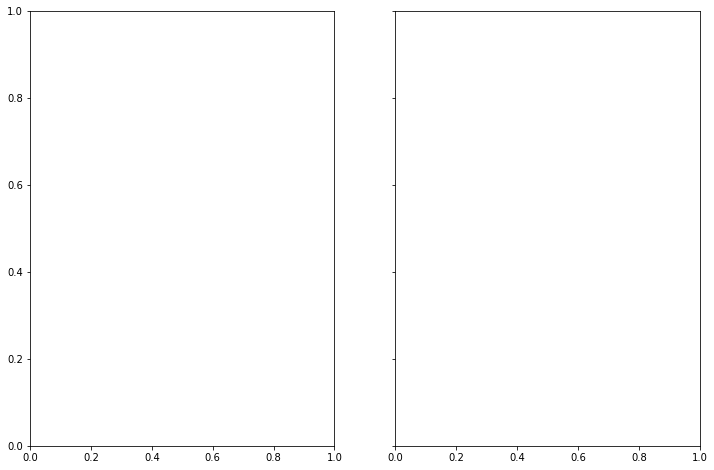

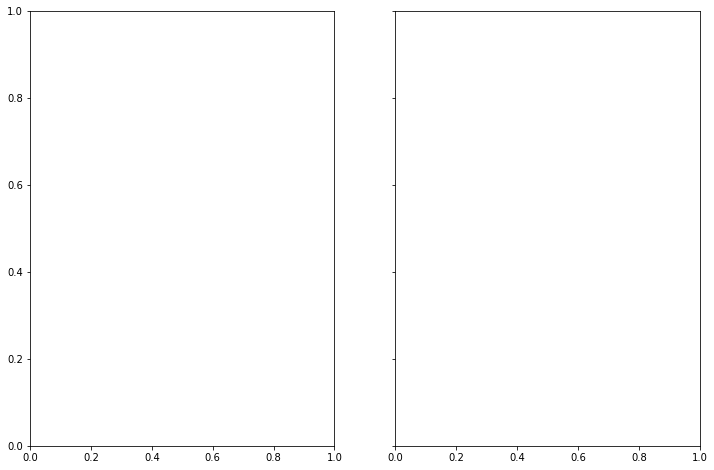

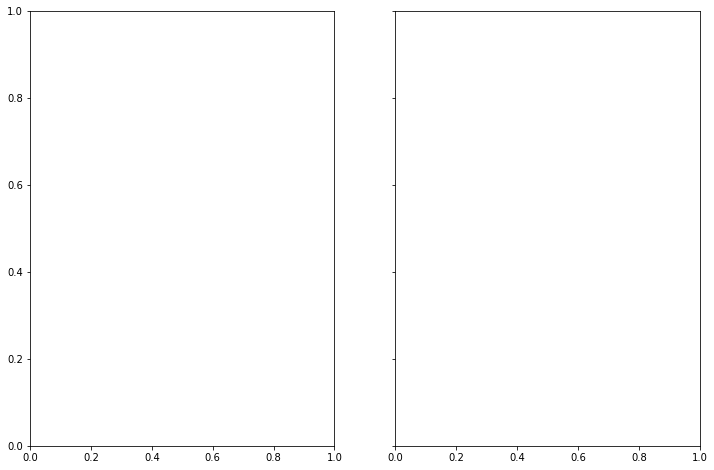

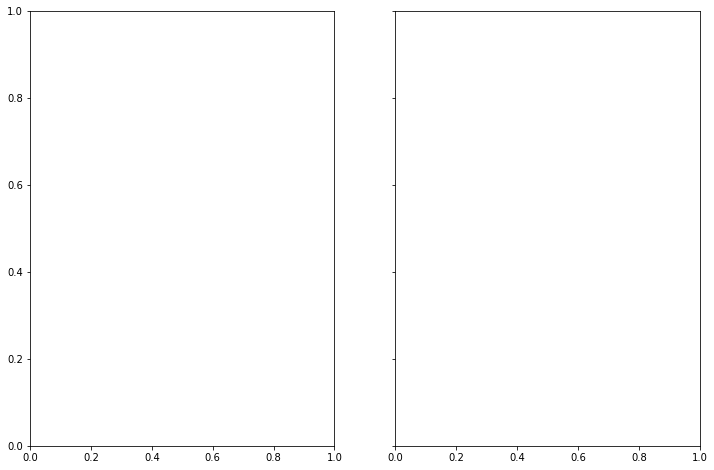

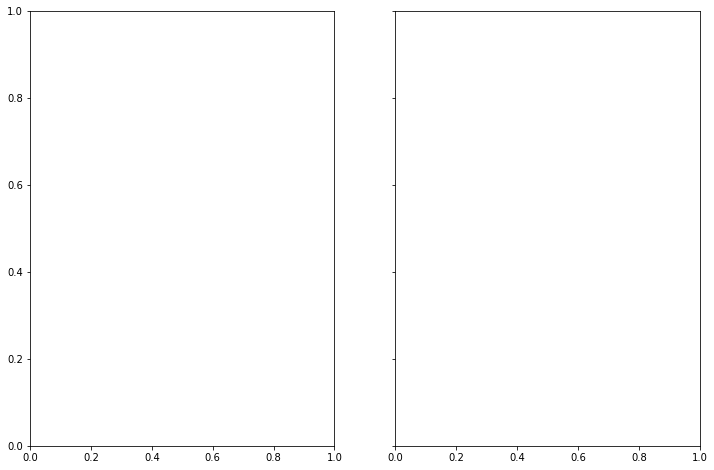

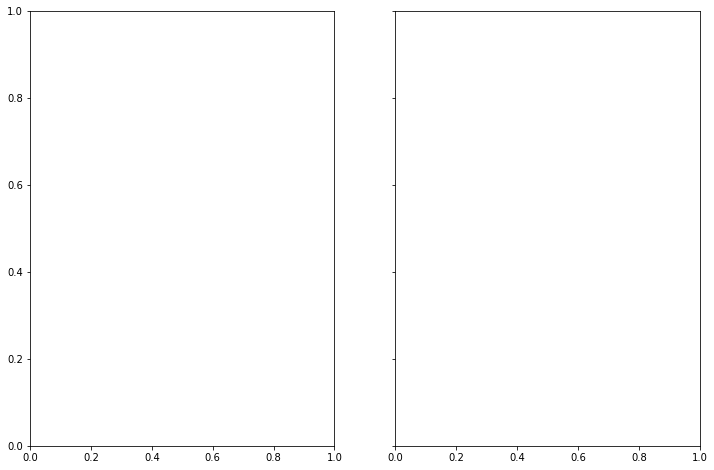

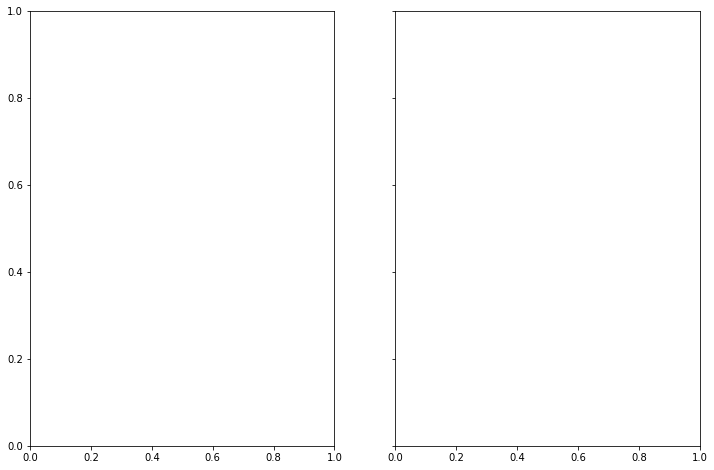

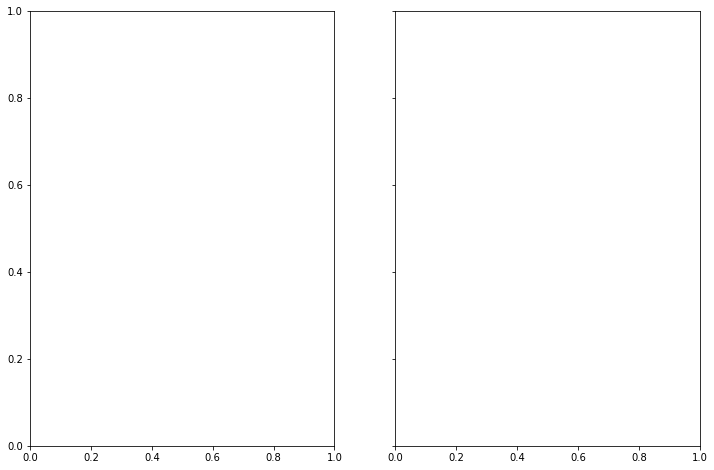

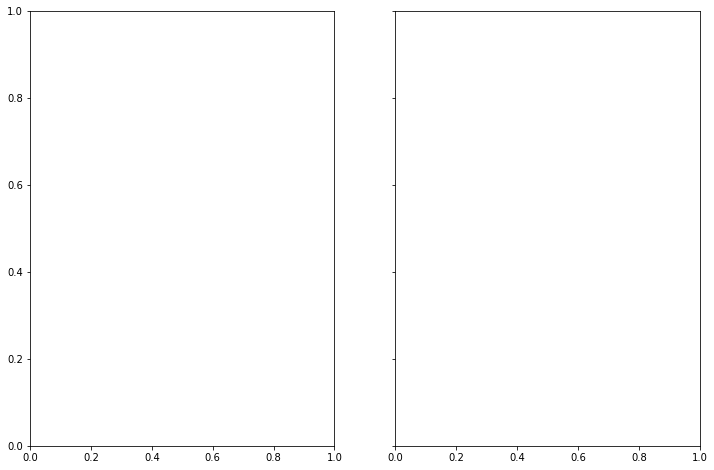

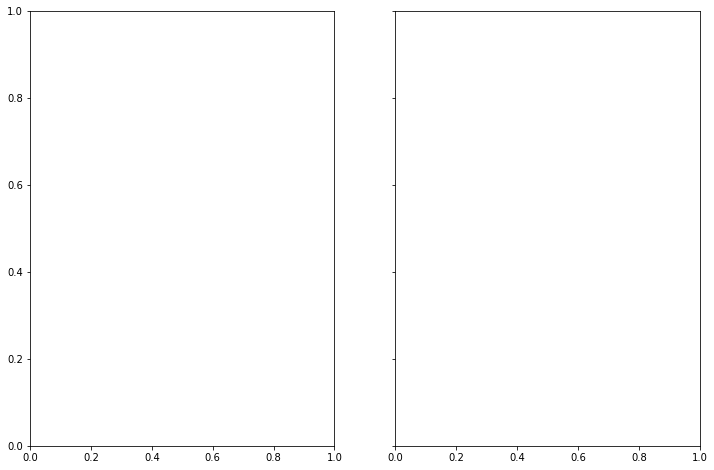

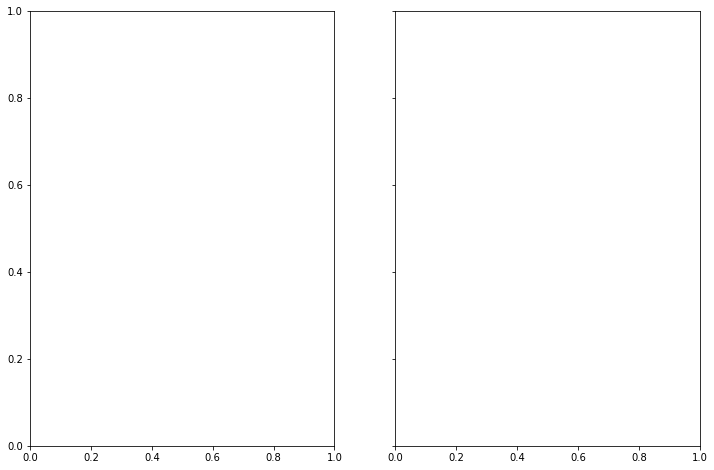

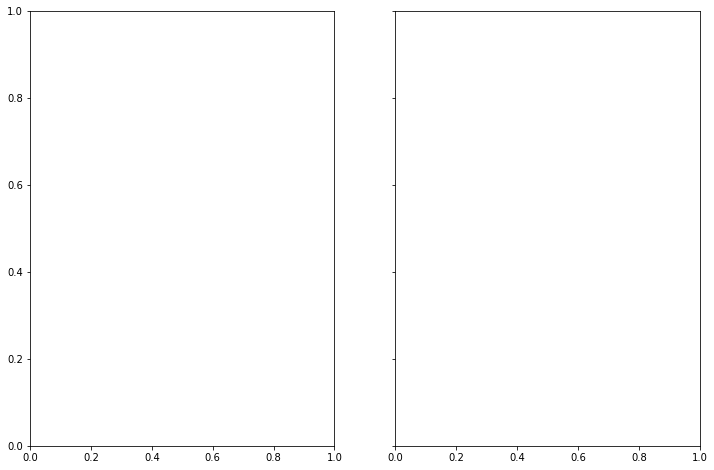

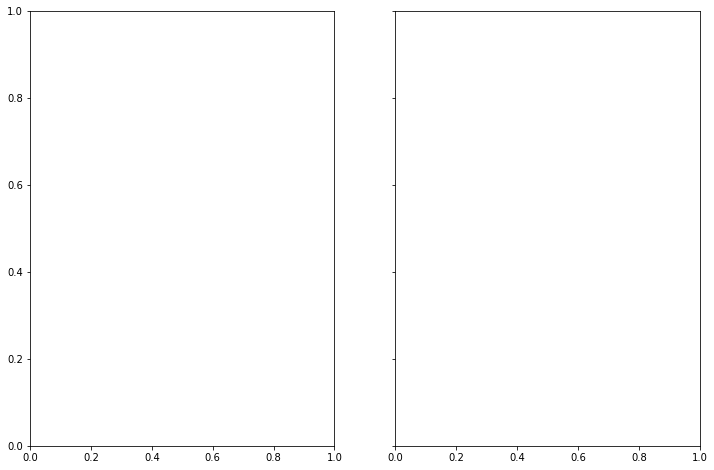

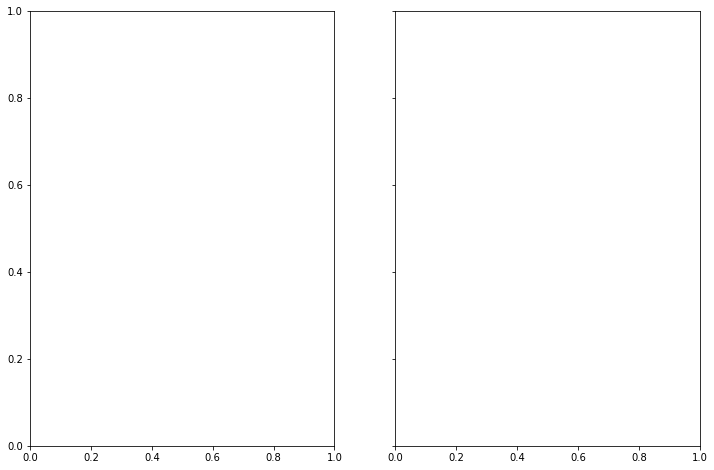

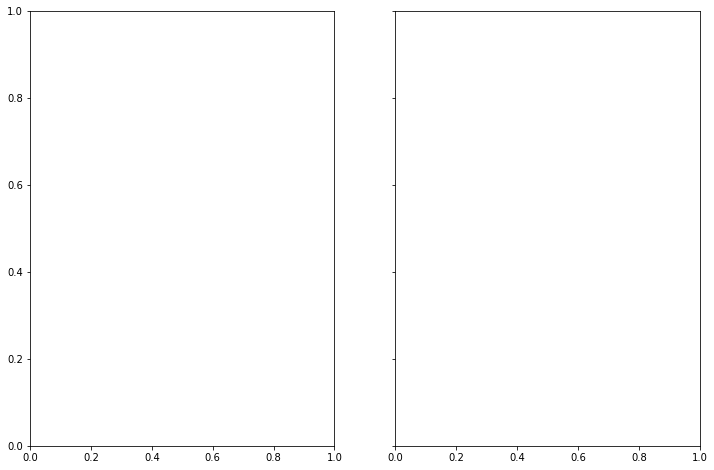

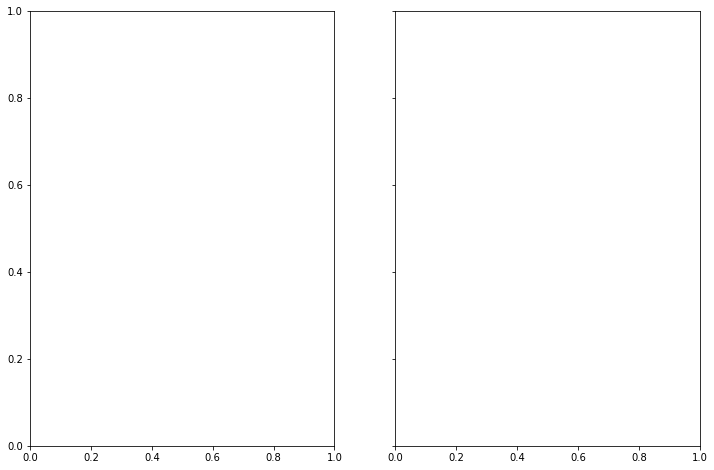

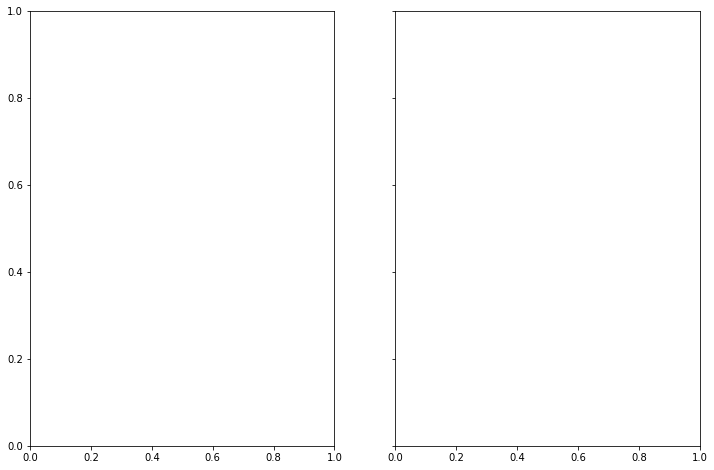

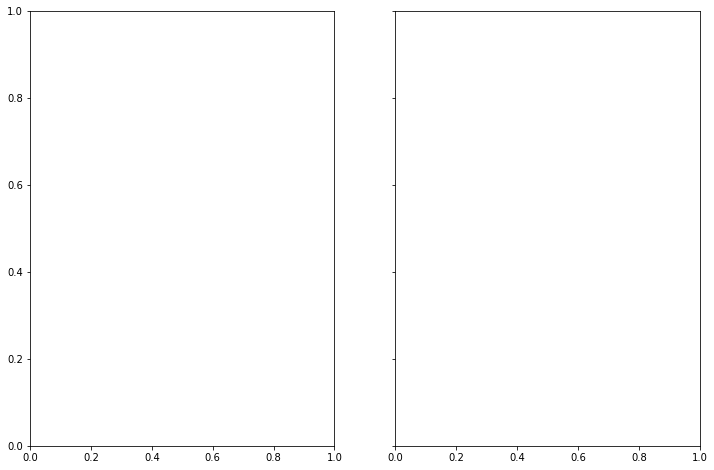

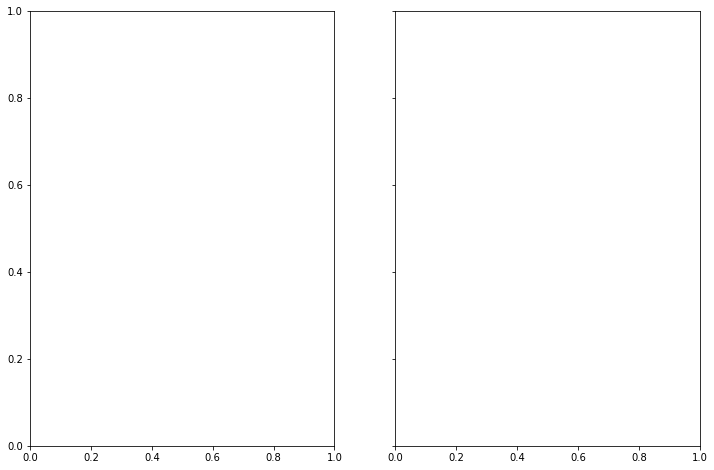

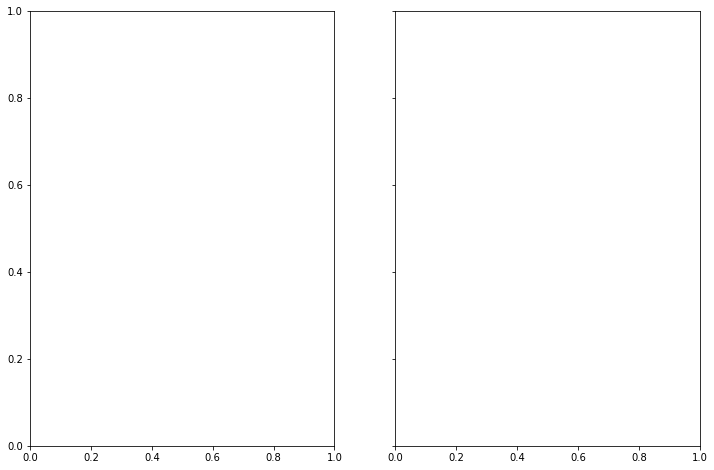

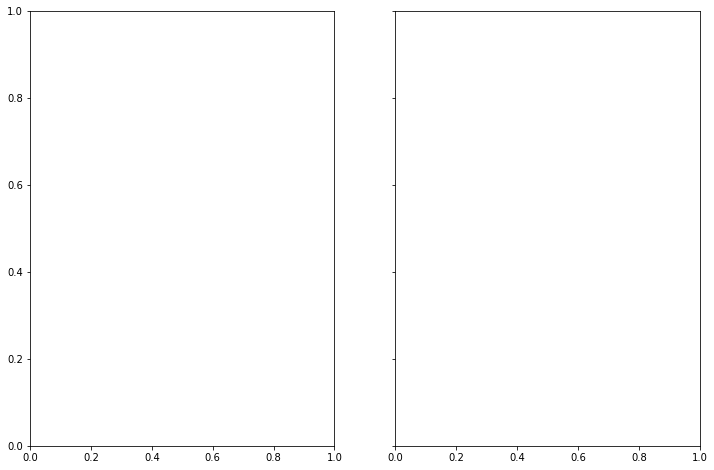

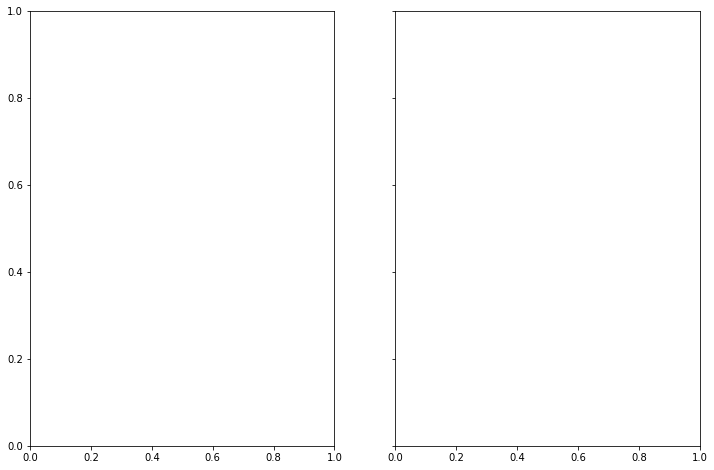

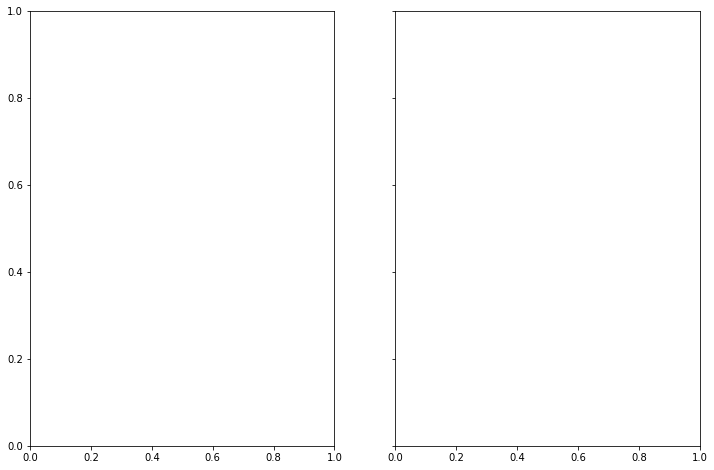

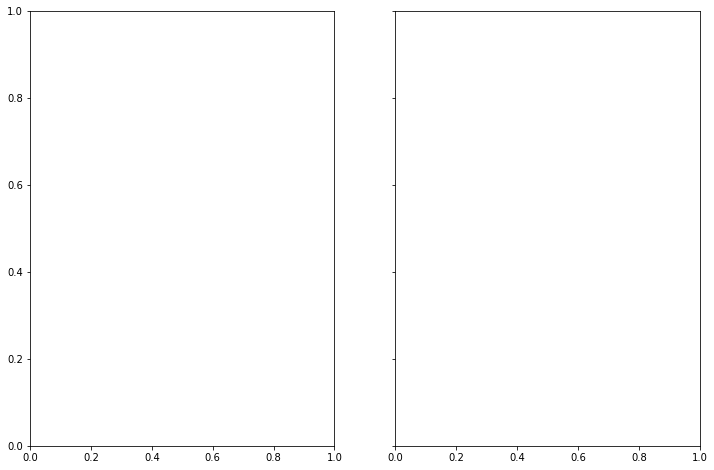

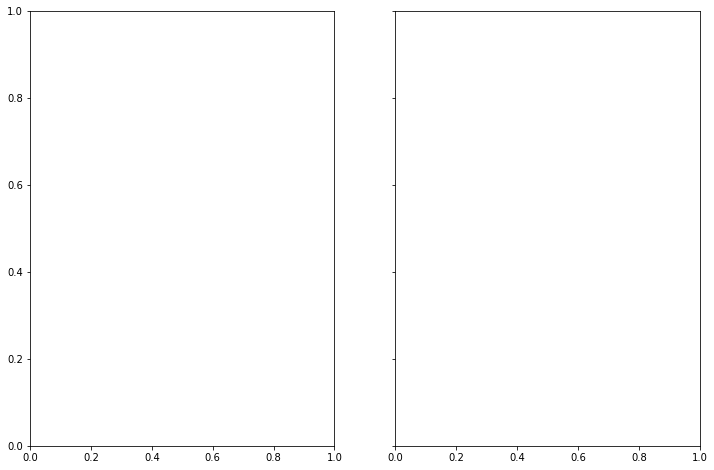

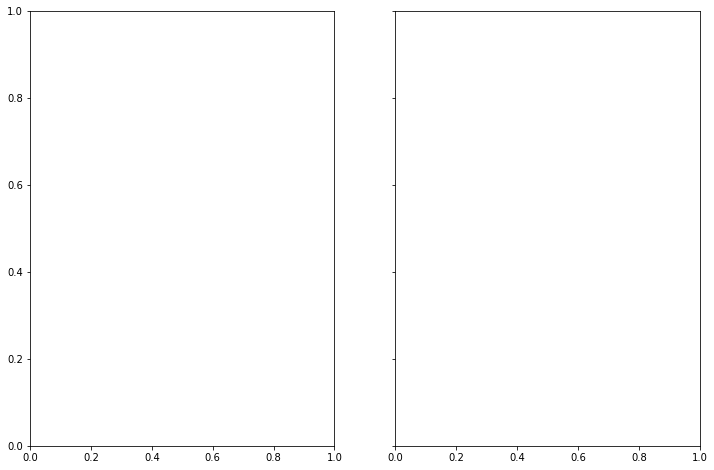

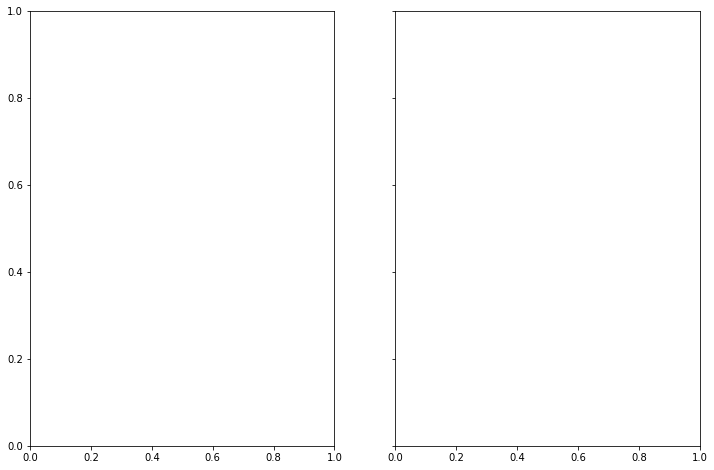

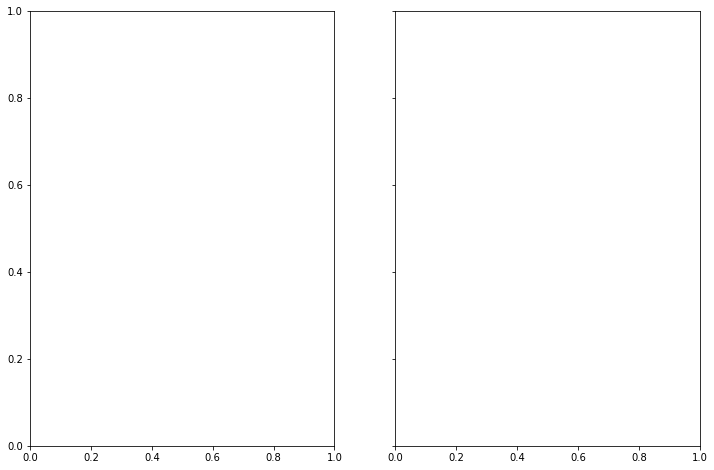

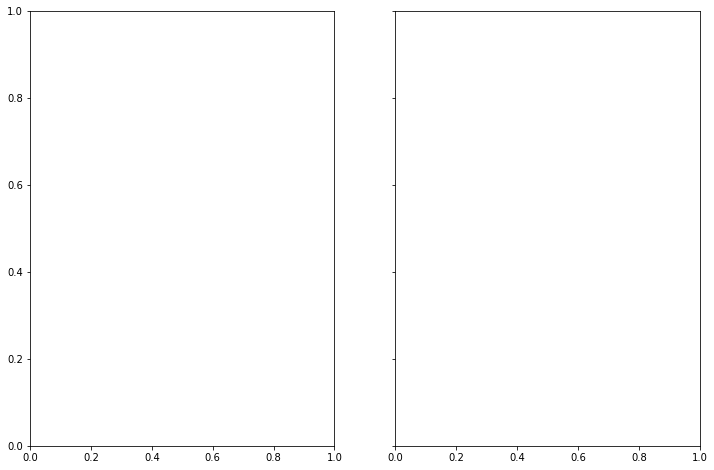

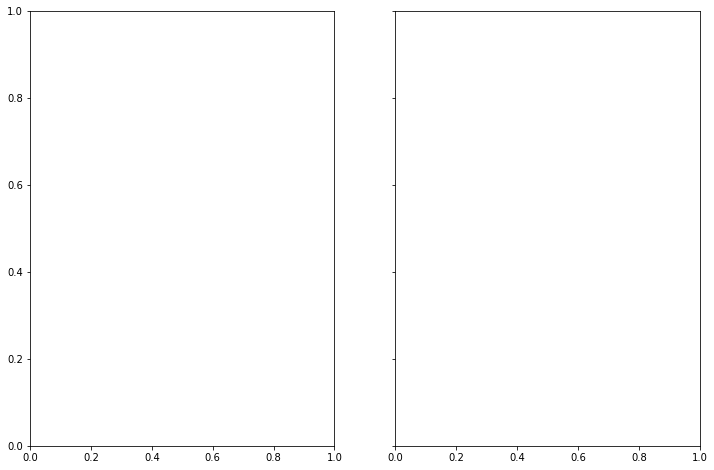

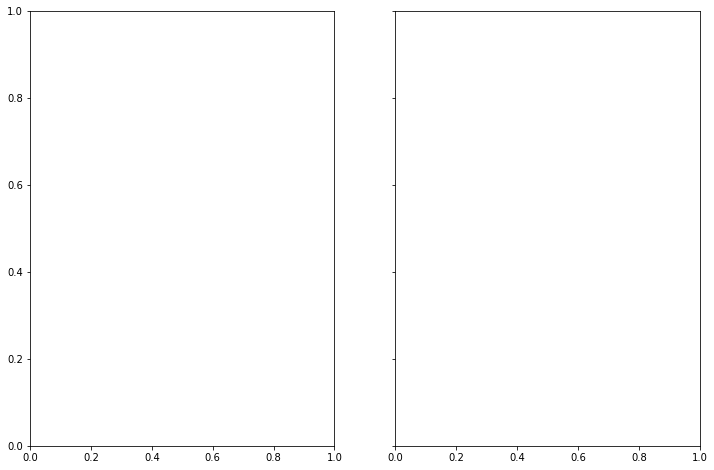

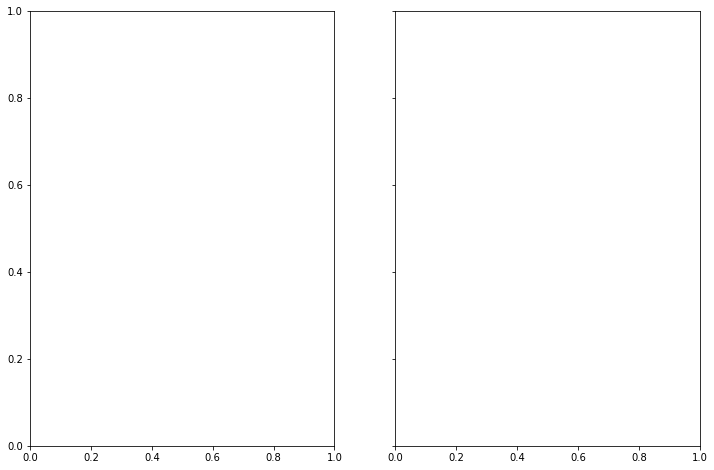

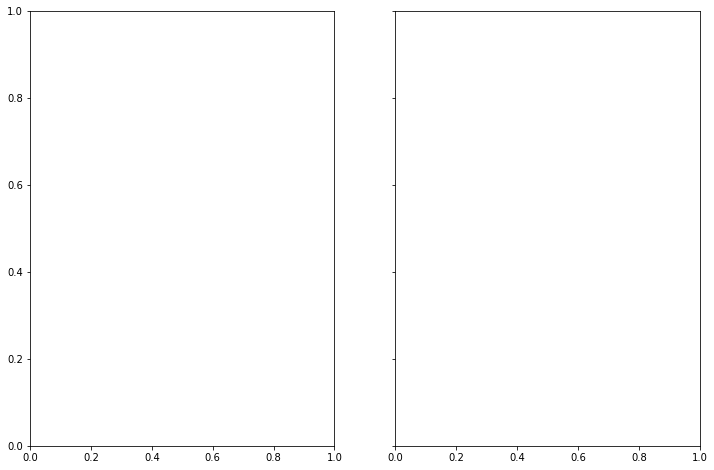

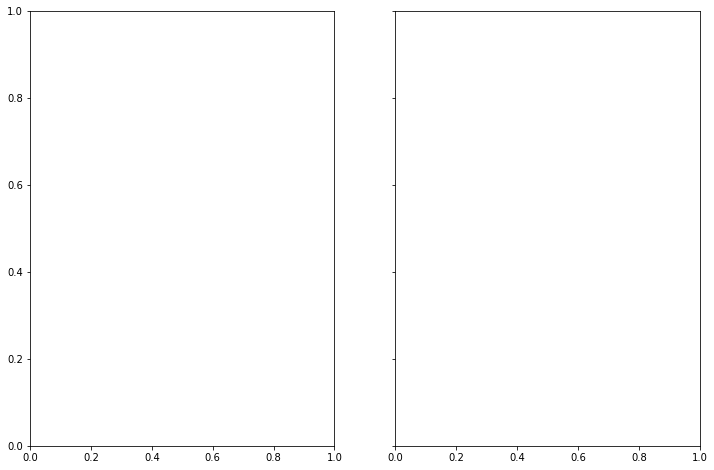

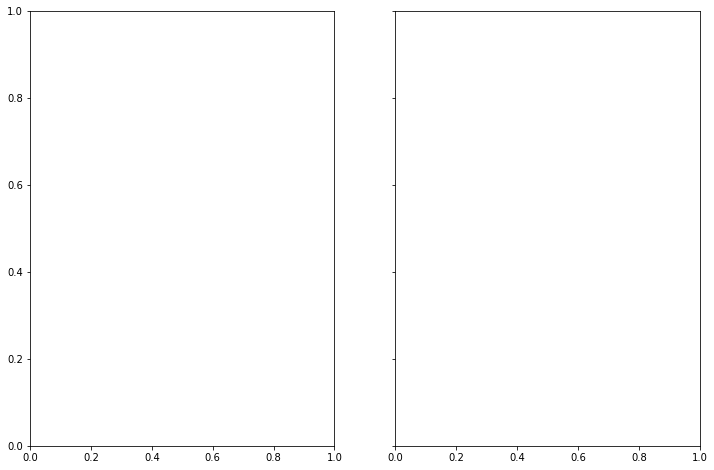

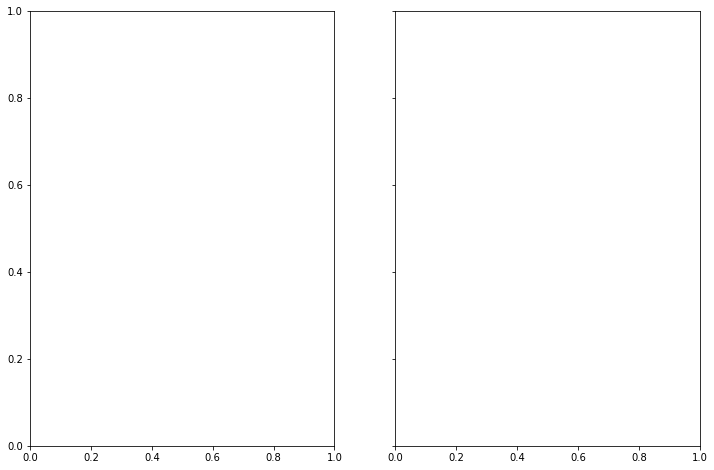

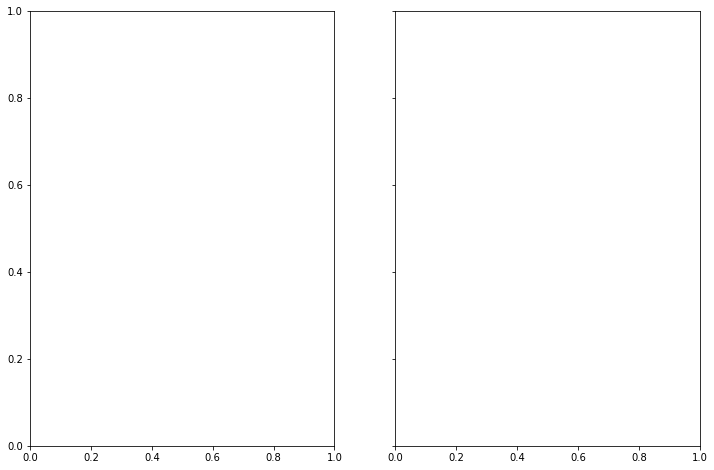

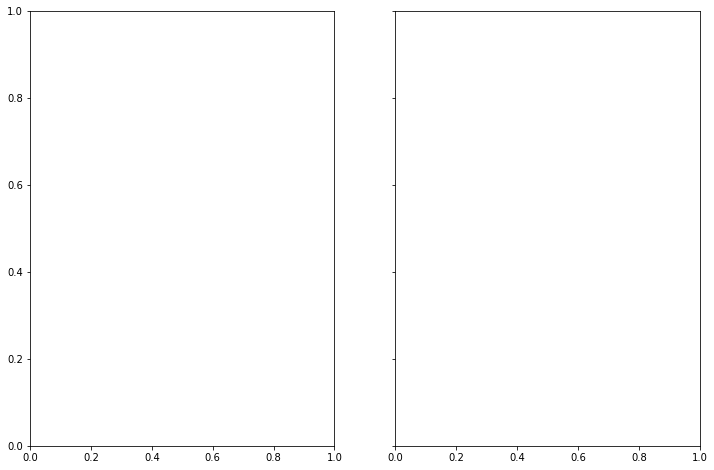

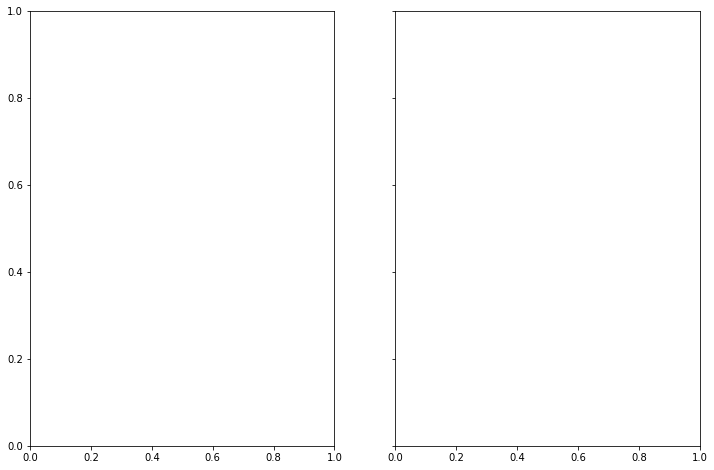

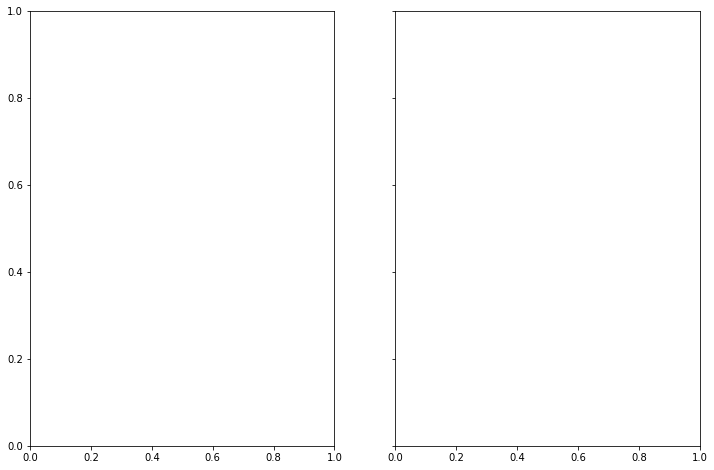

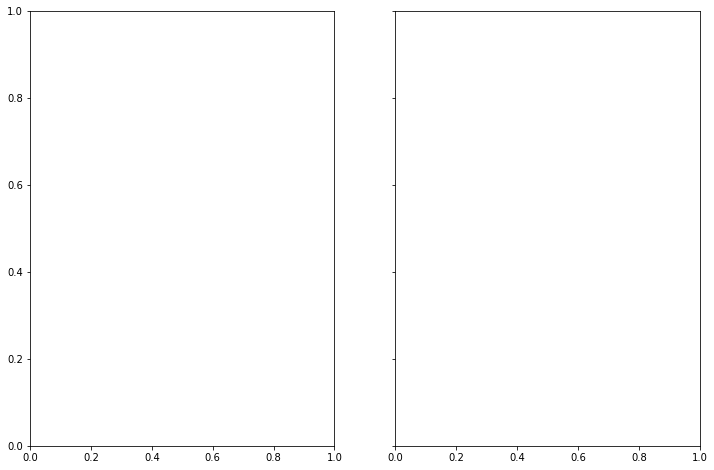

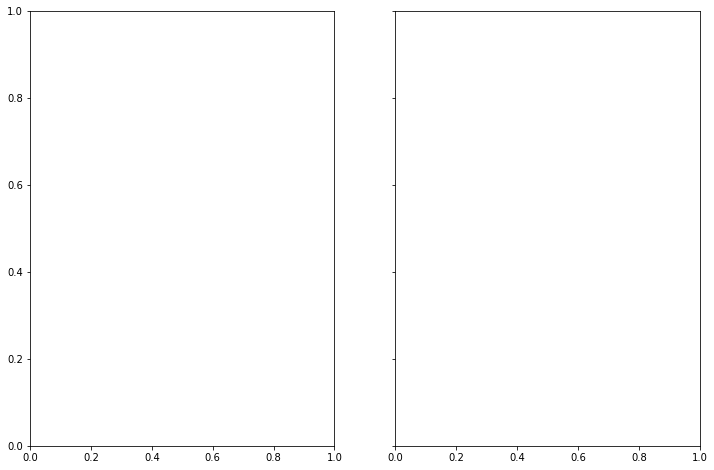

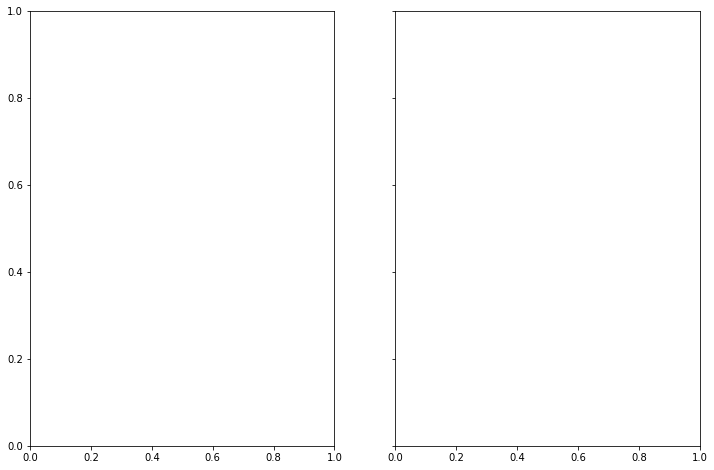

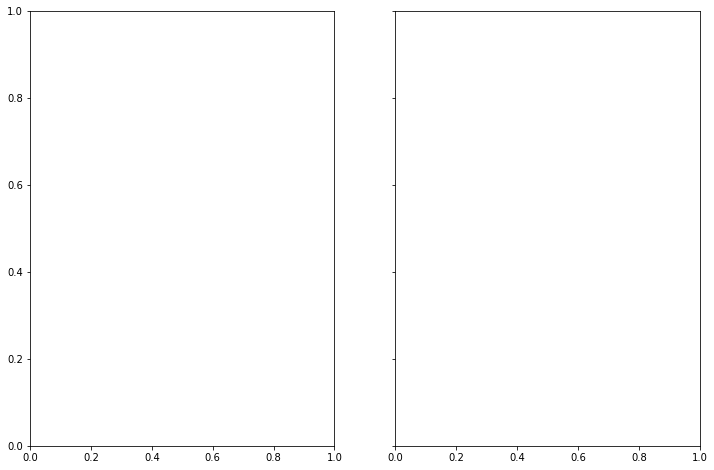

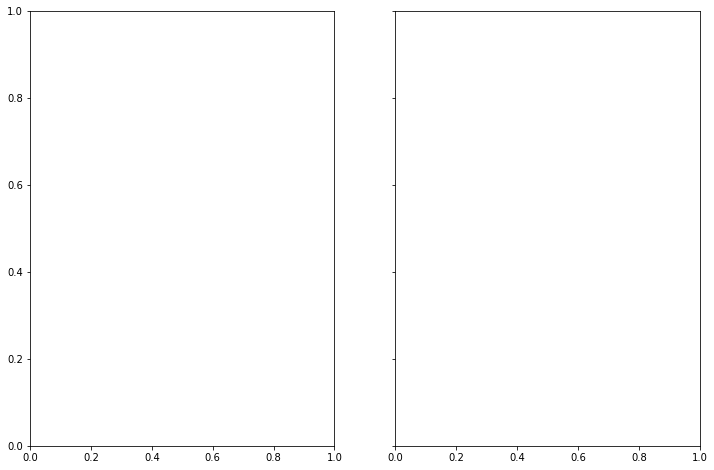

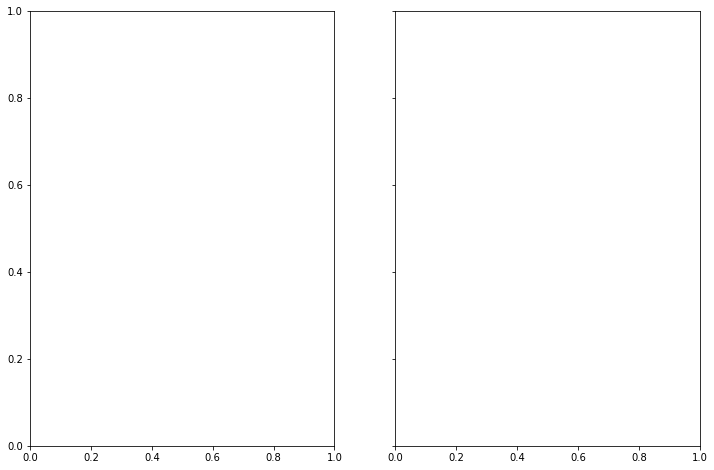

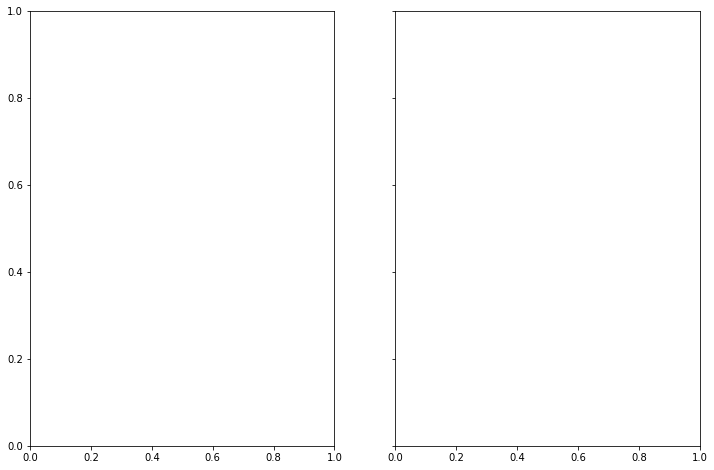

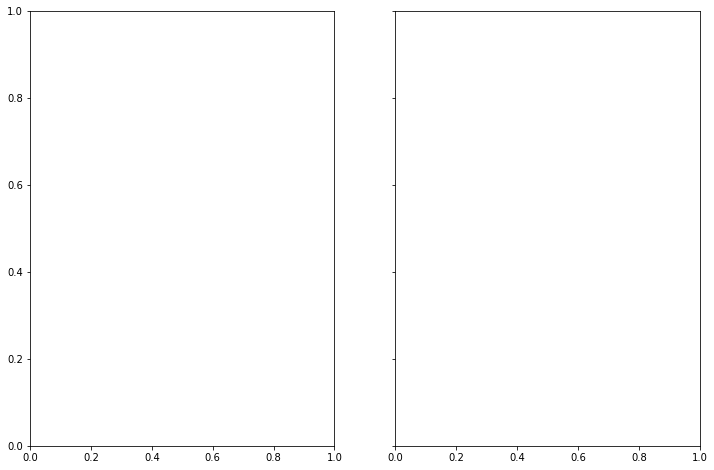

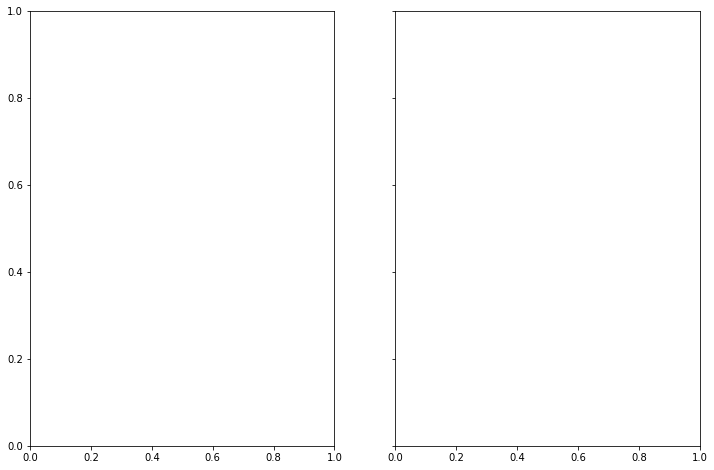

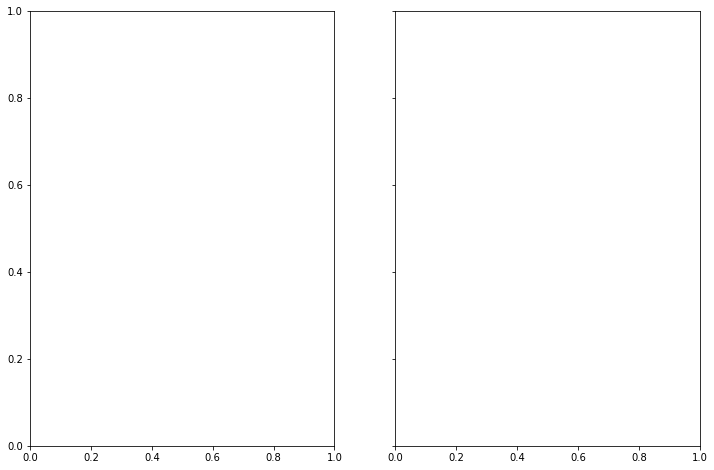

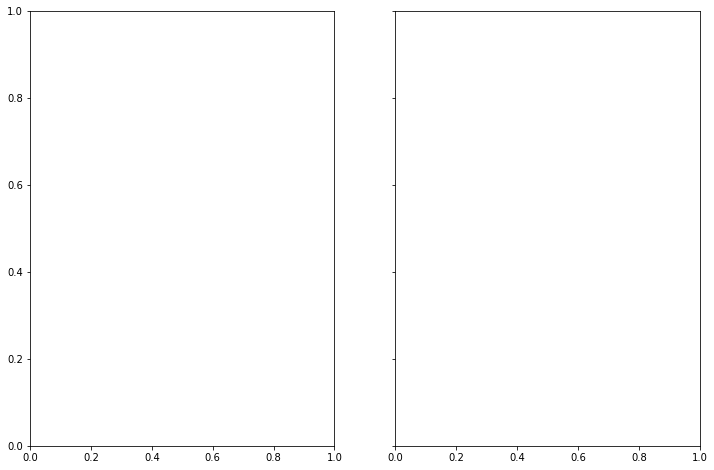

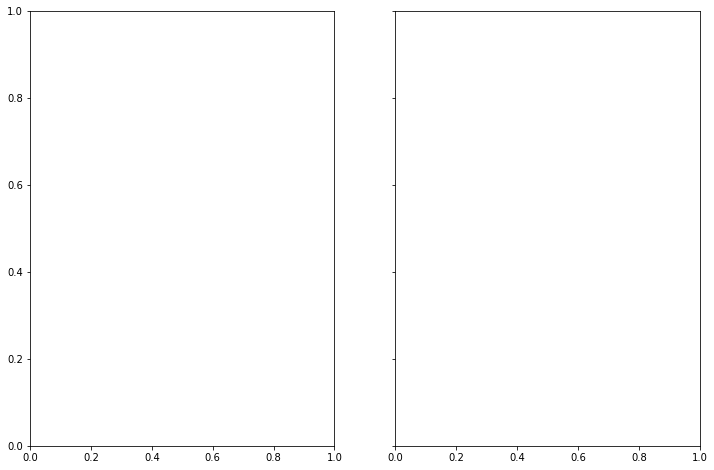

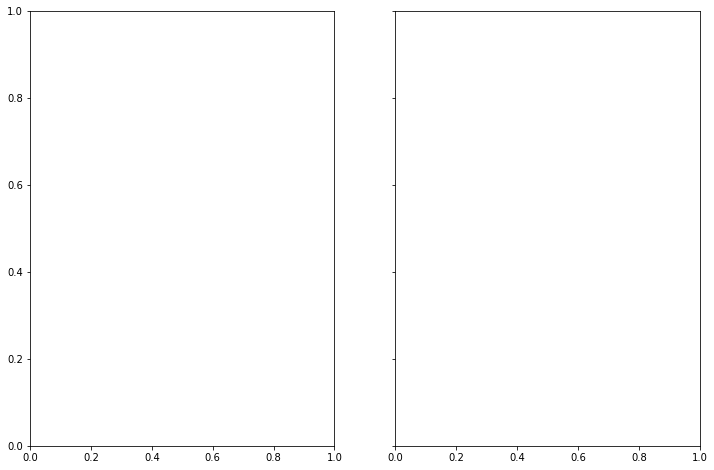

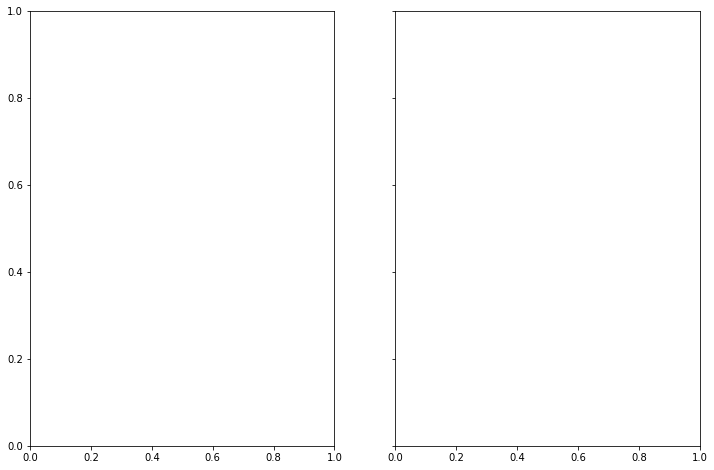

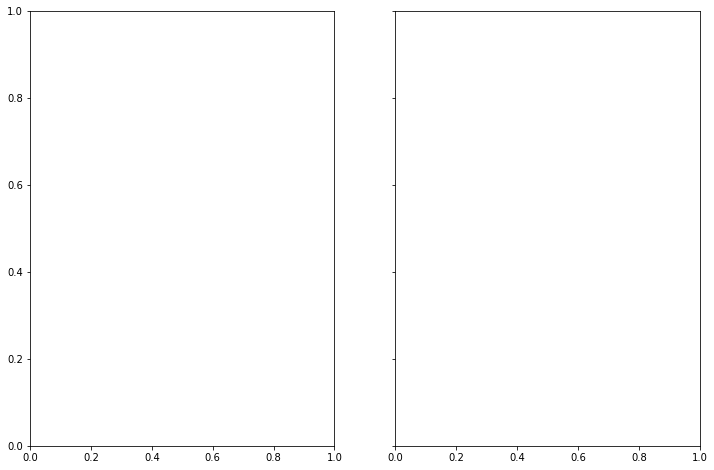

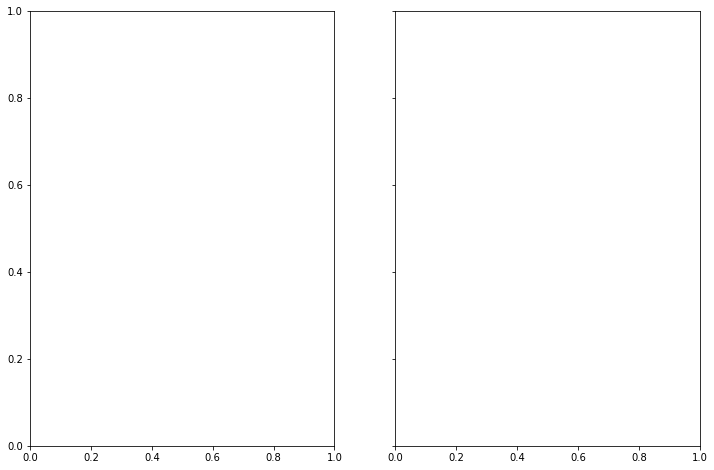

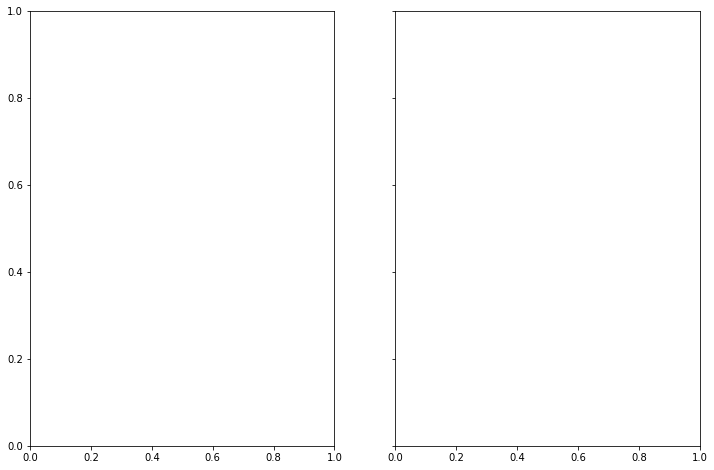

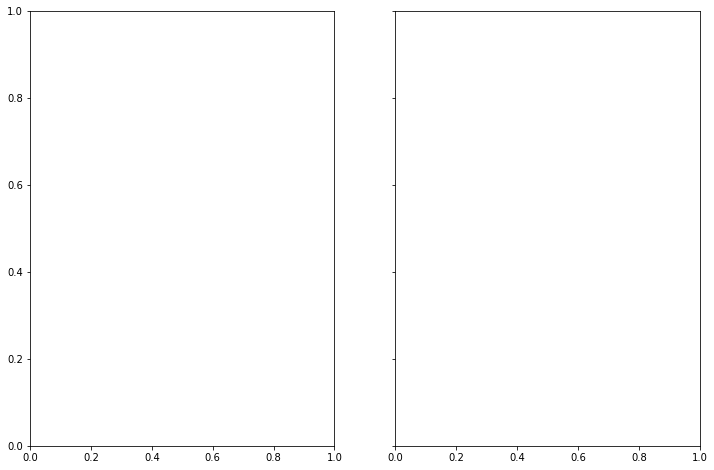

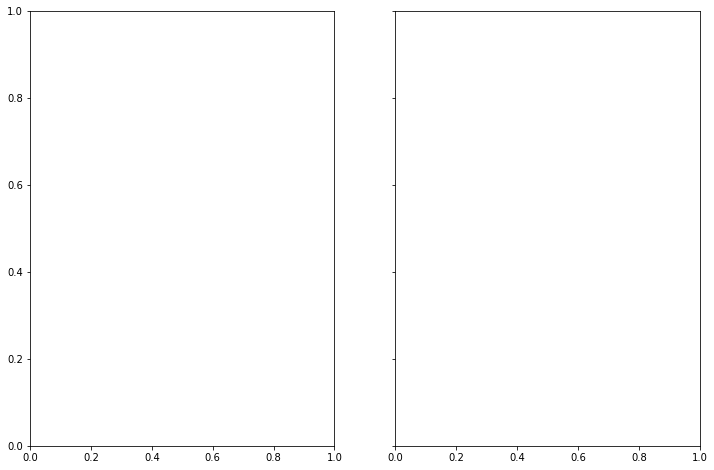

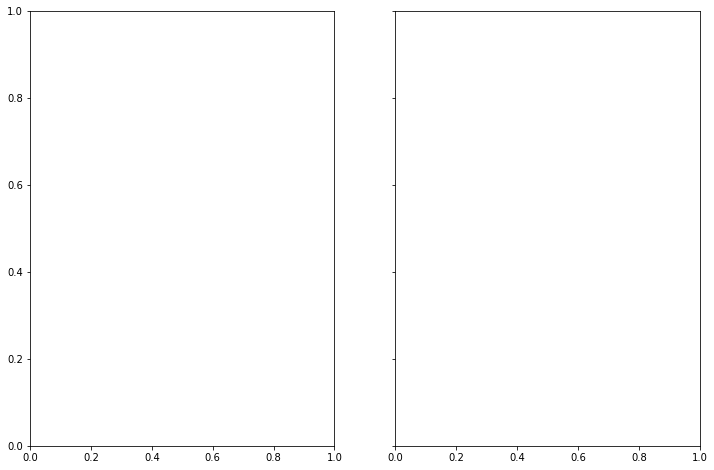

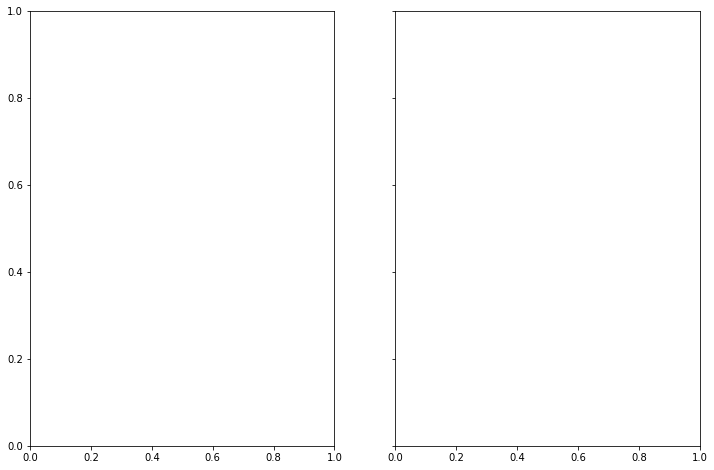

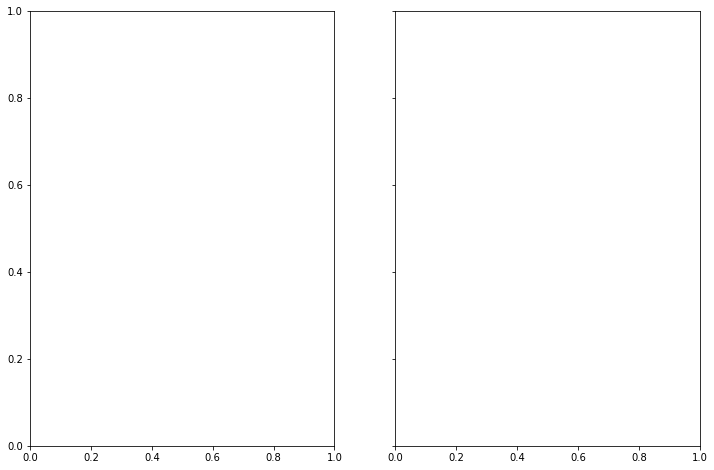

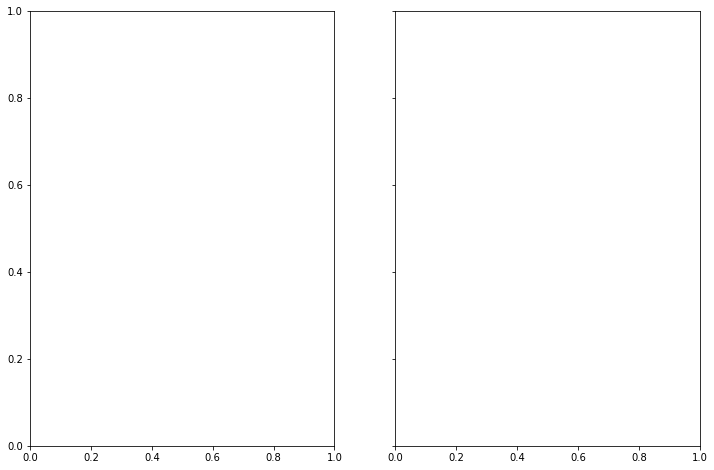

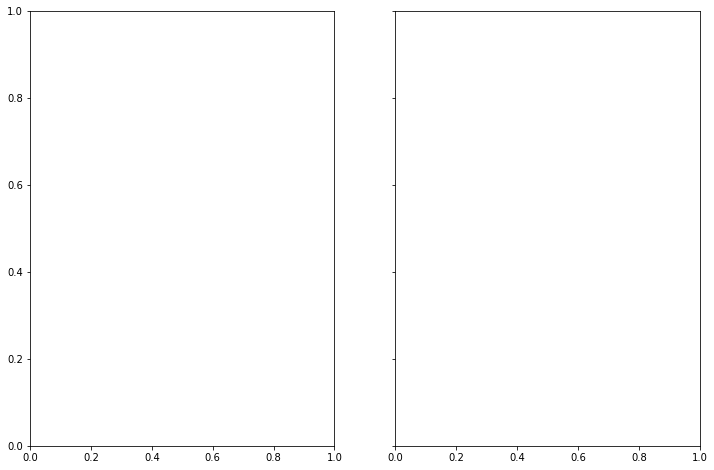

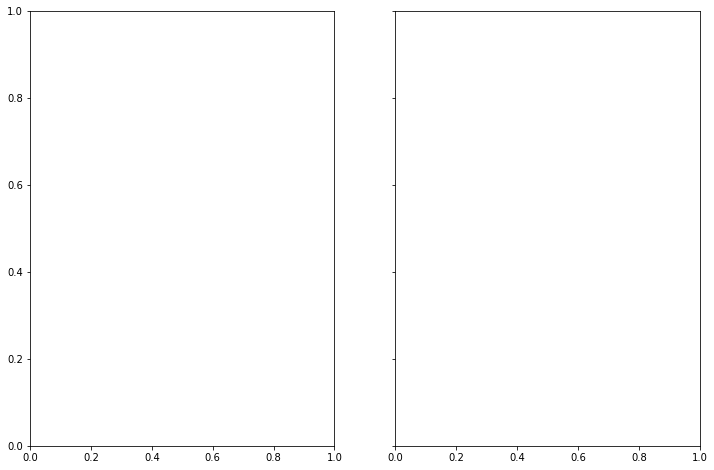

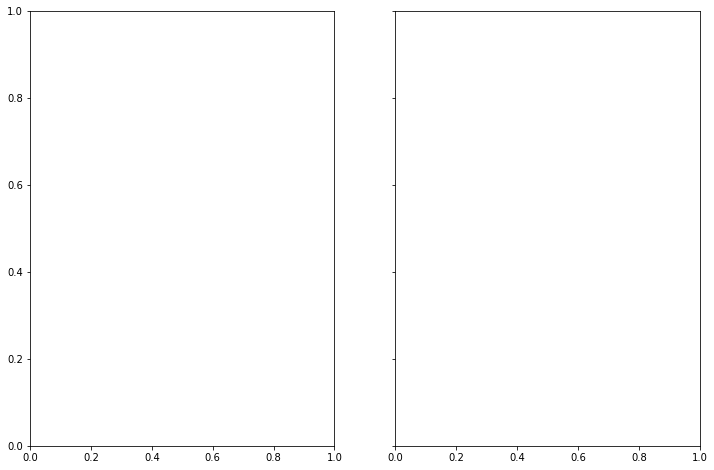

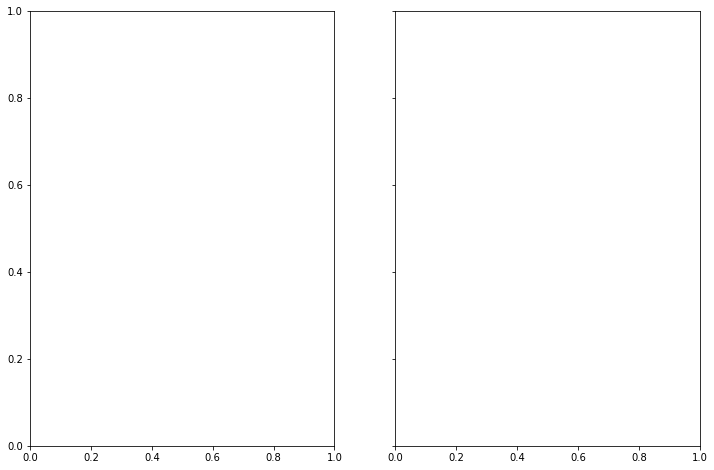

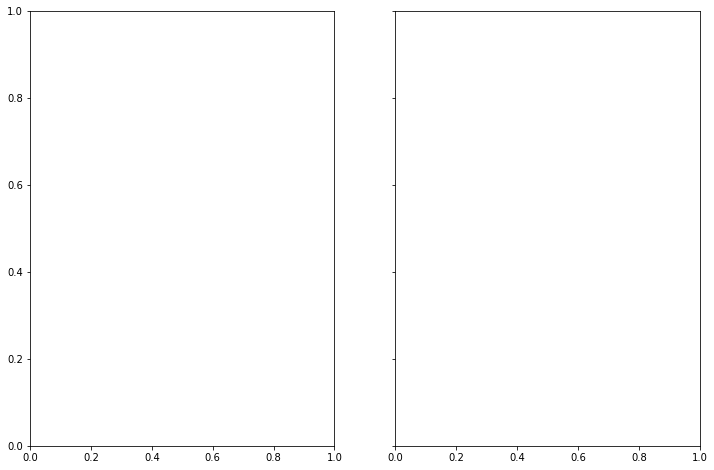

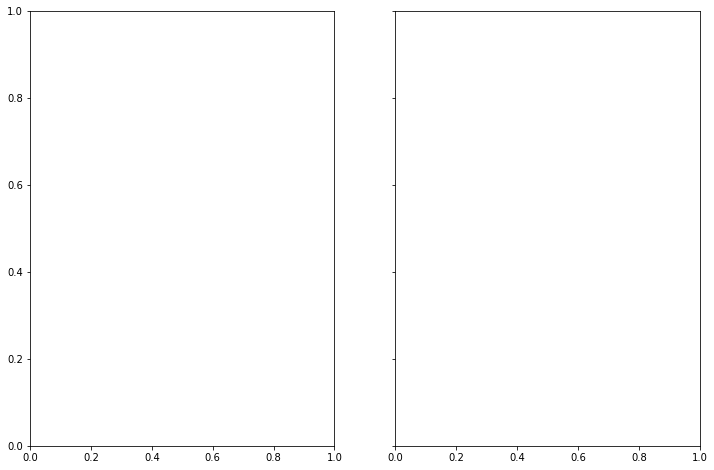

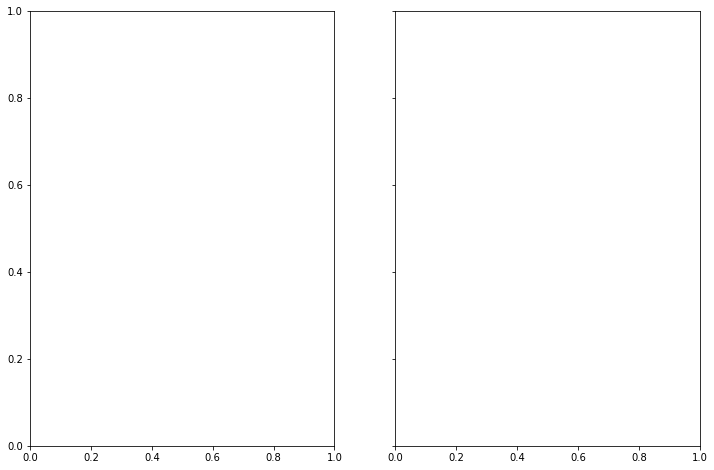

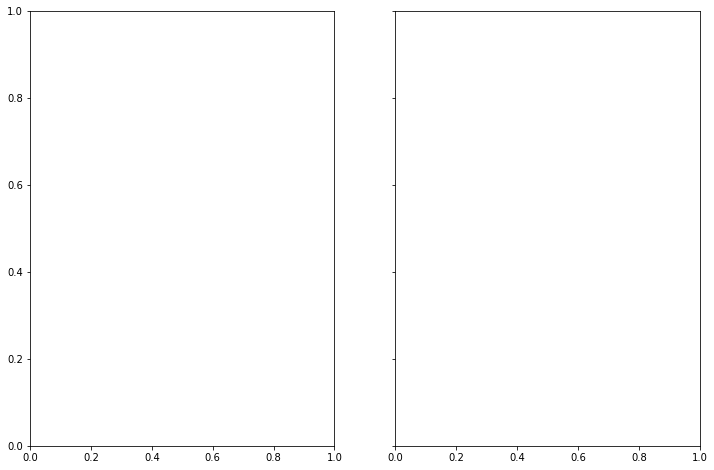

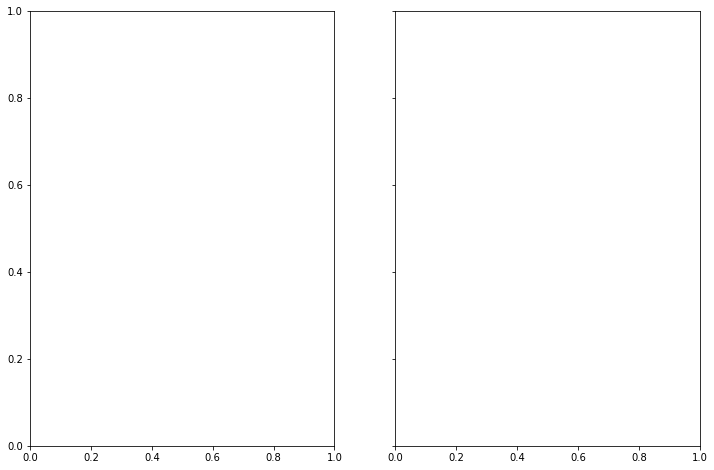

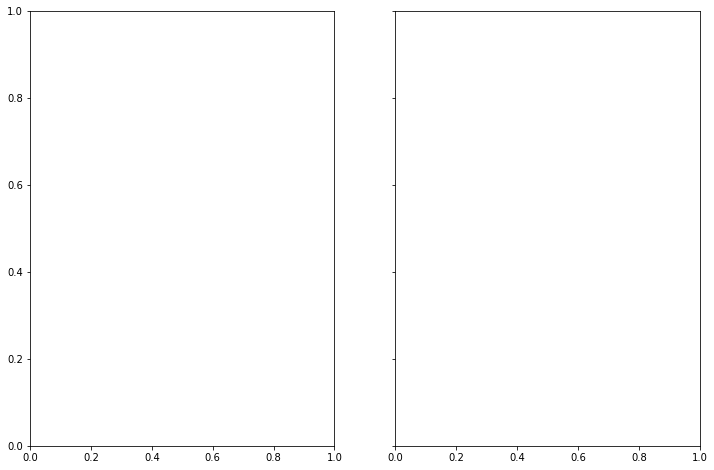

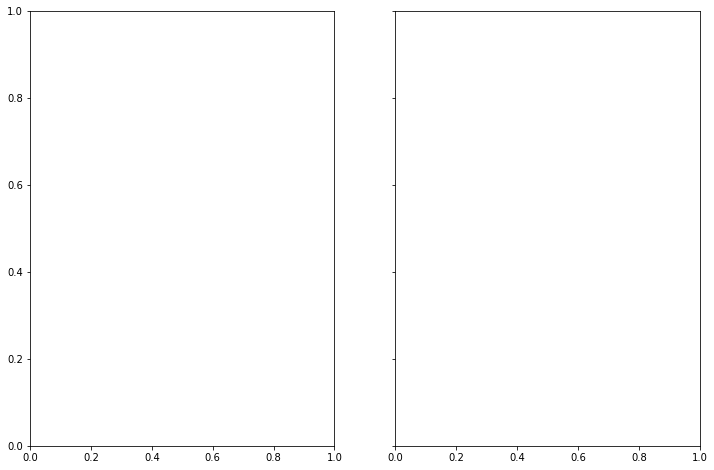

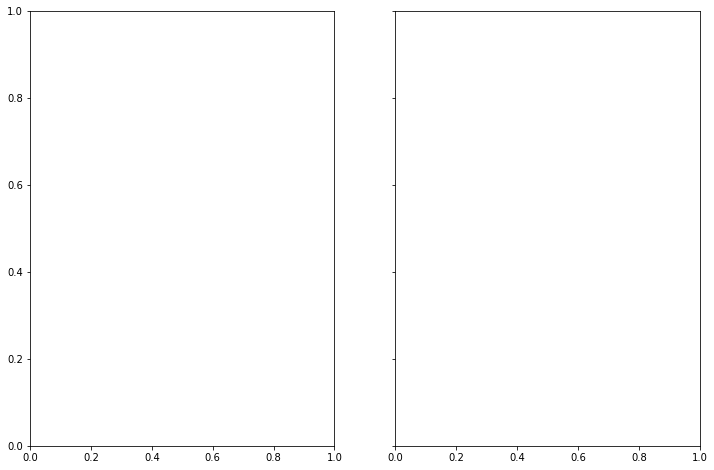

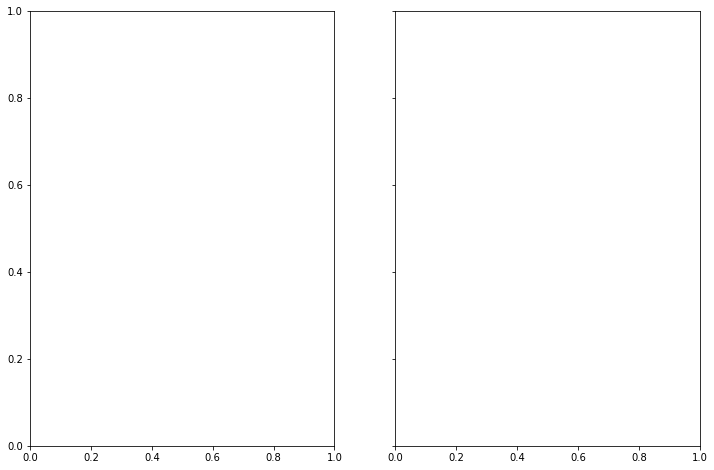

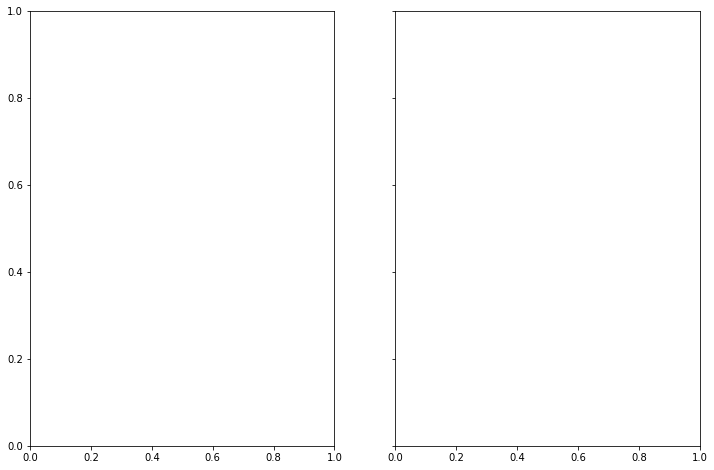

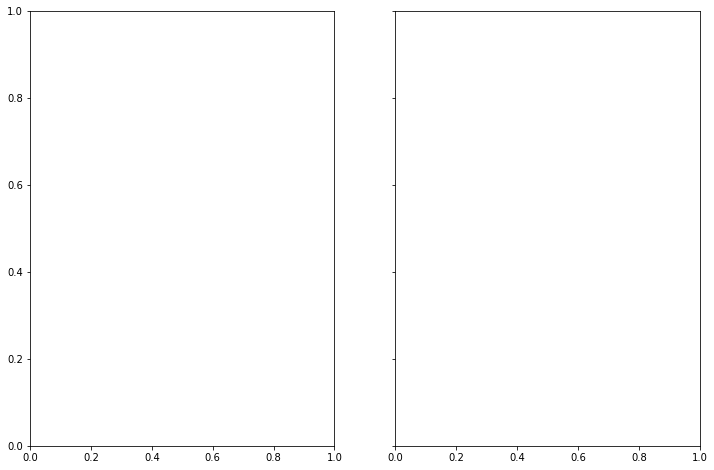

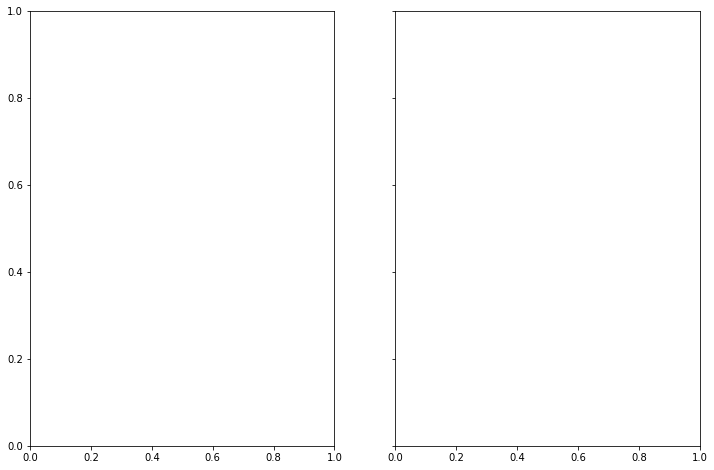

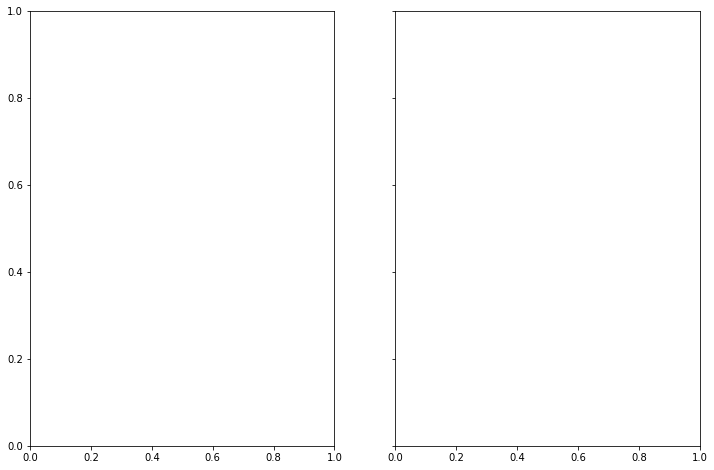

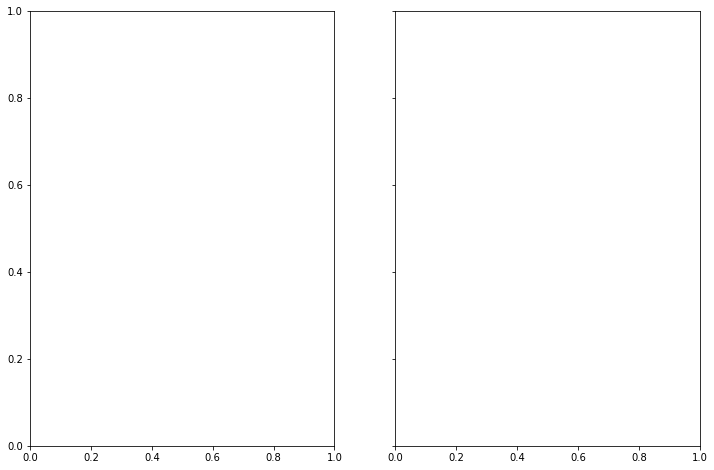

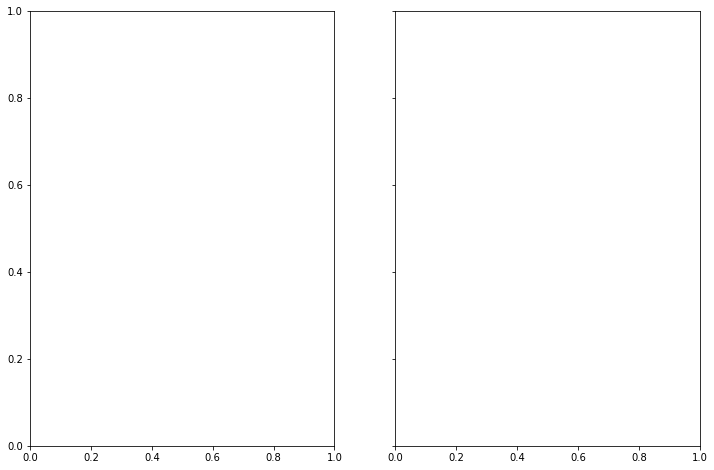

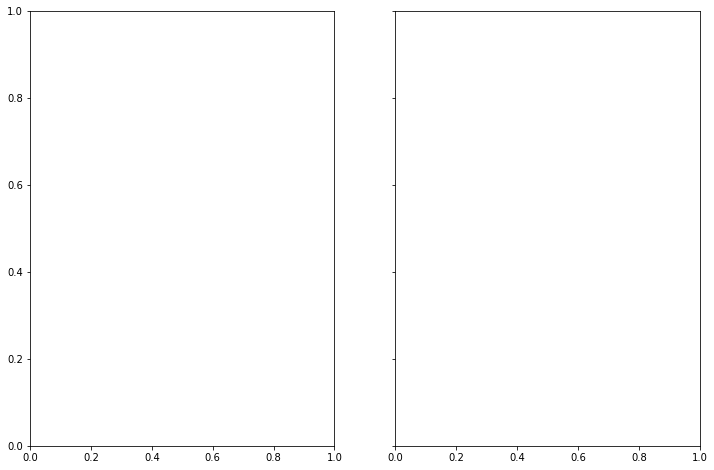

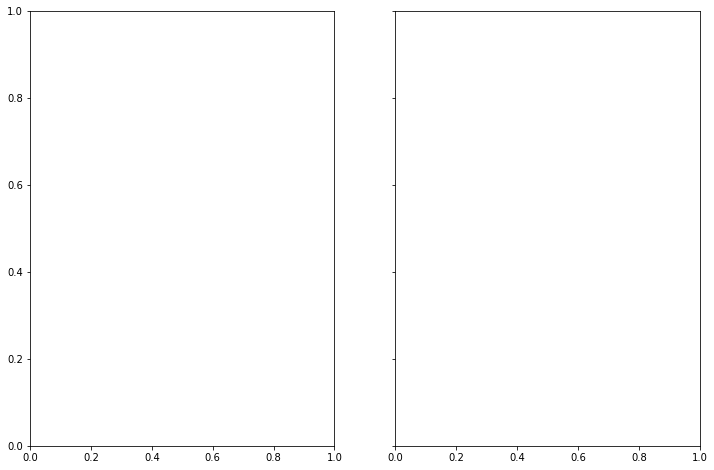

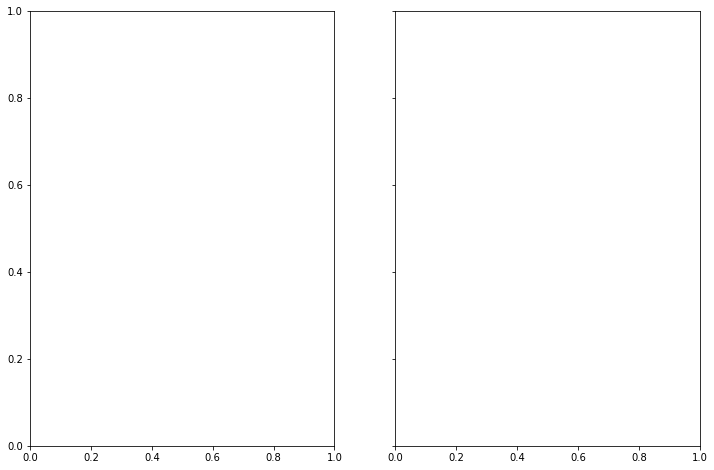

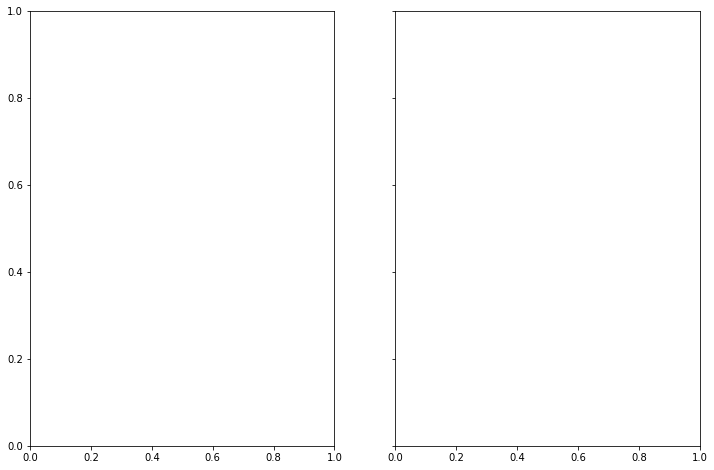

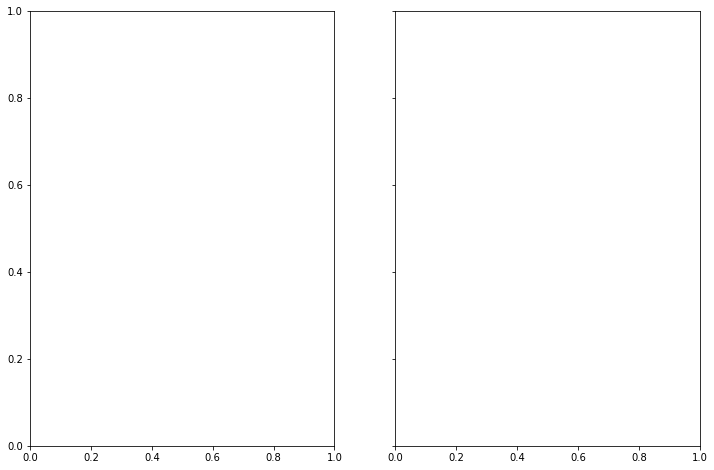

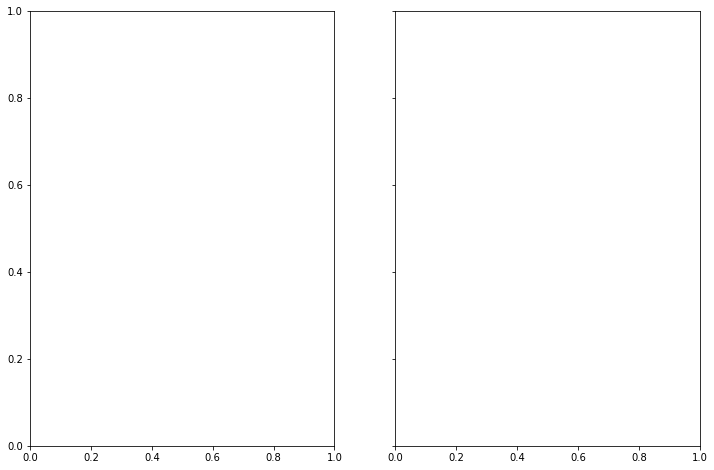

In [86]:
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("output_ts_clean_new_tboard_uint64.pdf")
last_ts = None
for i, ts in enumerate(np.unique(clean_ts_tot)):
    if i==500:
        break
    if (last_ts is not None and last_ts+1 == ts):
        print("SKIPPING {}".format(ts))
        continue
    print("TS ", ts, end=" ")
    plot_comps = plot_event_ts(ts, marocdata)
    if (plot_comps is None):    
        continue
    fig, ax1, ax2 = plot_comps
    pdf.savefig(fig)
    plt.close(fig)
   
    print("DONE")
    last_ts = ts
Run000109218

In [ ]:
from functools import partial
def overthreshold(marocdata, event_id):
    events = marocdata.get_event(event_id)
    count = 0
    for board_id, event in events:
        
        if event is None:
            continue
        board = marocdata.get_board(board_id)
        pedestal = board.avg_data
        noise = board.noise
        mu, std = norm.fit(noise)
        signal = event.signal
        if np.any(signal-pedestal>=200+(mu+5*std)):
            count+=1
    if count>=2:
        return True
    return False